# 다항 선형회귀 코드-행렬사용
Bayesian sampling code 
accept th if r < L(th)/L(th_opt), where 0 < r < 1 and L(th_max) = Exp(-10), L(th) = -0.5*error(th).

Hence
  accept th if log(r) < log(L(th) - log(L(th_opt)

This equivalent to
  accept th if log(r) < -0.5*error(th) - 0.5*error(th_opt) = -0.5*error(th) -5

Above method is too inefficient acceptance rate is less than 0.1%

Here we try to uuse Dynesty(https://dynesty.readthedocs.io/) method for sampling

and use seaborn for corner graph

Fix some of parameters

In [1]:
import sys
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter
#from Bayesian_Dynesty_Restricted_LCDM_ga_20220509 import *
#from Bayesian_Dynesty_Restricted_LCDM_ga_20220510 import *
#from Bayesian_Dynesty_Restricted_LCDM_ga_20220511 import *
#from Bayesian_Dynesty_Restricted_LCDM_ga_20220512 import *
#from Bayesian_Dynesty_Restricted_LCDM_ga_20220515 import *
#from Bayesian_Dynesty_Restricted_LCDM_ga_20220518 import *
from Bayesian_Dynesty_Restricted_LCDM_ga_20230915 import *
%matplotlib inline
# 학습 데이터를 읽는다
try:
  train = np.loadtxt('/content/drive/MyDrive/연구 project/cosmology/H(z)_2203.10825.csv', delimiter=',', dtype='float', skiprows=1)
except Exception as e:
  print("Error = {0}".format(e))
  try:
    train = np.loadtxt('/content/drive/MyDrive/cosmology/H(z)_2203.10825.csv', delimiter=',', dtype='float', skiprows=1)
  except Exception as e:
    print("Error = {}".format(e))
    train = np.loadtxt('./H(z)_2203.10825.csv', delimiter=',', dtype='float', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]
train_sigma=train[:,2]
set_train_data(train_x, train_y, train_sigma)

Error = /content/drive/MyDrive/연구 project/cosmology/H(z)_2203.10825.csv not found.
Error = /content/drive/MyDrive/cosmology/H(z)_2203.10825.csv not found.


Merge DYNESTY results for None, Ridge, Lasso cases
------------------------------------------------------------------------------

In [2]:
#merge results
from dynesty import utils as dyfunc
rlist = []
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_run001.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_run002.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_run003.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_run004.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_run005.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
results = dyfunc.merge_runs(rlist)
np.save('ijml2202_7D_ML_None_delz5.0_iter20000_USG_multi5.npy', results)

Merge: 3/5     E:\Anaconda3\lib\site-packages\dynesty\utils.py:1473: RuntimeWarning: overflow encountered in long_scalars
  eff = 100. * ntot / sum(combined_info['nc'])
Merge: 5/5     

In [2]:
#merge results
from dynesty import utils as dyfunc
rlist = []
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_run001.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_run002.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_run003.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_run004.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_run005.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
results = dyfunc.merge_runs(rlist)
np.save('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_multi5.npy', results)

Merge: 3/5     E:\Anaconda3\lib\site-packages\dynesty\utils.py:1473: RuntimeWarning: overflow encountered in long_scalars
  eff = 100. * ntot / sum(combined_info['nc'])
Merge: 5/5     

In [4]:
#merge results
from dynesty import utils as dyfunc
rlist = []
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_run001.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_run002.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_run003.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_run004.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_run005.npy', allow_pickle='TRUE').item()
rlist.append(th_samples_Interacting)
results = dyfunc.merge_runs(rlist)
np.save('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_multi5.npy', results)

Merge: 5/5     

use pandas test seaborn violin plot
----------------

tips = Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


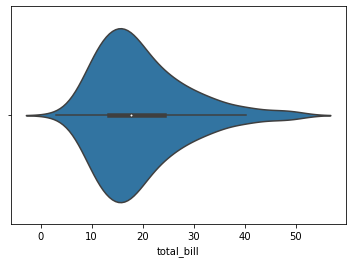

In [7]:
tips = sns.load_dataset("tips")
print("tips = {0}".format(tips.columns))
ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [33]:
th_samples_LCDM = np.load('ijml2202_LCDM_multi5_k0_2D_home.npy', allow_pickle='TRUE').item()
size = th_samples_LCDM['samples'].shape[0]
methods_LCDM = np.full(size, "LCDM")
df = pd.DataFrame(th_samples_LCDM['samples'], columns=labels)
df['methods'] = methods_LCDM
print(df)

       $\Omega_\Lambda^0$       $H_0$ methods
0                0.007623  198.985726    LCDM
1                0.038435  198.396138    LCDM
2                0.059051  199.872444    LCDM
3                0.006684  194.940908    LCDM
4                0.015858  195.198457    LCDM
...                   ...         ...     ...
72629            0.748803   71.692914    LCDM
72630            0.749145   71.721331    LCDM
72631            0.749143   71.721118    LCDM
72632            0.749116   71.706015    LCDM
72633            0.749314   71.716487    LCDM

[72634 rows x 3 columns]


C:\Users\hwlee\OneDrive - 인제대학교\Projects\Physics\MachineLearning\y2022\ijml2202-GA approach for cosmological data fit(title changed)\codes\python\Bayesian_Dynesty_Restricted_LCDM_ga_20220518.py:1272: RuntimeWarning: invalid value encountered in sqrt
  v = H0*np.sqrt((1-OL0)*(1+z)**3 + OL0)


th_samples_new = (77198, 2)
th_samples_ignored = (13349, 2)
maxlogL = -9.883682872936413, maxIndex = [77197]
MaxL = [0.7487218904896586, 71.61324607216675]
th_samples_new = (61020, 2)
th_samples_ignored = (6456, 2)
maxlogL = -10.371069148028013, maxIndex = [61019]
MaxL = [0.7517682483479713, 71.891202003016]
Weights = (1000, 7)
Min losses = (1000,)
Min epochs = (1000,)
th_samples_new = (1000, 2)
th_samples_ignored = (0,)
maxlogL = -9.718164473631012, maxIndex = [666]
MaxL = [0.7423120817415084, 71.17470889548729]
Weights = (1000, 7)
Min losses = (1000,)
Min epochs = (1000,)
th_samples_new = (1000, 2)
th_samples_ignored = (0,)
maxlogL = -14.178261441271605, maxIndex = [706]
MaxL = [0.742767438577273, 71.03626350990456]


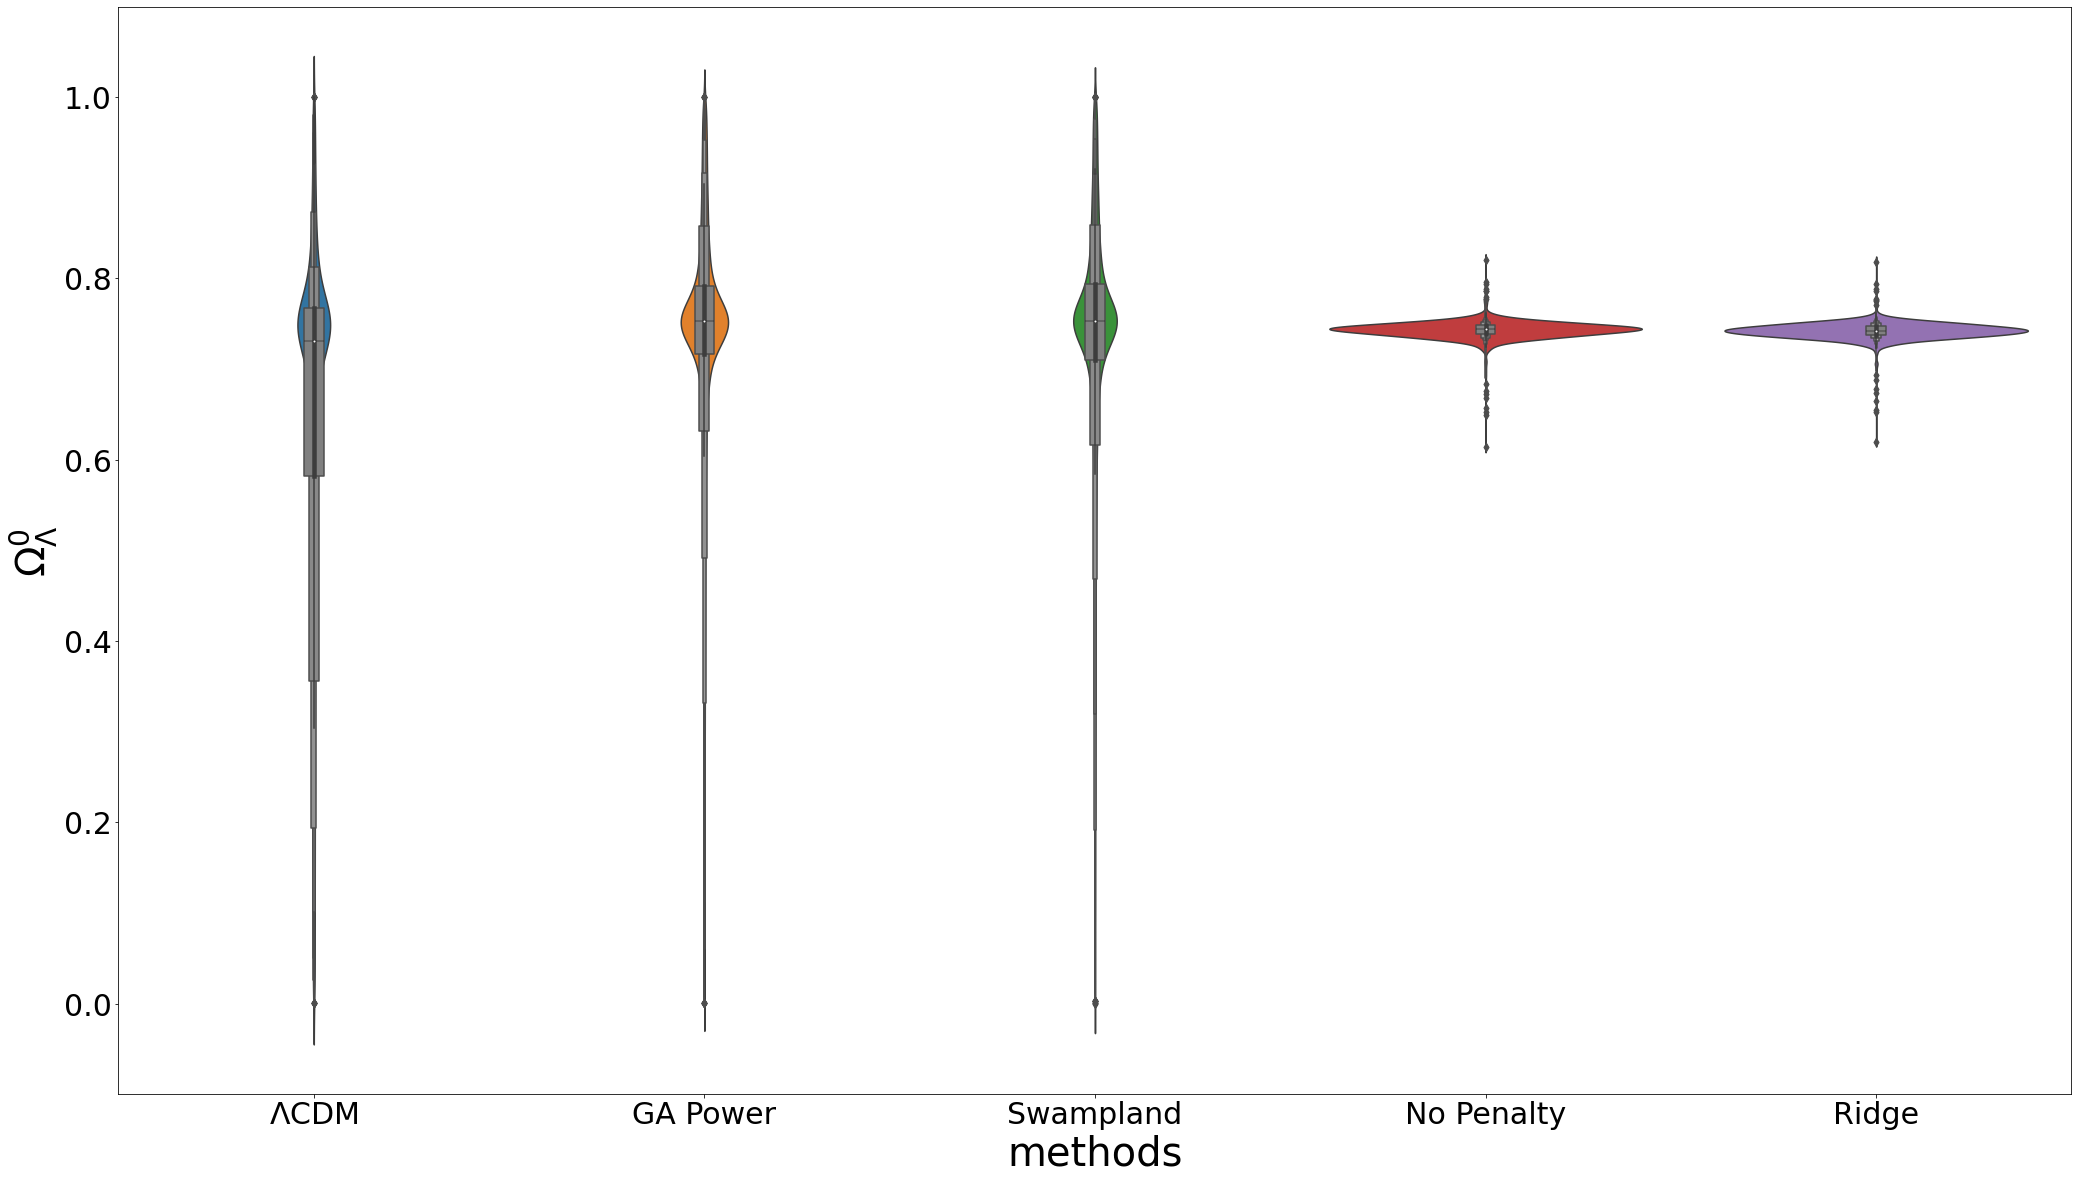

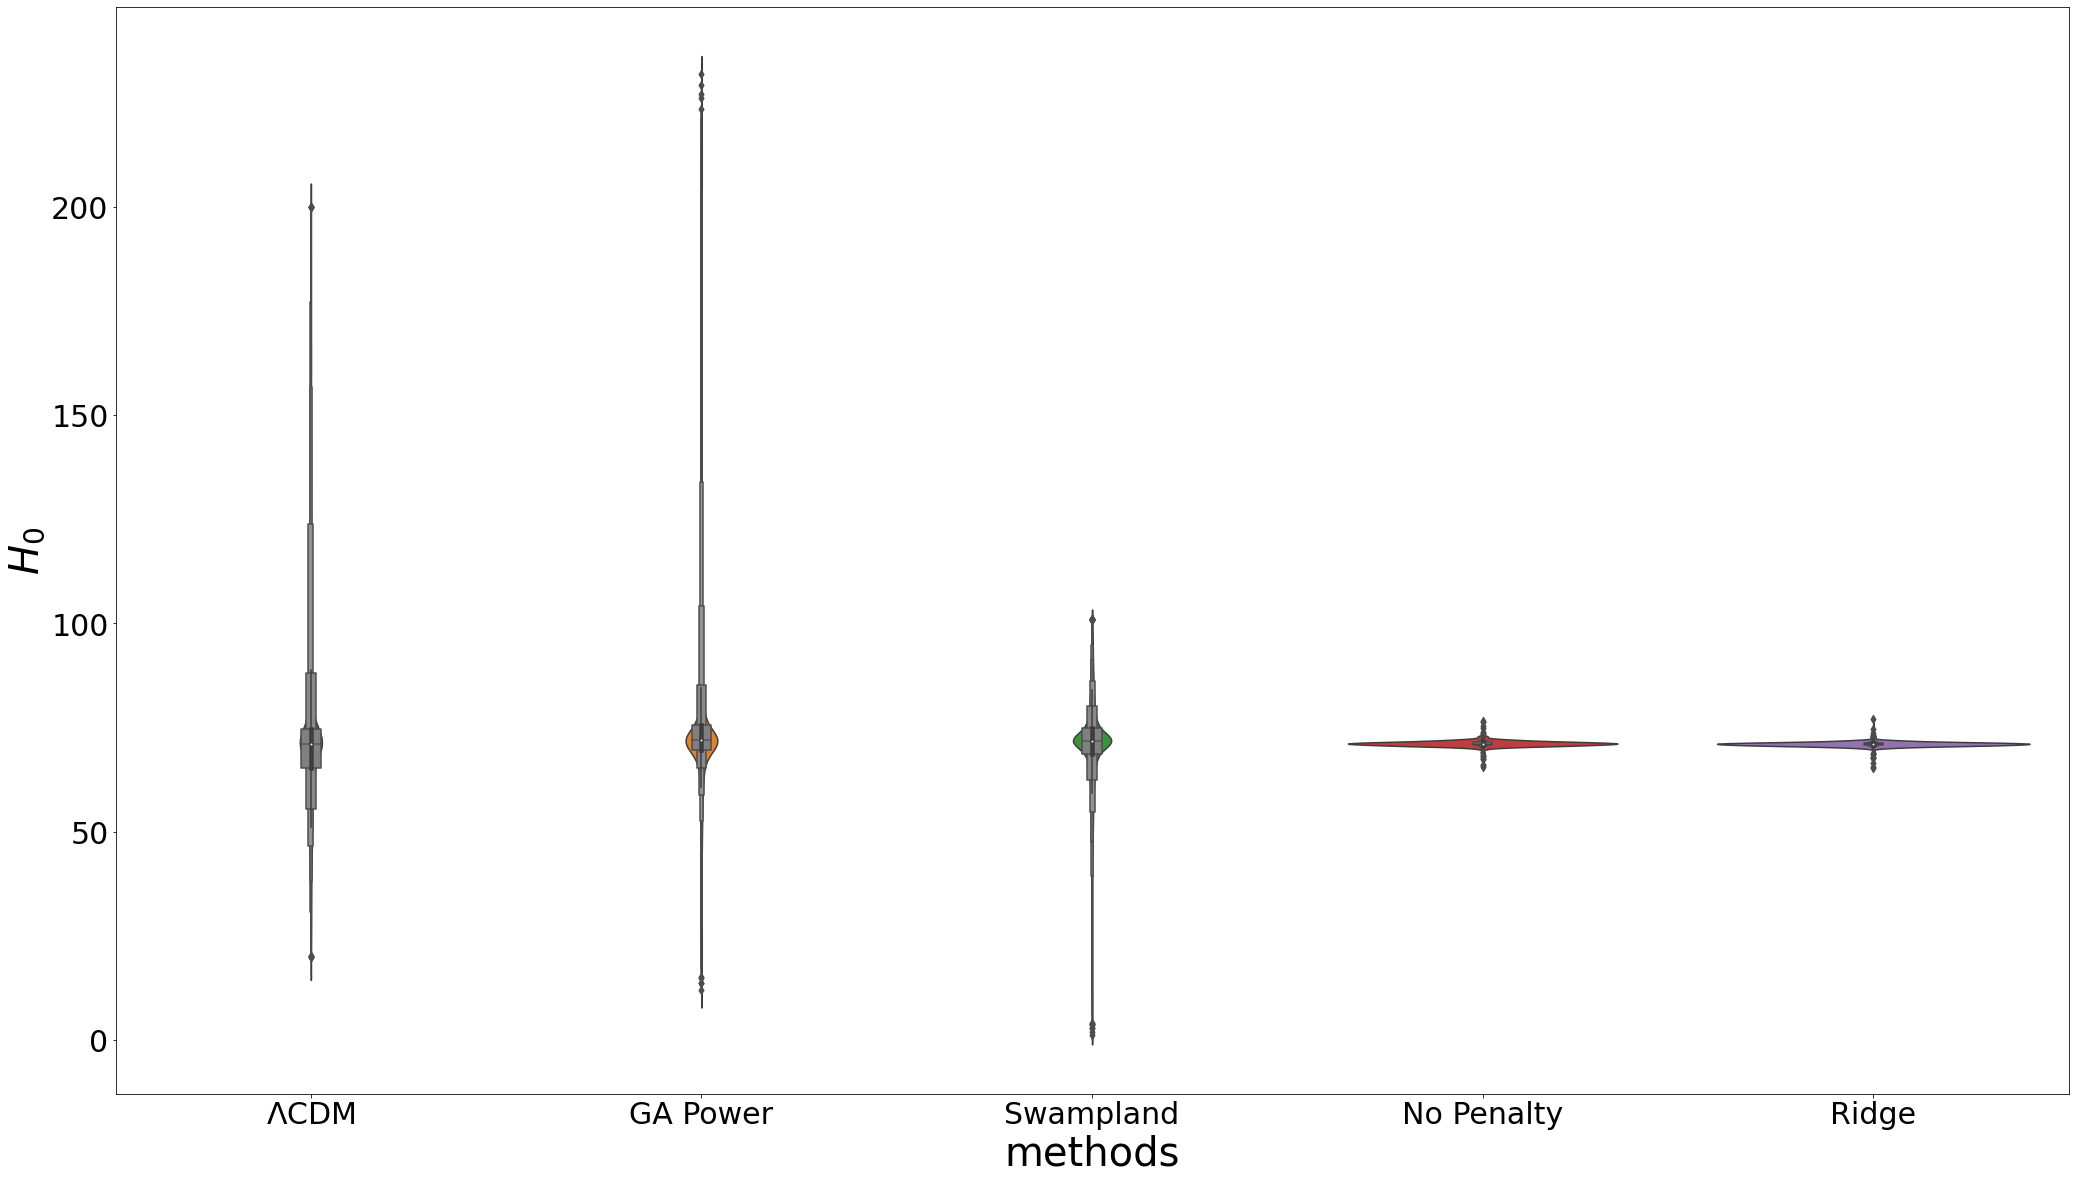

In [4]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 73.71528281,  40.31141971, -52.44018752,  71.35168125,   3.38498375, -19.12574623,   4.10045202]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_USG.npy', allow_pickle='TRUE').item()
#H0_Omega_L0, ignored = find_H0_Omega_L0(H_GA_power, th_samples_Interacting['samples'], train_x)
#H0_Omega_L0 = np.array(H0_Omega_L0)
#print("H0_Omega_L0 = {0}, ignored = {1}".format(H0_Omega_L0.shape, np.array(ignored).shape))
#th_samples_new = {}
#th_samples_new['samples'] = H0_Omega_L0
#th_samples_new['logwt'] = th_samples_Interacting['logwt']
#th_samples_new['logz'] = th_samples_Interacting['logz']
#th_samples_new['logl'] = th_samples_Interacting['logl']

x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_GA_power, th_samples_Interacting, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_GA_power, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

labels = [r"$\Omega_\Lambda^0$", r"$H_0$"]
df_GA = pd.DataFrame(th_samples_new['samples'], columns=labels)
#df_GA = df_GA[df_GA[r"$\Omega_\Lambda^0$"]>=0]
size = df_GA.shape[0]
methods = np.full(size, "GA Power")
df_GA['methods'] = methods
#print("df = {0}".format(df_GA))

th_samples_LCDM = np.load('ijml2202_LCDM_multi5_k0_2D_home.npy', allow_pickle='TRUE').item()
size = th_samples_LCDM['samples'].shape[0]
methods_LCDM = np.full(size, r"${\rm \Lambda CDM}$")
df_LCDM = pd.DataFrame(th_samples_LCDM['samples'], columns=labels)
df_LCDM['methods'] = methods_LCDM
#print("df_LCDM = {0}".format(df_LCDM))

x0 = [70.0, 0.7]
th_samples_Swampland = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_GA_swampland, th_samples_Swampland, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_GA_swampland, th_samples_Swampland, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

df_Swampland = pd.DataFrame(th_samples_new['samples'], columns=labels)
#df_GA = df_GA[df_GA[r"$\Omega_\Lambda^0$"]>=0]
size = df_Swampland.shape[0]
methods = np.full(size, "Swampland")
df_Swampland['methods'] = methods
#print("df = {0}".format(df_GA))


##########################################################
# calculation for ML no penalty
##########################################################
weight_f = open('Tensorflow_Restricted_GA_ML_20220518_609_weight_none.dat', 'rb')
min_weights_r = np.load(weight_f)
weight_f.close()
print("Weights = {0}".format(min_weights_r.shape))
loss_f = open('Tensorflow_Restricted_GA_ML_20220518_609_loss_none.dat', 'rb')
min_losses_r = np.load(loss_f)
loss_f.close()
print("Min losses = {0}".format(min_losses_r.shape))
epoch_f = open('Tensorflow_Restricted_GA_ML_20220518_609_epoch_none.dat', 'rb')
min_epochs_r = np.load(epoch_f)
epoch_f.close()
print("Min epochs = {0}".format(min_epochs_r.shape))
th_samples = {}
th_samples['samples'] = np.array(min_weights_r)
th_samples['logl'] = np.array(-min_losses_r)
th_samples['logz'] = np.full(len(min_losses_r), 1.0)
th_samples['logwt'] = np.full(len(min_losses_r), 1.0)

x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_ML_none, th_samples, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_GA_power, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

labels = [r"$\Omega_\Lambda^0$", r"$H_0$"]
df_ML_none = pd.DataFrame(th_samples_new['samples'], columns=labels)
#df_GA = df_GA[df_GA[r"$\Omega_\Lambda^0$"]>=0]
size = df_ML_none.shape[0]
methods = np.full(size, "No Penalty")
df_ML_none['methods'] = methods
#print("df = {0}".format(df_GA))

#####################################################################

##########################################################
# calculation for ML Ridge
##########################################################
weight_f = open('Tensorflow_Restricted_GA_ML_20220518_home_weight_ridge.dat', 'rb')
min_weights_r = np.load(weight_f)
weight_f.close()
print("Weights = {0}".format(min_weights_r.shape))
loss_f = open('Tensorflow_Restricted_GA_ML_20220518_home_loss_ridge.dat', 'rb')
min_losses_r = np.load(loss_f)
loss_f.close()
print("Min losses = {0}".format(min_losses_r.shape))
epoch_f = open('Tensorflow_Restricted_GA_ML_20220518_home_epoch_ridge.dat', 'rb')
min_epochs_r = np.load(epoch_f)
epoch_f.close()
print("Min epochs = {0}".format(min_epochs_r.shape))
th_samples = {}
th_samples['samples'] = np.array(min_weights_r)
th_samples['logl'] = np.array(-min_losses_r)
th_samples['logz'] = np.full(len(min_losses_r), 1.0)
th_samples['logwt'] = np.full(len(min_losses_r), 1.0)

x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_ML_none, th_samples, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_GA_power, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

labels = [r"$\Omega_\Lambda^0$", r"$H_0$"]
df_ML_ridge = pd.DataFrame(th_samples_new['samples'], columns=labels)
#df_GA = df_GA[df_GA[r"$\Omega_\Lambda^0$"]>=0]
size = df_ML_ridge.shape[0]
methods = np.full(size, "Ridge")
df_ML_ridge['methods'] = methods
#print("df = {0}".format(df_GA))

#####################################################################

frames = [df_LCDM, df_GA, df_Swampland, df_ML_none, df_ML_ridge]
df = pd.concat(frames)
#print("df = {0}".format(df))

fig, ax = plt.subplots(1, 1, figsize=(35, 20)) #violinplot(y = df[df["Column"]<x]["Column"]) 
#sns.violinplot(x="methods", y=df_GA[df_GA[r"$\Omega_\Lambda^0$"]>=0][r"$\Omega_\Lambda^0$"], data=df_GA, ax=ax, gridsize=500)
sns.violinplot(x="methods", y=r"$\Omega_\Lambda^0$", data=df, ax=ax, gridsize=500)
sns.boxenplot(x=df["methods"], y=df[r"$\Omega_\Lambda^0$"], color="grey", width=0.05)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlabel(ax.get_xlabel(),fontsize=40, loc='center')
ax.set_ylabel(ax.get_ylabel(),fontsize=40, loc='center')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(35, 20)) #violinplot(y = df[df["Column"]<x]["Column"]) 
sns.violinplot(x="methods", y=r"$H_0$", data=df, ax=ax, gridsize=500)
sns.boxenplot(x=df["methods"], y=df[r"$H_0$"], color="grey", width=0.05)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlabel(ax.get_xlabel(),fontsize=40, loc='center')
ax.set_ylabel(ax.get_ylabel(),fontsize=40, loc='center')
plt.show()

#ax.set_xlim(0,1)


varying 4-parameters : a, b, c, d
---------------------------------------------

In [2]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88]
variants = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
beta = 0.001
set_global_params(th_fixed, vary_index, variants, beta)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_USG.npy', allow_pickle='TRUE').item()
df = pd.DataFrame(th_samples_Interacting['samples'], columns=labels)
clevels = df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
#print("clevels = {0}".format(clevels))

$a$           $b$           $c$           $d$
count  90547.000000  90547.000000  90547.000000  90547.000000
mean      74.454384     27.781548     28.974106      3.487662
std       25.469417     13.503196     20.613229      2.017706
min       10.020217      0.000056      0.004473      0.000028
2.3%      27.913142      1.860435      4.577174      0.168317
15.9%     62.459769     11.603963     12.153501      1.159208
50%       70.268597     29.394417     22.604462      3.553856
84.1%     83.076078     42.540096     47.326674      5.428717
97.7%    162.343351     48.724777     88.785605      7.660205
max      199.967969     49.999324     99.993761      9.998861

In [3]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_USG.npy', allow_pickle='TRUE').item()
avgL_Interacting = findAvgL_restricted_GA(th_samples_Interacting)
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Power")
maxP_Interacting, maxPIndex_Interacting, th_bestP_Interacting = findMaxP_restricted_GA(th_samples_Interacting, "GA_Power", 100)
avgP_Interacting, avgPIndex_Interacting, th_bestAvgP_Interacting = findAvgP_restricted_GA(th_samples_Interacting, "GA_Power", 100)

Samples shape = (90547, 4)
th_maxL0 = [70.13028166 28.11673378 25.29573811  4.60581035], maxLIndex = [90546], maxL = -9.883682872936413
Maximum Likelihood Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.01302817e+01
 2.81167338e+01 2.52957381e+01 4.60581035e+00 7.90000000e+01
 9.23000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00], maxl = -9.883682872936413
Error value for maxL parameters = 9.883682872936413
Samples shape = (90547, 4)
Maximum Posterior Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 6.79542818e+01
 3.57495327e+01 1.35030269e+01 4.34952043e+00 7.90000000e+01
 9.23000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00], maxl = -45.01022243448911
Error value for maxP parameters = 45.01022243448911
Samp

vary_index = [7, 8, 9, 10]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Samples shape = (90547, 4)
th_maxL0 = [70.13028166 28.11673378 25.29573811  4.60581035], maxLIndex = [90546], maxL = -9.883682872936413
Maximum Likelihood Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.01302817e+01
 2.81167338e+01 2.52957381e+01 4.60581035e+00 7.90000000e+01
 9.23000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00], maxl = -9.883682872936413
Error value for maxL parameters = 9.883682872936413


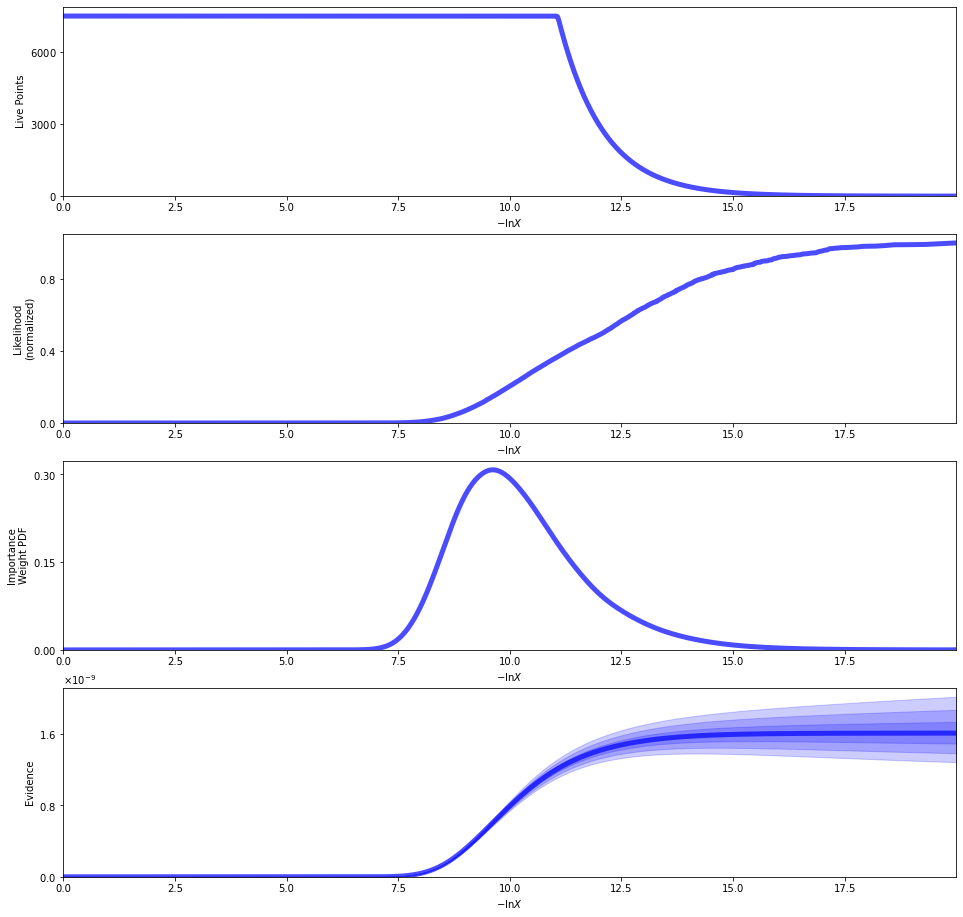

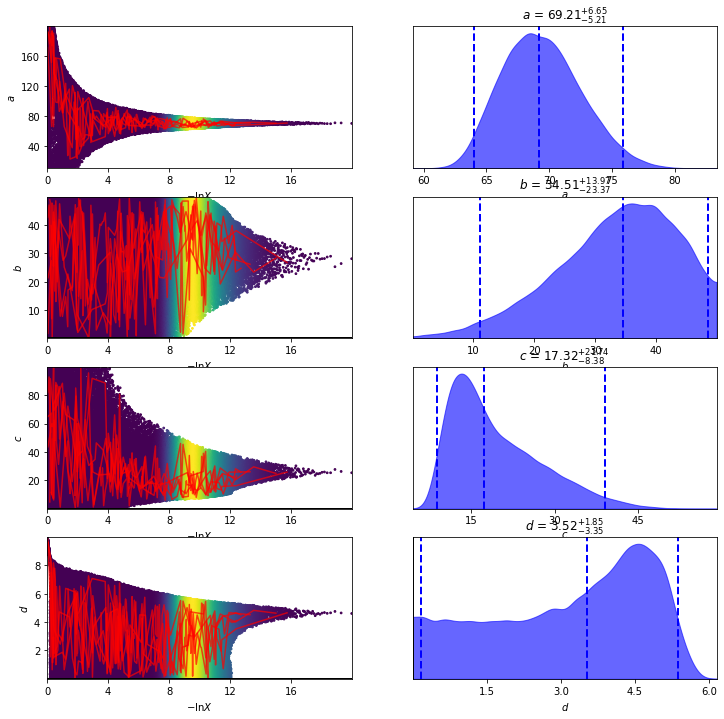

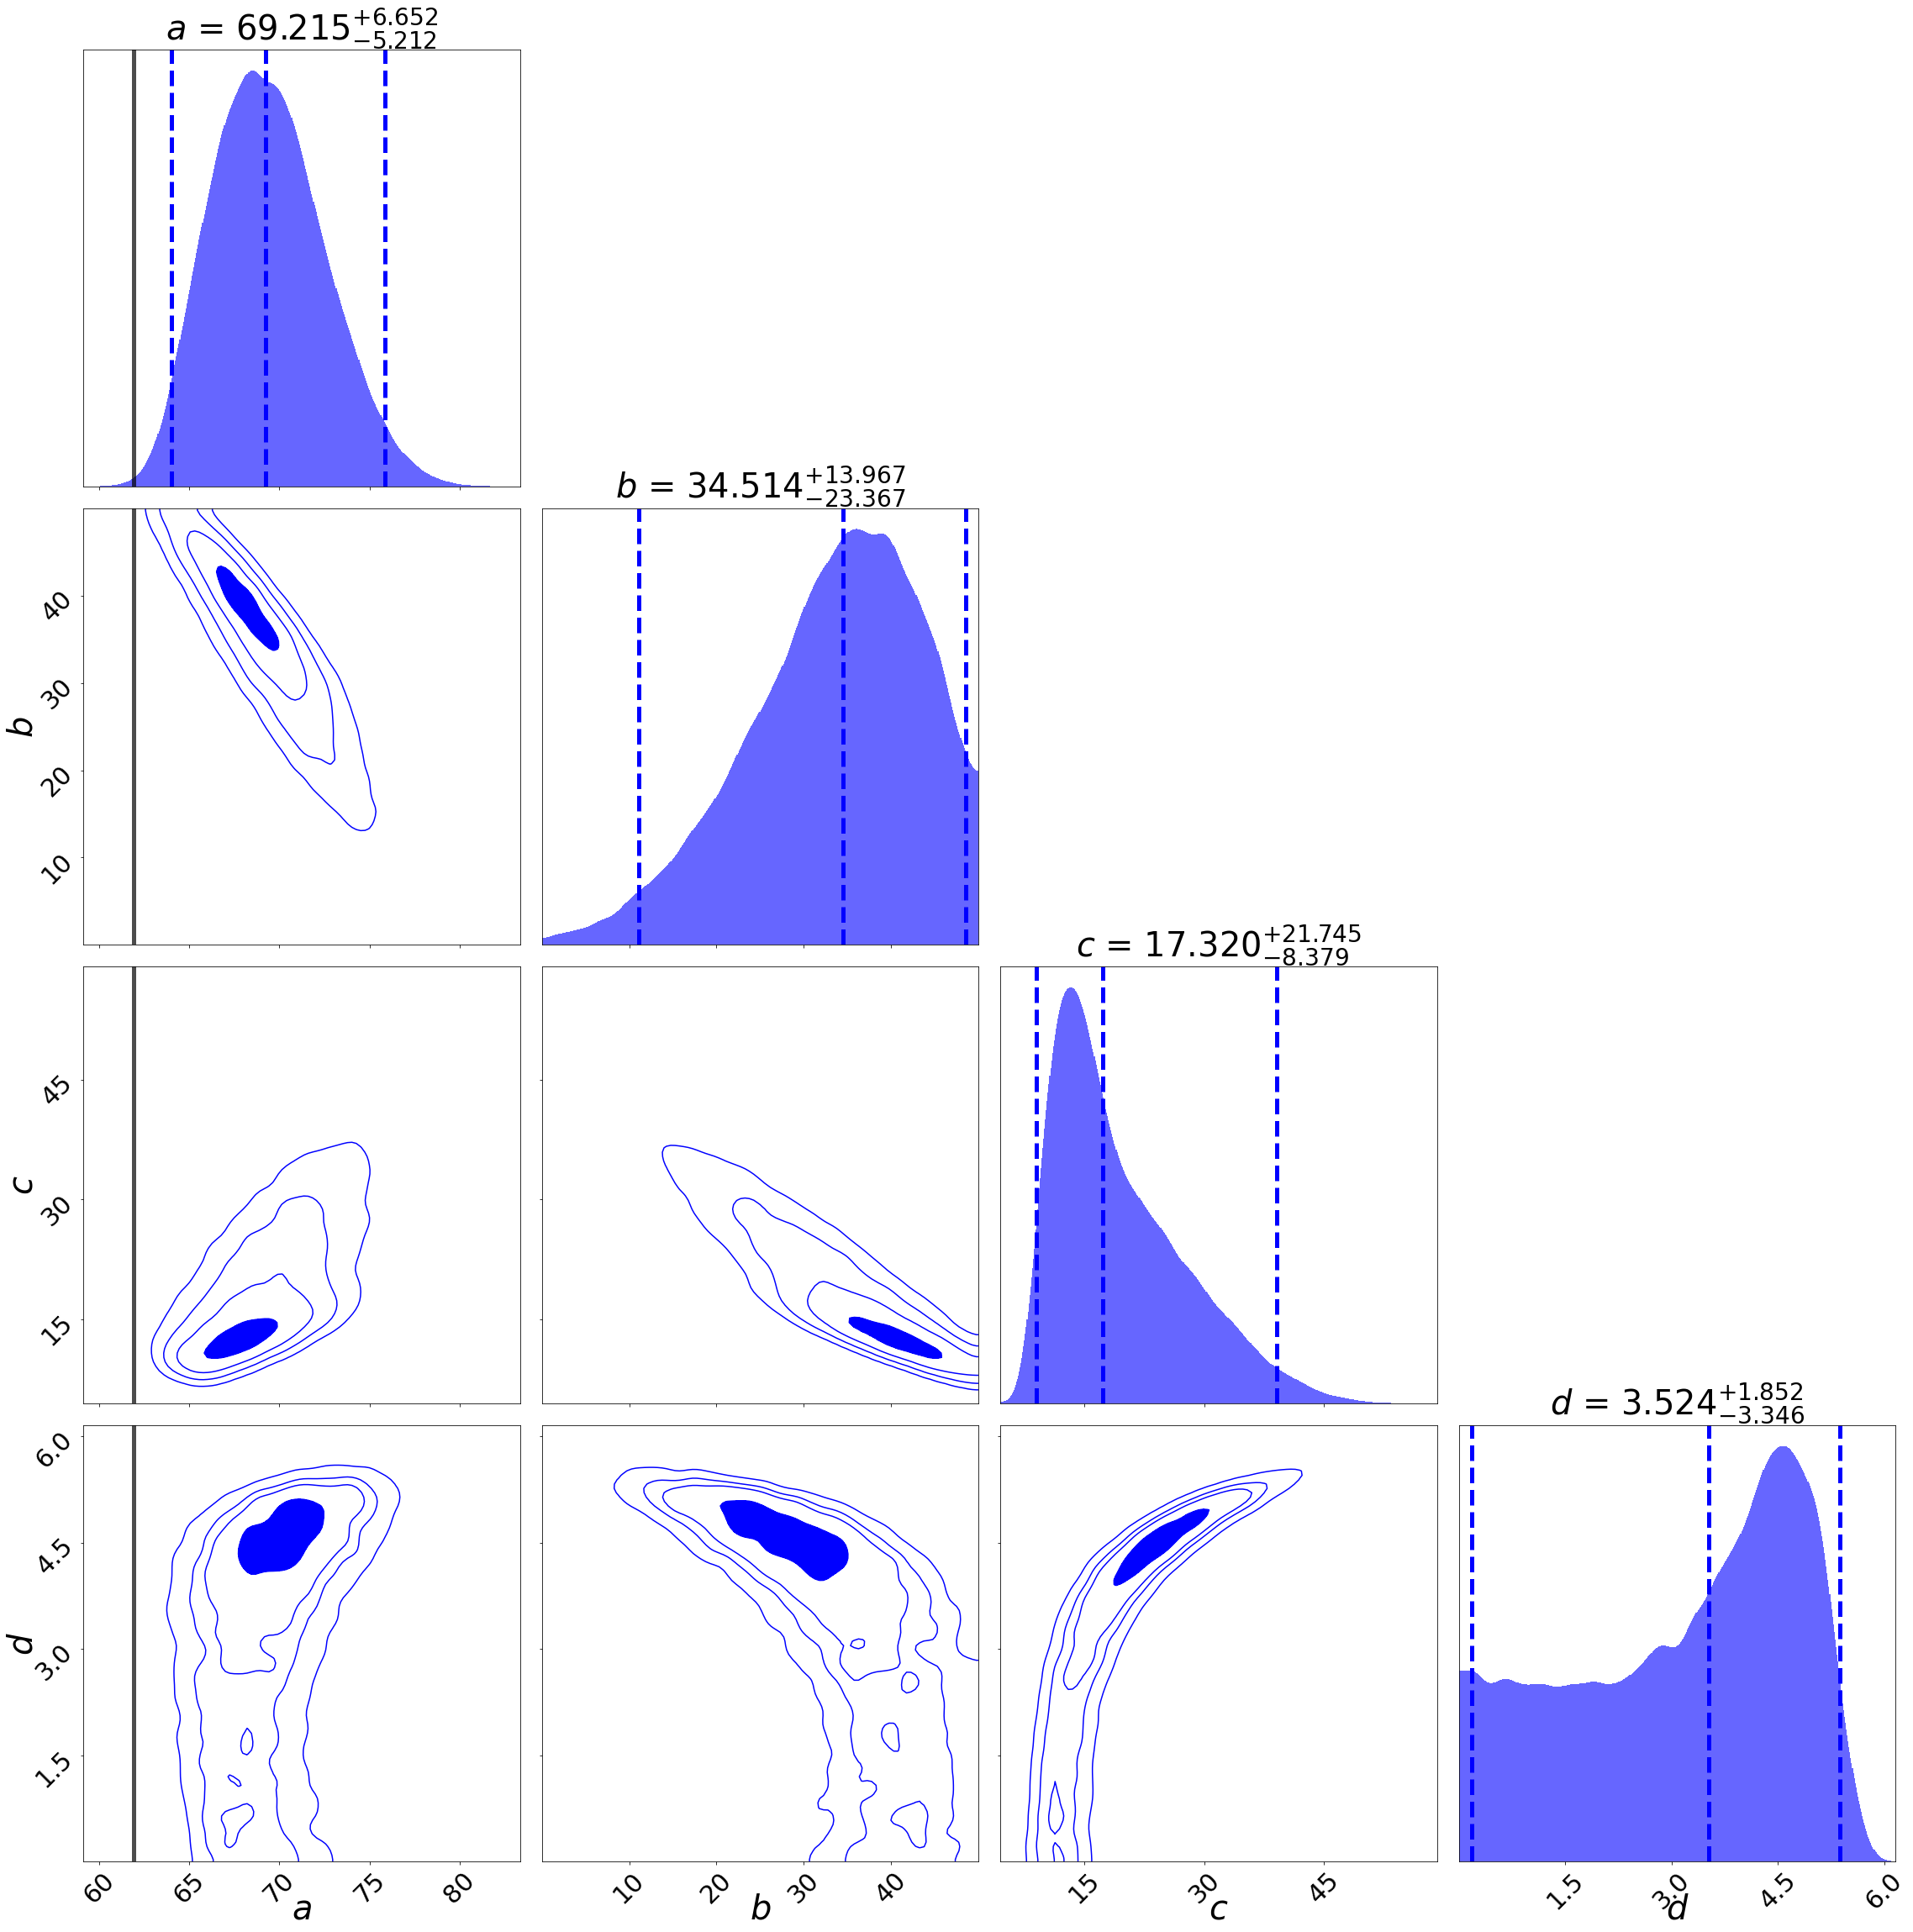

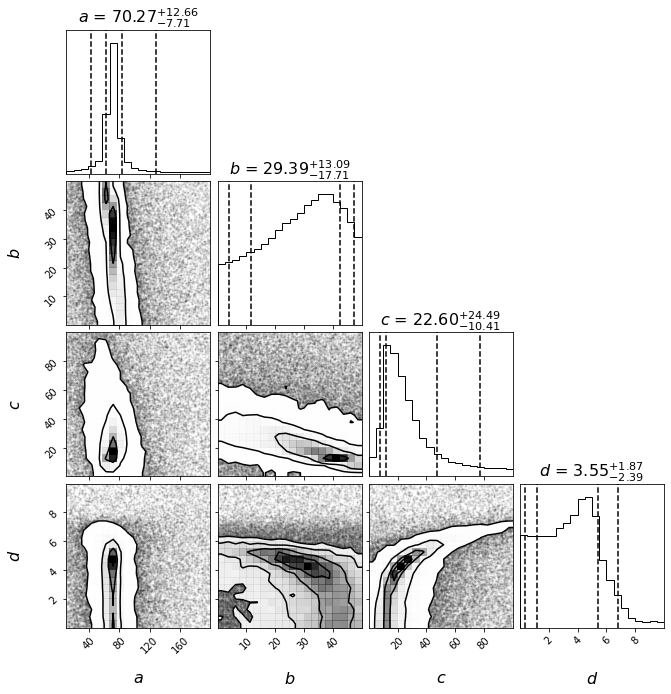

In [5]:
# Post process for GA Power model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_ML_None_multi5_6D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_USG.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True, labels = labels,
                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_Interacting, color='blue', truths=[61.90718678,  60.82930686,   4.13452832,  11.0615689,  -58.71712658,  47.11027426, -10.27919816],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    fig.savefig("best_ga_power.eps", format='eps')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_Interacting['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Power")

Converting from a,b,c,d to Omega_L and H0
------------------------------------------------------------

In [6]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88]
variants = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_USG.npy', allow_pickle='TRUE').item()
x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_GA_power, th_samples_Interacting, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_GA_power, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))


C:\Users\hwlee\physics_local\MachineLearning\y2022\ijml2202-GA approach for cosmological data fit(title changed)\codes\python\Bayesian_Dynesty_Restricted_LCDM_ga_20220518.py:1272: RuntimeWarning: invalid value encountered in sqrt
  v = H0*np.sqrt((1-OL0)*(1+z)**3 + OL0)


th_samples_new = (77198, 2)
th_samples_ignored = (13349, 2)
maxlogL = -9.883682872936413, maxIndex = [77197]
MaxL = [0.7487218904896586, 71.61324607216675]


vary_index = [1, 2]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

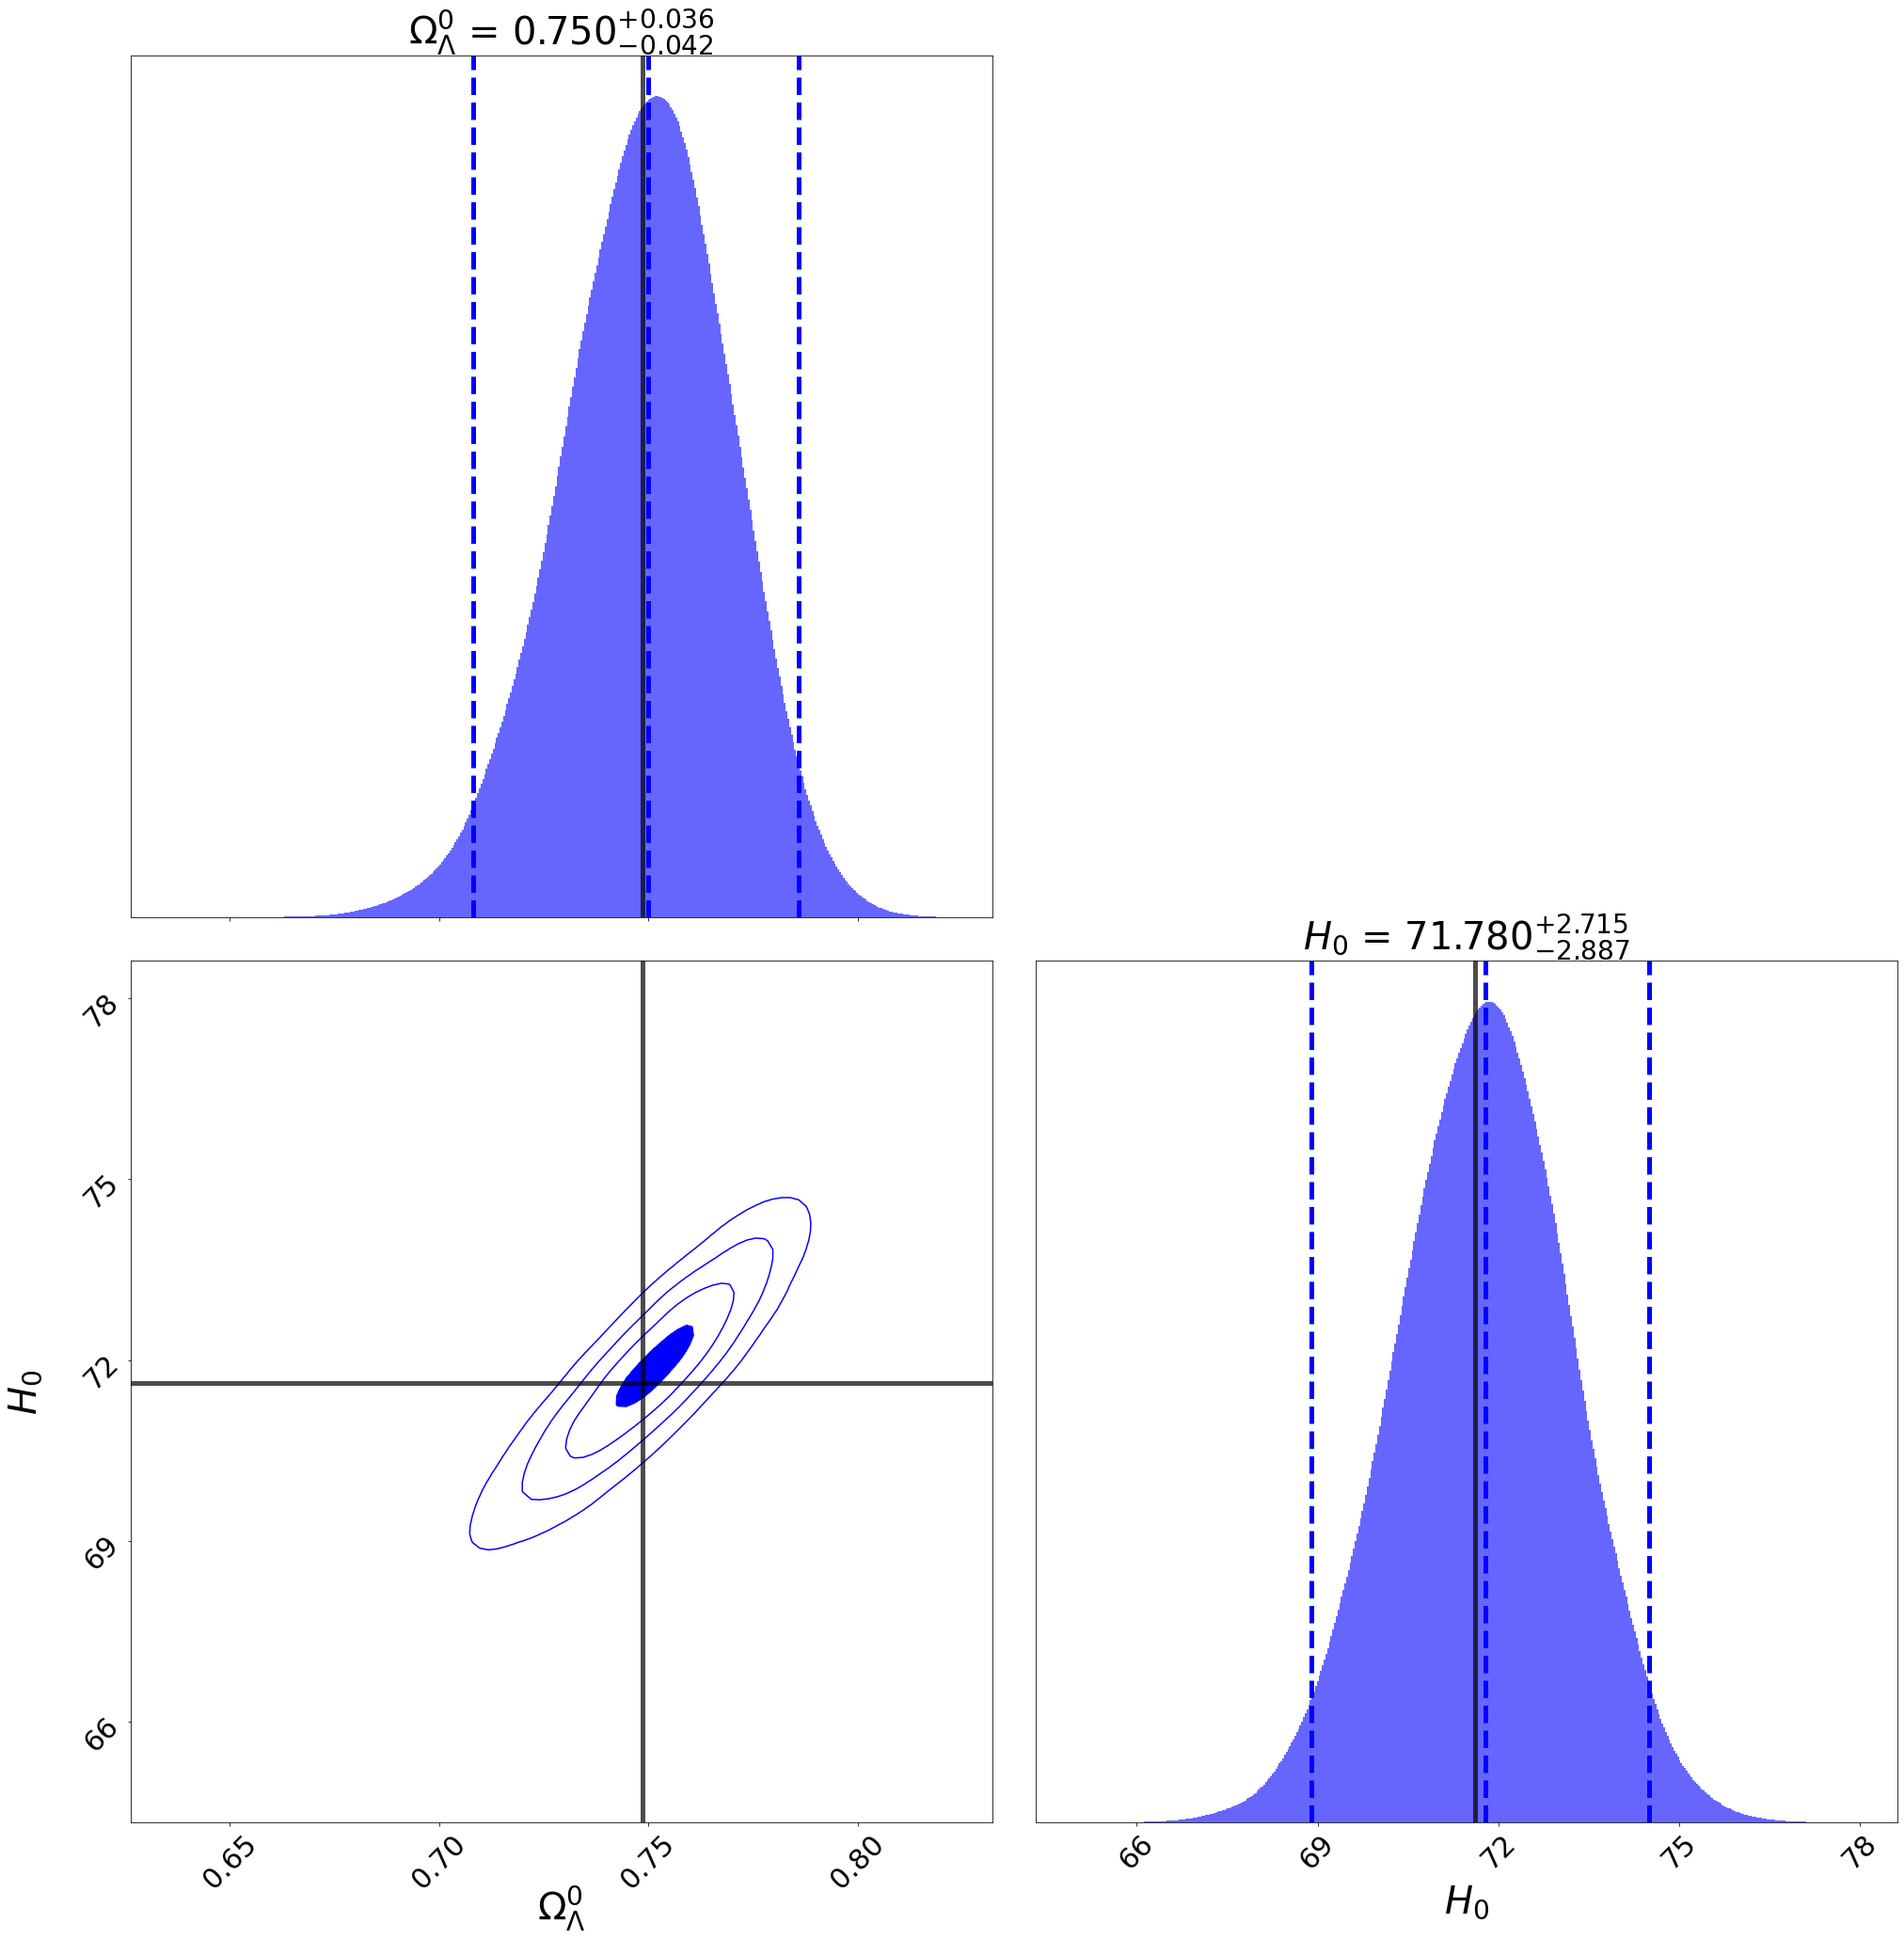

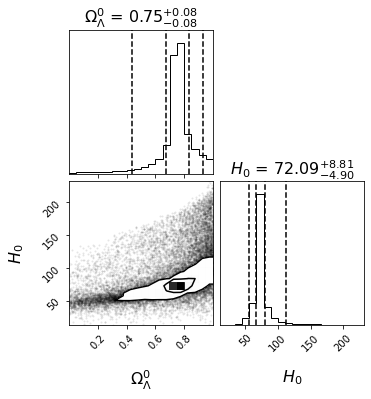

In [7]:
# Post process for Interacting model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
ndim = varying_param_numbers(variants)
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
#fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                             trace_cmap='viridis', connect=True, labels = labels,
#                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_new, color='blue', truths=[0.7487218904896586, 71.61324607216675],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    fig.savefig("best_ga_power_H0_OL.eps", format='eps')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_new['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
#maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Power")


vary_index = [1, 2]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

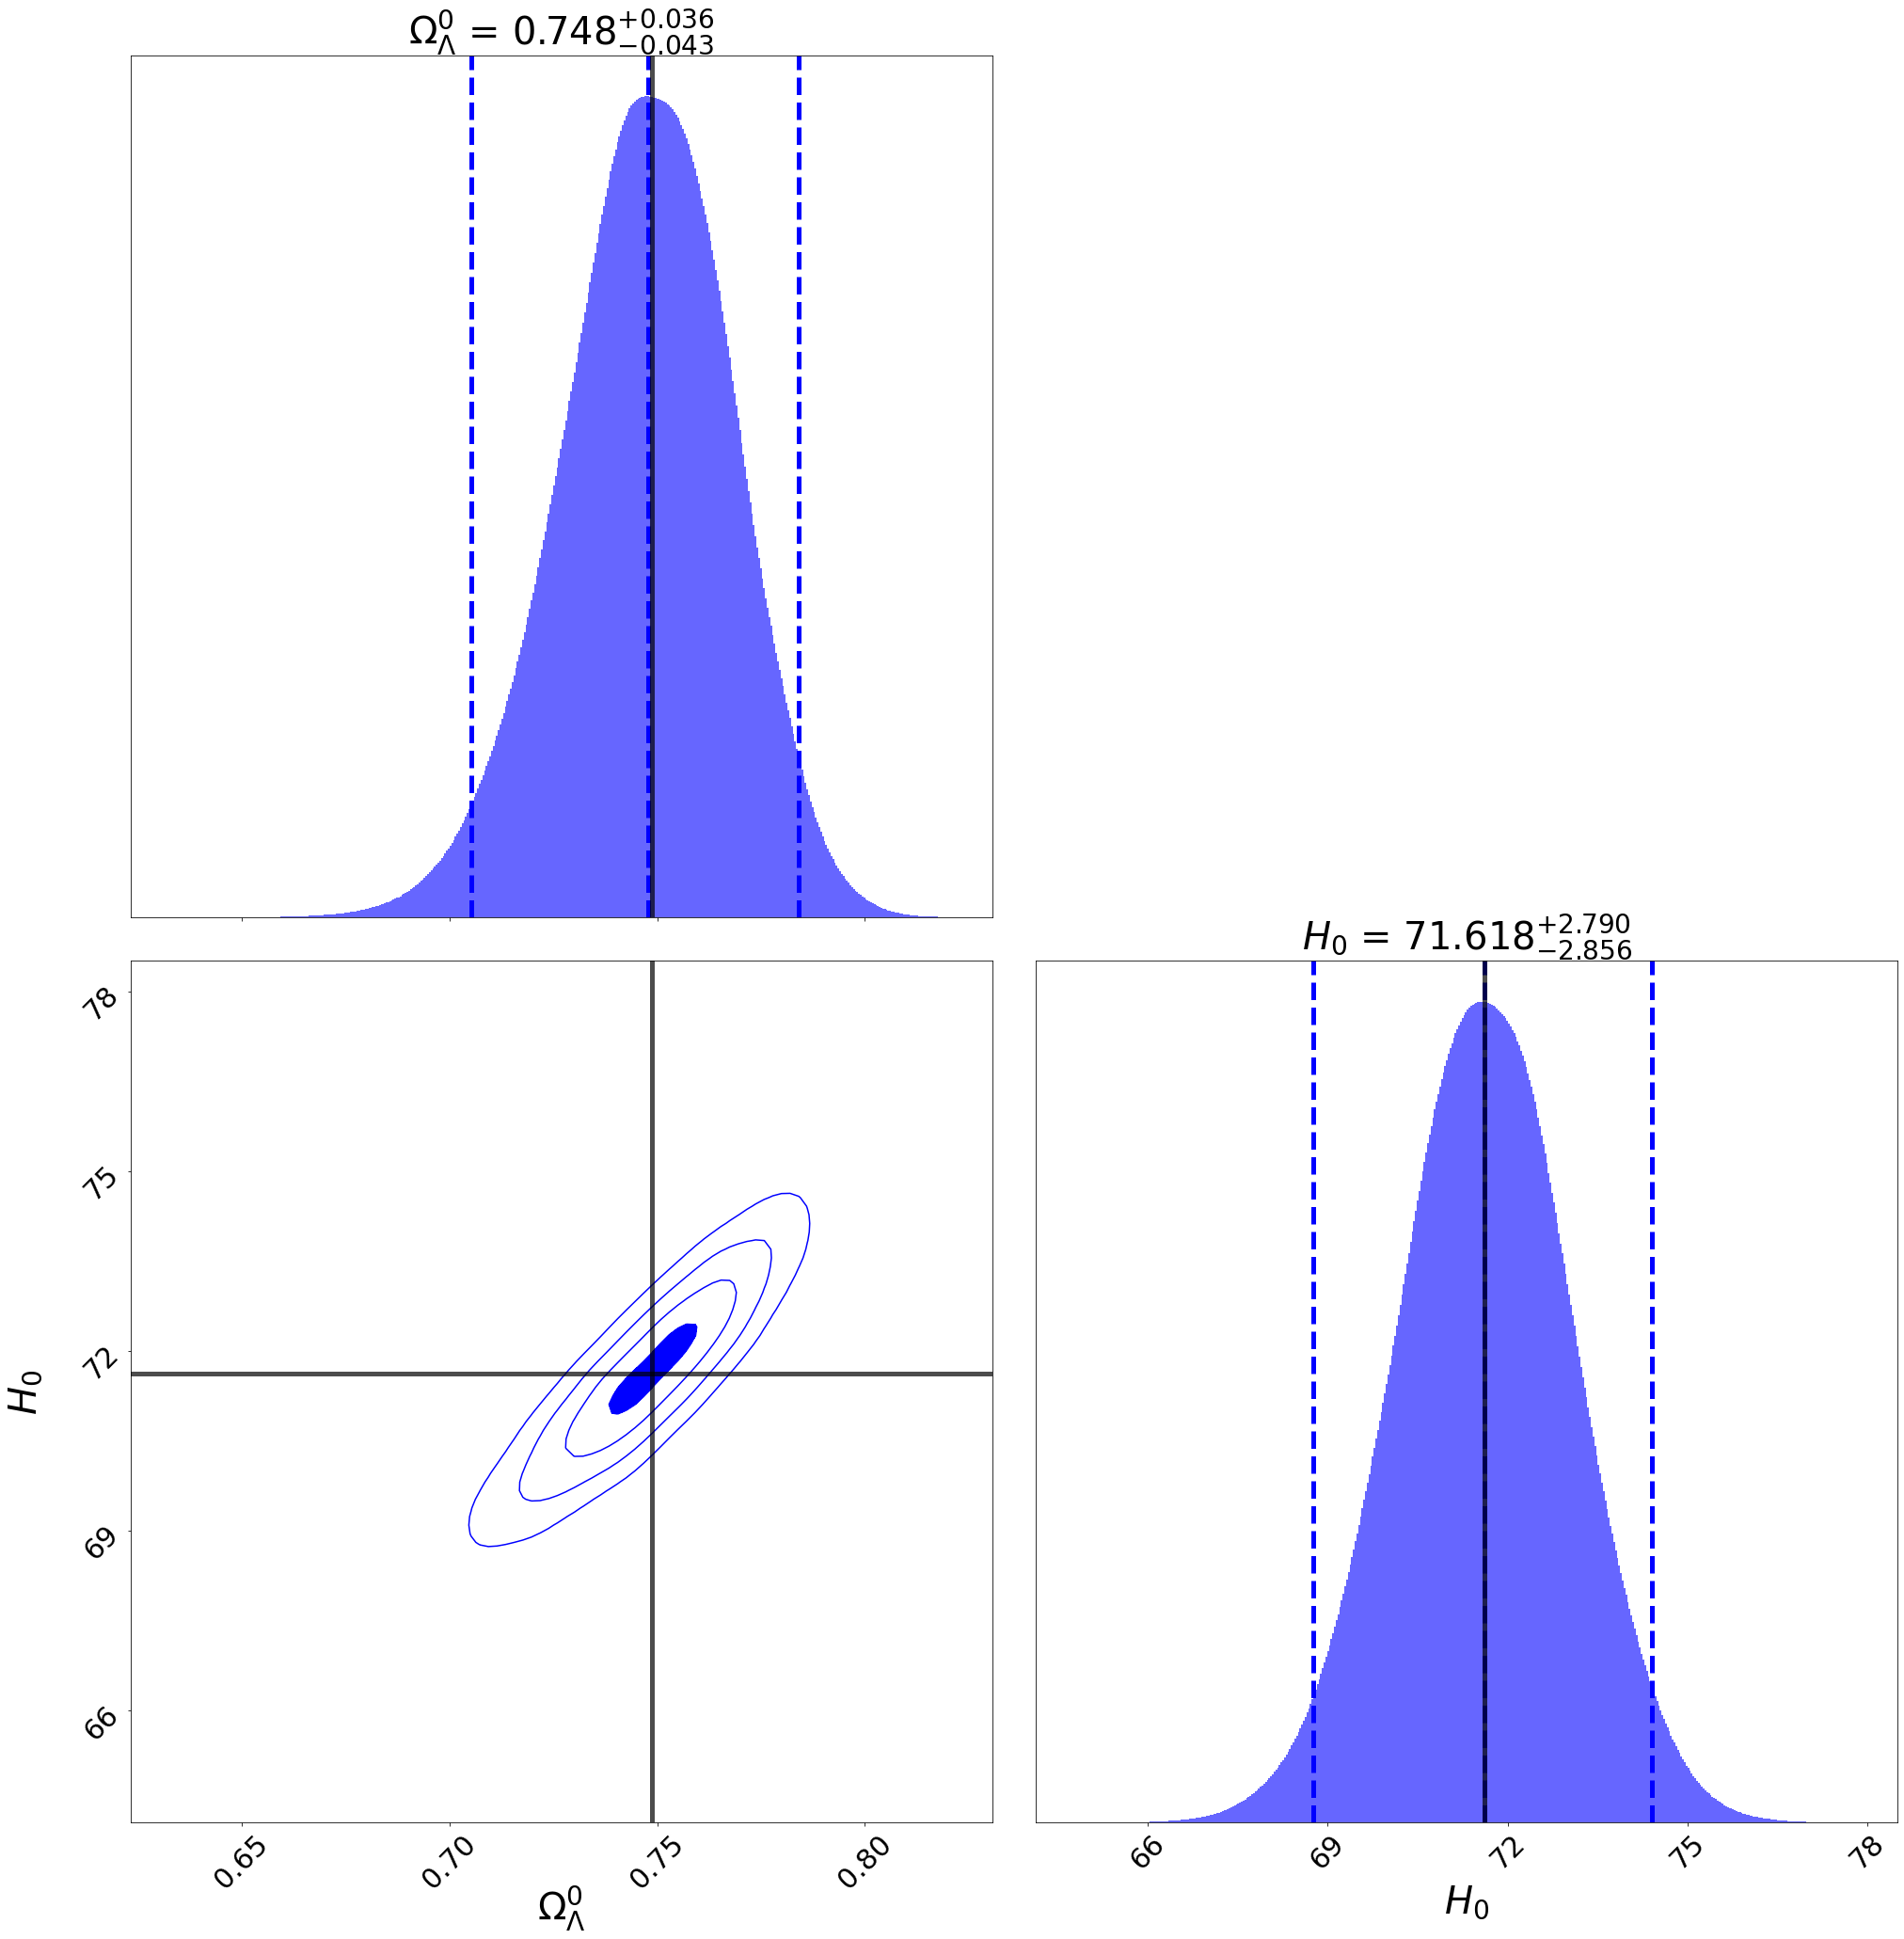

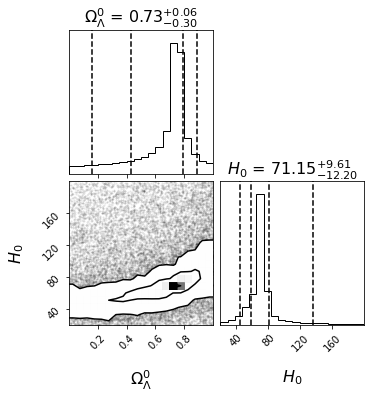

In [4]:
# Post process for Interacting model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
ndim = varying_param_numbers(variants)
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_LCDM_multi5_k0_2D_home.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
#fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                             trace_cmap='viridis', connect=True, labels = labels,
#                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_Interacting, color='blue', truths=[0.7487218904896586, 71.61324607216675],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    fig.savefig("dynesty_2D_k0.eps", format='eps')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_Interacting['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
#maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Power")

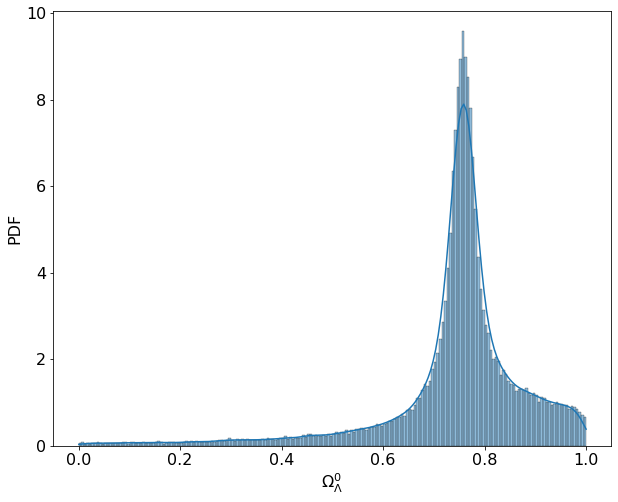

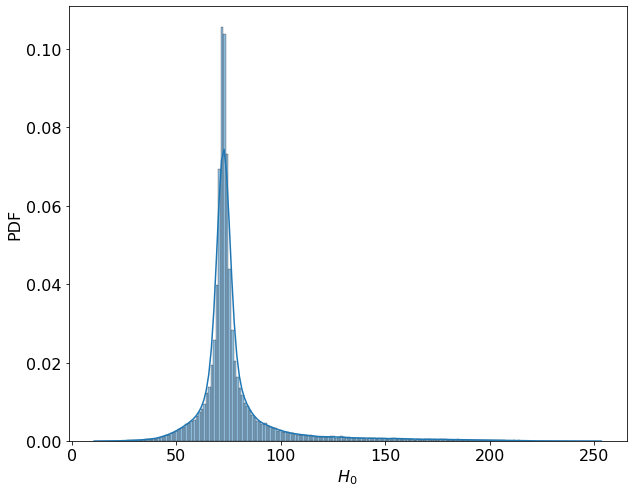

In [7]:
# Post process for Interacting model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_LCDM_multi5_k0.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
num_bins = 200
columns = list(zip(*th_samples_new['samples']))
for idx in range(ndim):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.histplot(columns[idx], bins=num_bins, stat='density', kde=True, ax = ax)
    ax.set_xlabel(global_labels[vary_index[idx]], fontsize=16)
    ax.set_ylabel('PDF', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)

    plt.show()

Converting from H0, H1 to Omega_L and H0 for Swampland model
-----------------------------------------------------------------------------------------------

In [9]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()
df = pd.DataFrame(th_samples_Interacting['samples'], columns=labels)
clevels = df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
#print("clevels = {0}".format(clevels))

$H_0$         $H_1$
count  67476.000000  67476.000000
mean      71.059037     94.857591
std       15.401352     31.095250
min        0.002132      0.006219
2.3%      17.872317     22.713810
15.9%     64.334231     75.241007
50%       74.695570     92.672539
84.1%     79.514792    115.038052
97.7%     93.920185    179.575997
max       99.998602    199.996692

In [10]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Swampland")
maxP_Interacting, maxPIndex_Interacting, th_bestP_Interacting = findMaxP_restricted_GA(th_samples_Interacting, "GA_Swampland", 100)
avgP_Interacting, avgPIndex_Interacting, th_bestAvgP_Interacting = findAvgP_restricted_GA(th_samples_Interacting, "GA_Swampland", 100)

Samples shape = (67476, 2)
th_maxL0 = [75.02395245 92.285046  ], maxLIndex = [67475], maxL = -10.371069148028013
Maximum Likelihood Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.31025000e+01
 1.91000000e+01 3.09900000e+01 4.88000000e+00 7.50239525e+01
 9.22850460e+01], maxl = -10.371069148028013
Error value for maxL parameters = 10.371069148028013
Samples shape = (67476, 2)
Maximum Posterior Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.31025000e+01
 1.91000000e+01 3.09900000e+01 4.88000000e+00 7.54994667e+01
 9.30017891e+01], maxl = -10.717964002341564
Error value for maxP parameters = 10.717964002341564
Samples shape = (67476, 2)
Average Posterior Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.31025000e+01
 1.91000000e+01 3.09900000e+01 4.88000000e+00 7.1059392

vary_index = [11, 12]
Samples shape = (67476, 2)
th_maxL0 = [75.02395245 92.285046  ], maxLIndex = [67475], maxL = -10.371069148028013
Maximum Likelihood Parameters = [0.00000000e+00 9.50000000e-01 1.00000000e+02 5.00000000e-02
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.31025000e+01
 1.91000000e+01 3.09900000e+01 4.88000000e+00 7.50239525e+01
 9.22850460e+01], maxl = -10.371069148028013
Error value for maxL parameters = 10.371069148028013


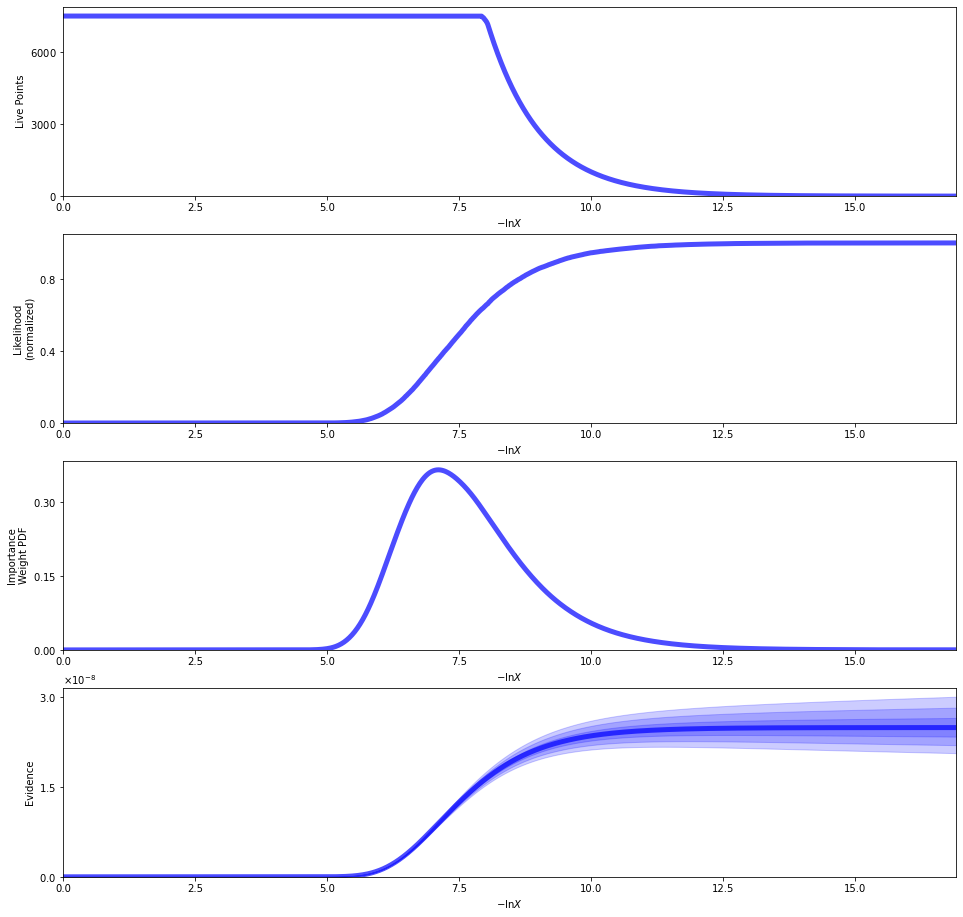

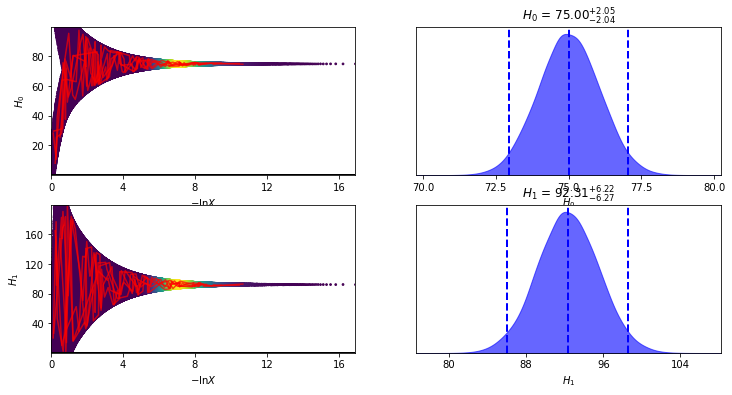

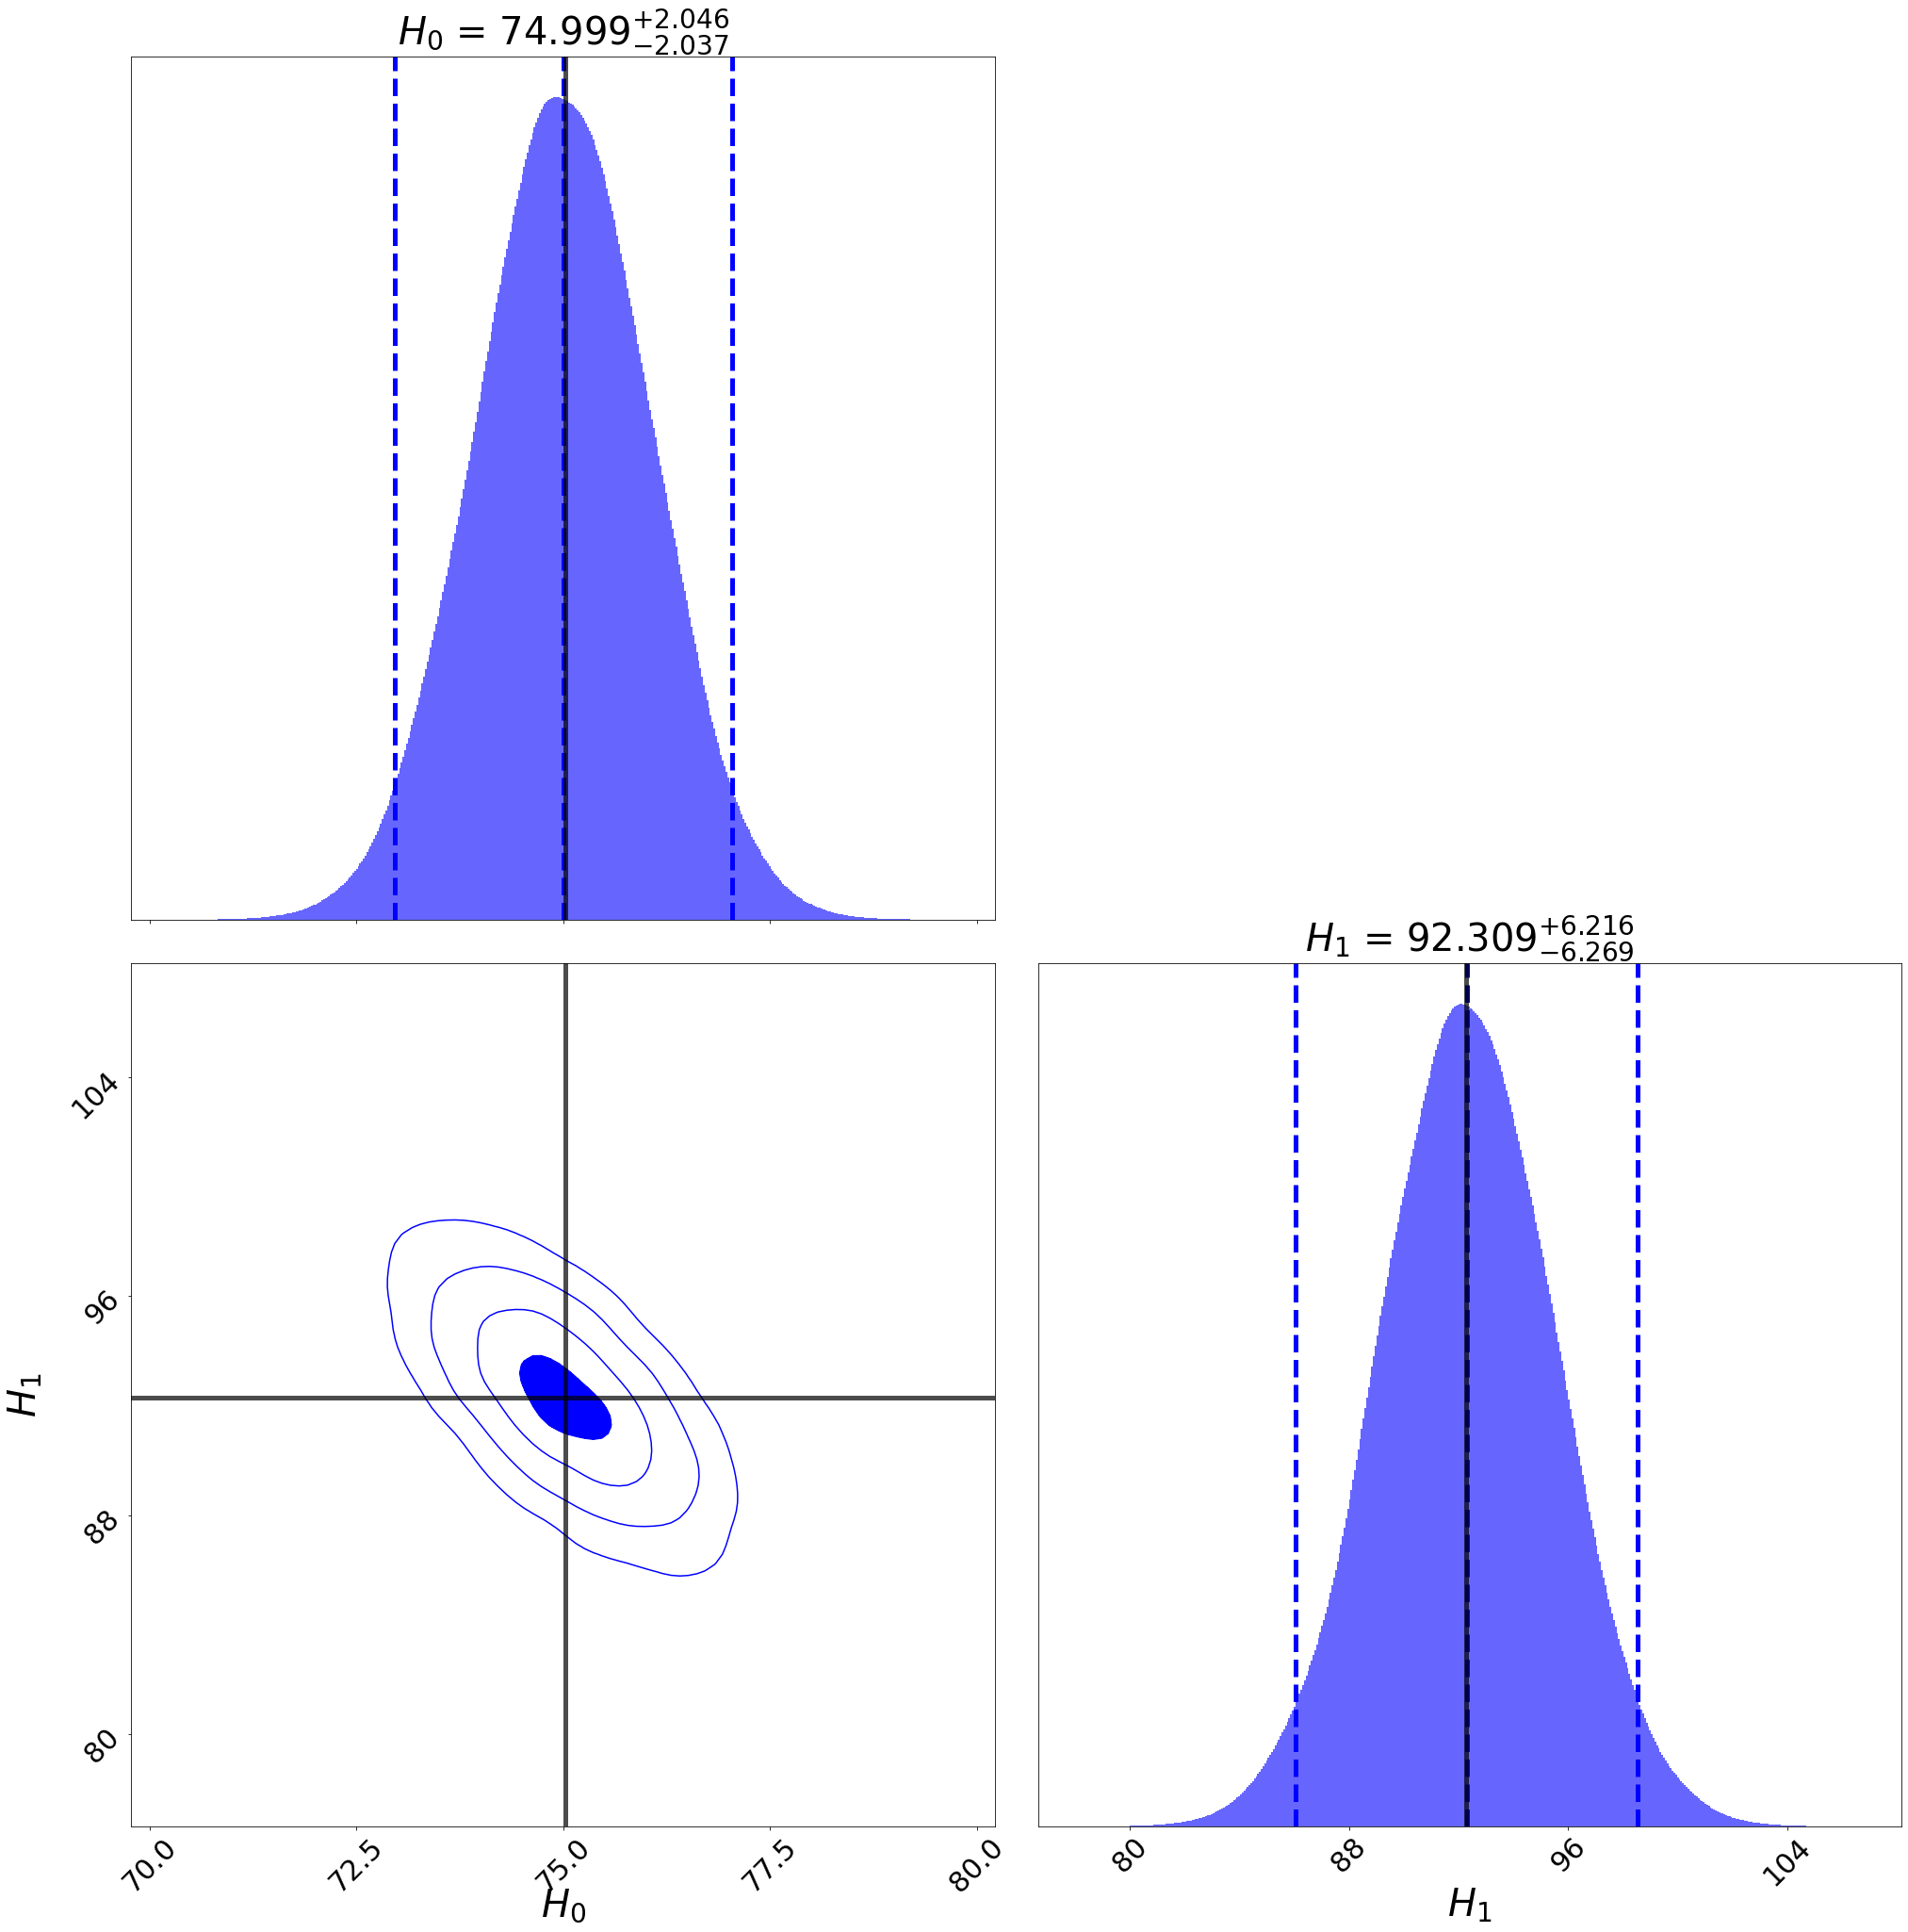

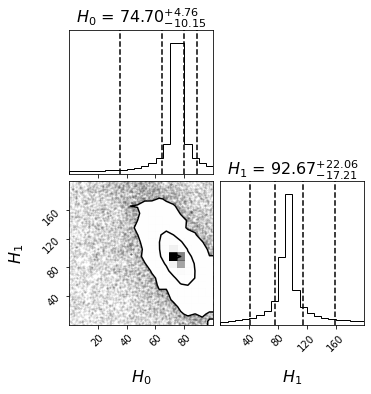

In [11]:
# Post process for Interacting model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True, labels = labels,
                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_Interacting, color='blue', truths=[75.02395245, 92.285046],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_Interacting['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Swampland")

In [12]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()

x= [ 70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_GA_swampland, th_samples_Interacting, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_GA_swampland, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))


C:\Users\hwlee\OneDrive - 인제대학교\Projects\Physics\MachineLearning\y2022\ijml2202-GA approach for cosmological data fit(title changed)\codes\python\Bayesian_Dynesty_Restricted_LCDM_ga_20220515.py:1264: RuntimeWarning: invalid value encountered in sqrt
  v = H0*np.sqrt((1-OL0)*(1+z)**3 + OL0)


th_samples_new = (61020, 2)
th_samples_ignored = (6456, 2)
maxlogL = -10.371069148028013, maxIndex = [61019]
MaxL = [0.7517682483479713, 71.891202003016]


vary_index = [1, 2]


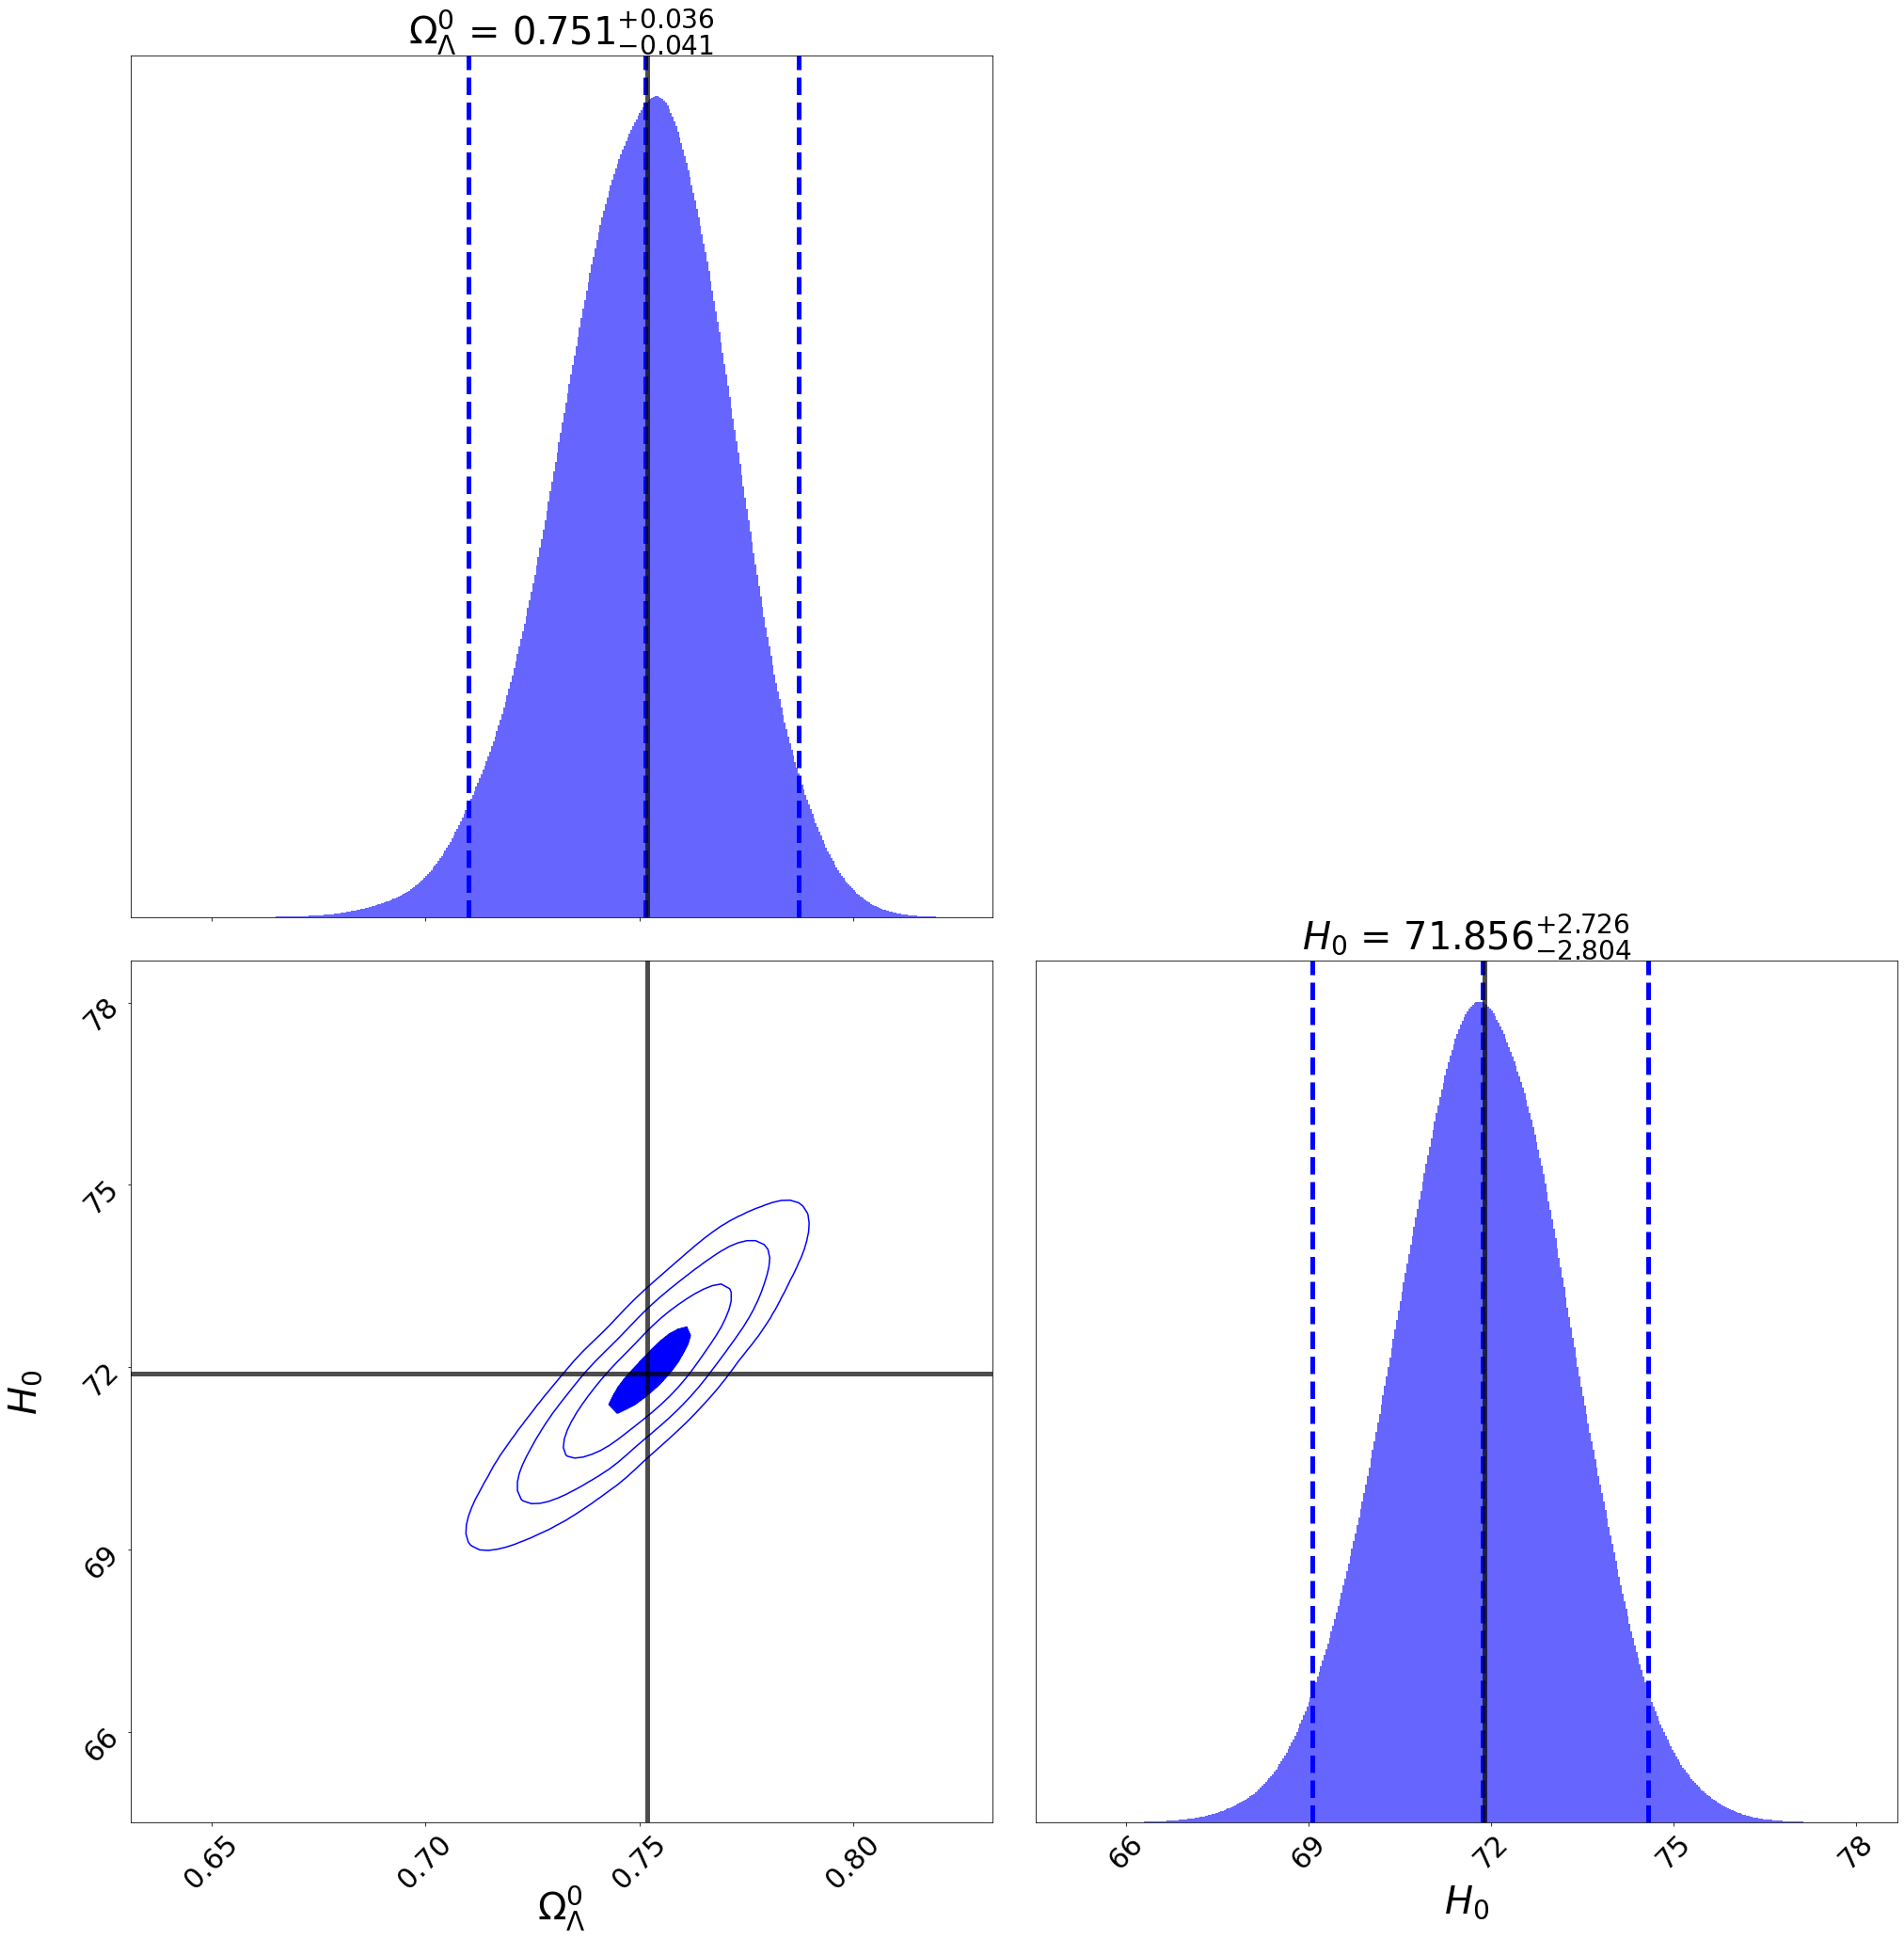

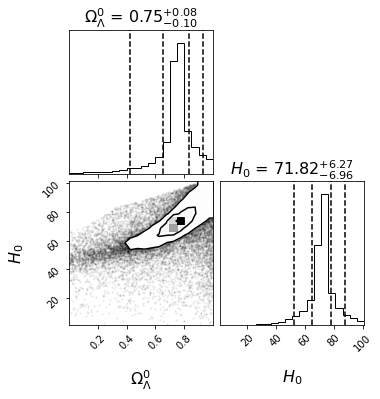

In [13]:
# Post process for Interacting model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ndim = varying_param_numbers(variants)
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
#fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                             trace_cmap='viridis', connect=True, labels = labels,
#                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_new, color='blue', truths=[0.7517682483479713, 71.891202003016],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_new['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
#maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "GA_Power")

calculating for ML None
------------------------------------

In [3]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 6.86667428e+01,  4.09152012e+01, -1.17542612e+01,  5.97263358e+01, -3.20020670e+01,  4.36821439e+00,  5.76780169e-02]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)

ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_ML_None_multi5_6D_test.npy', allow_pickle='TRUE').item()
df = pd.DataFrame(th_samples_Interacting['samples'], columns=labels)
clevels = df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
#print("clevels = {0}".format(clevels))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_ML_None_multi5_6D_test.npy', allow_pickle='TRUE').item()
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_None")
maxP_Interacting, maxPIndex_Interacting, th_bestP_Interacting = findMaxP_restricted_GA(th_samples_Interacting, "ML_None", 100)
avgP_Interacting, avgPIndex_Interacting, th_bestAvgP_Interacting = findAvgP_restricted_GA(th_samples_Interacting, "ML_None", 100)

Samples shape = (107505, 7)
th_maxL0 = [  75.06618883   -8.34754801   31.27017215  233.46386409 -433.70950474
  257.15902278  -48.94669883], maxLIndex = [107504], maxL = -28.76264331722261
Maximum Likelihood Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  7.50661888e+01 -8.34754801e+00  3.12701722e+01
  2.33463864e+02 -4.33709505e+02  2.57159023e+02 -4.89466988e+01], maxl = -28.76264331722261
Error value for maxL parameters = 28.76264331722261
Samples shape = (107505, 7)
Maximum Posterior Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  7.29980747e+01  5.98588083e+00  6.00015671e+00
 -2.99995353e+01 -1.49983208e+02 -2.99955270e+01  6.042

vary_index = [13, 14, 15, 16, 17, 18, 19]
Samples shape = (107505, 7)
th_maxL0 = [  75.06618883   -8.34754801   31.27017215  233.46386409 -433.70950474
  257.15902278  -48.94669883], maxLIndex = [107504], maxL = -28.76264331722261
Maximum Likelihood Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  7.50661888e+01 -8.34754801e+00  3.12701722e+01
  2.33463864e+02 -4.33709505e+02  2.57159023e+02 -4.89466988e+01], maxl = -28.76264331722261
Error value for maxL parameters = 28.76264331722261


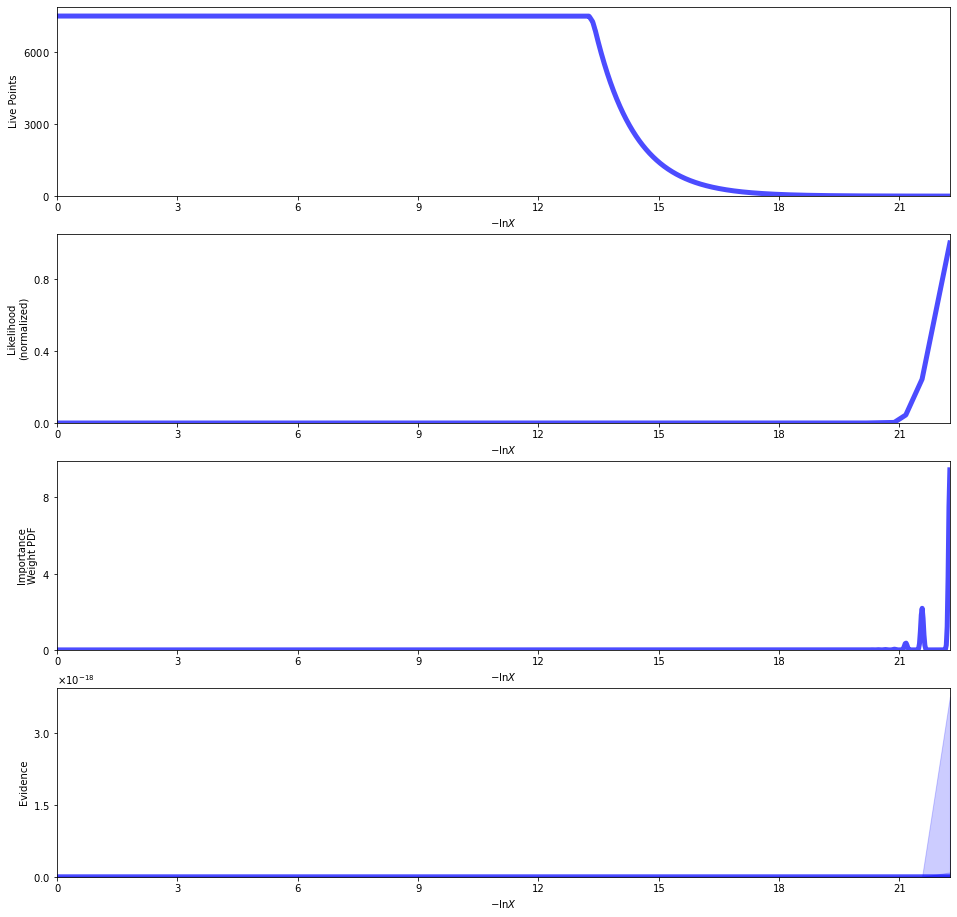

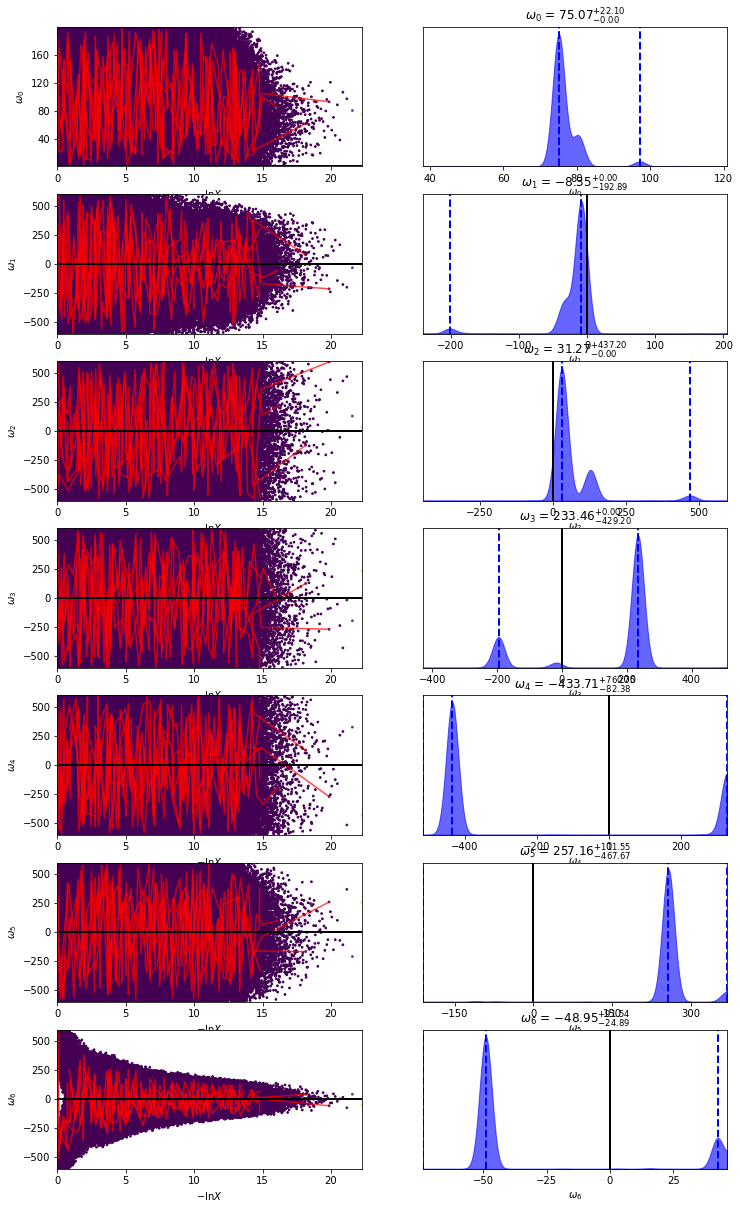

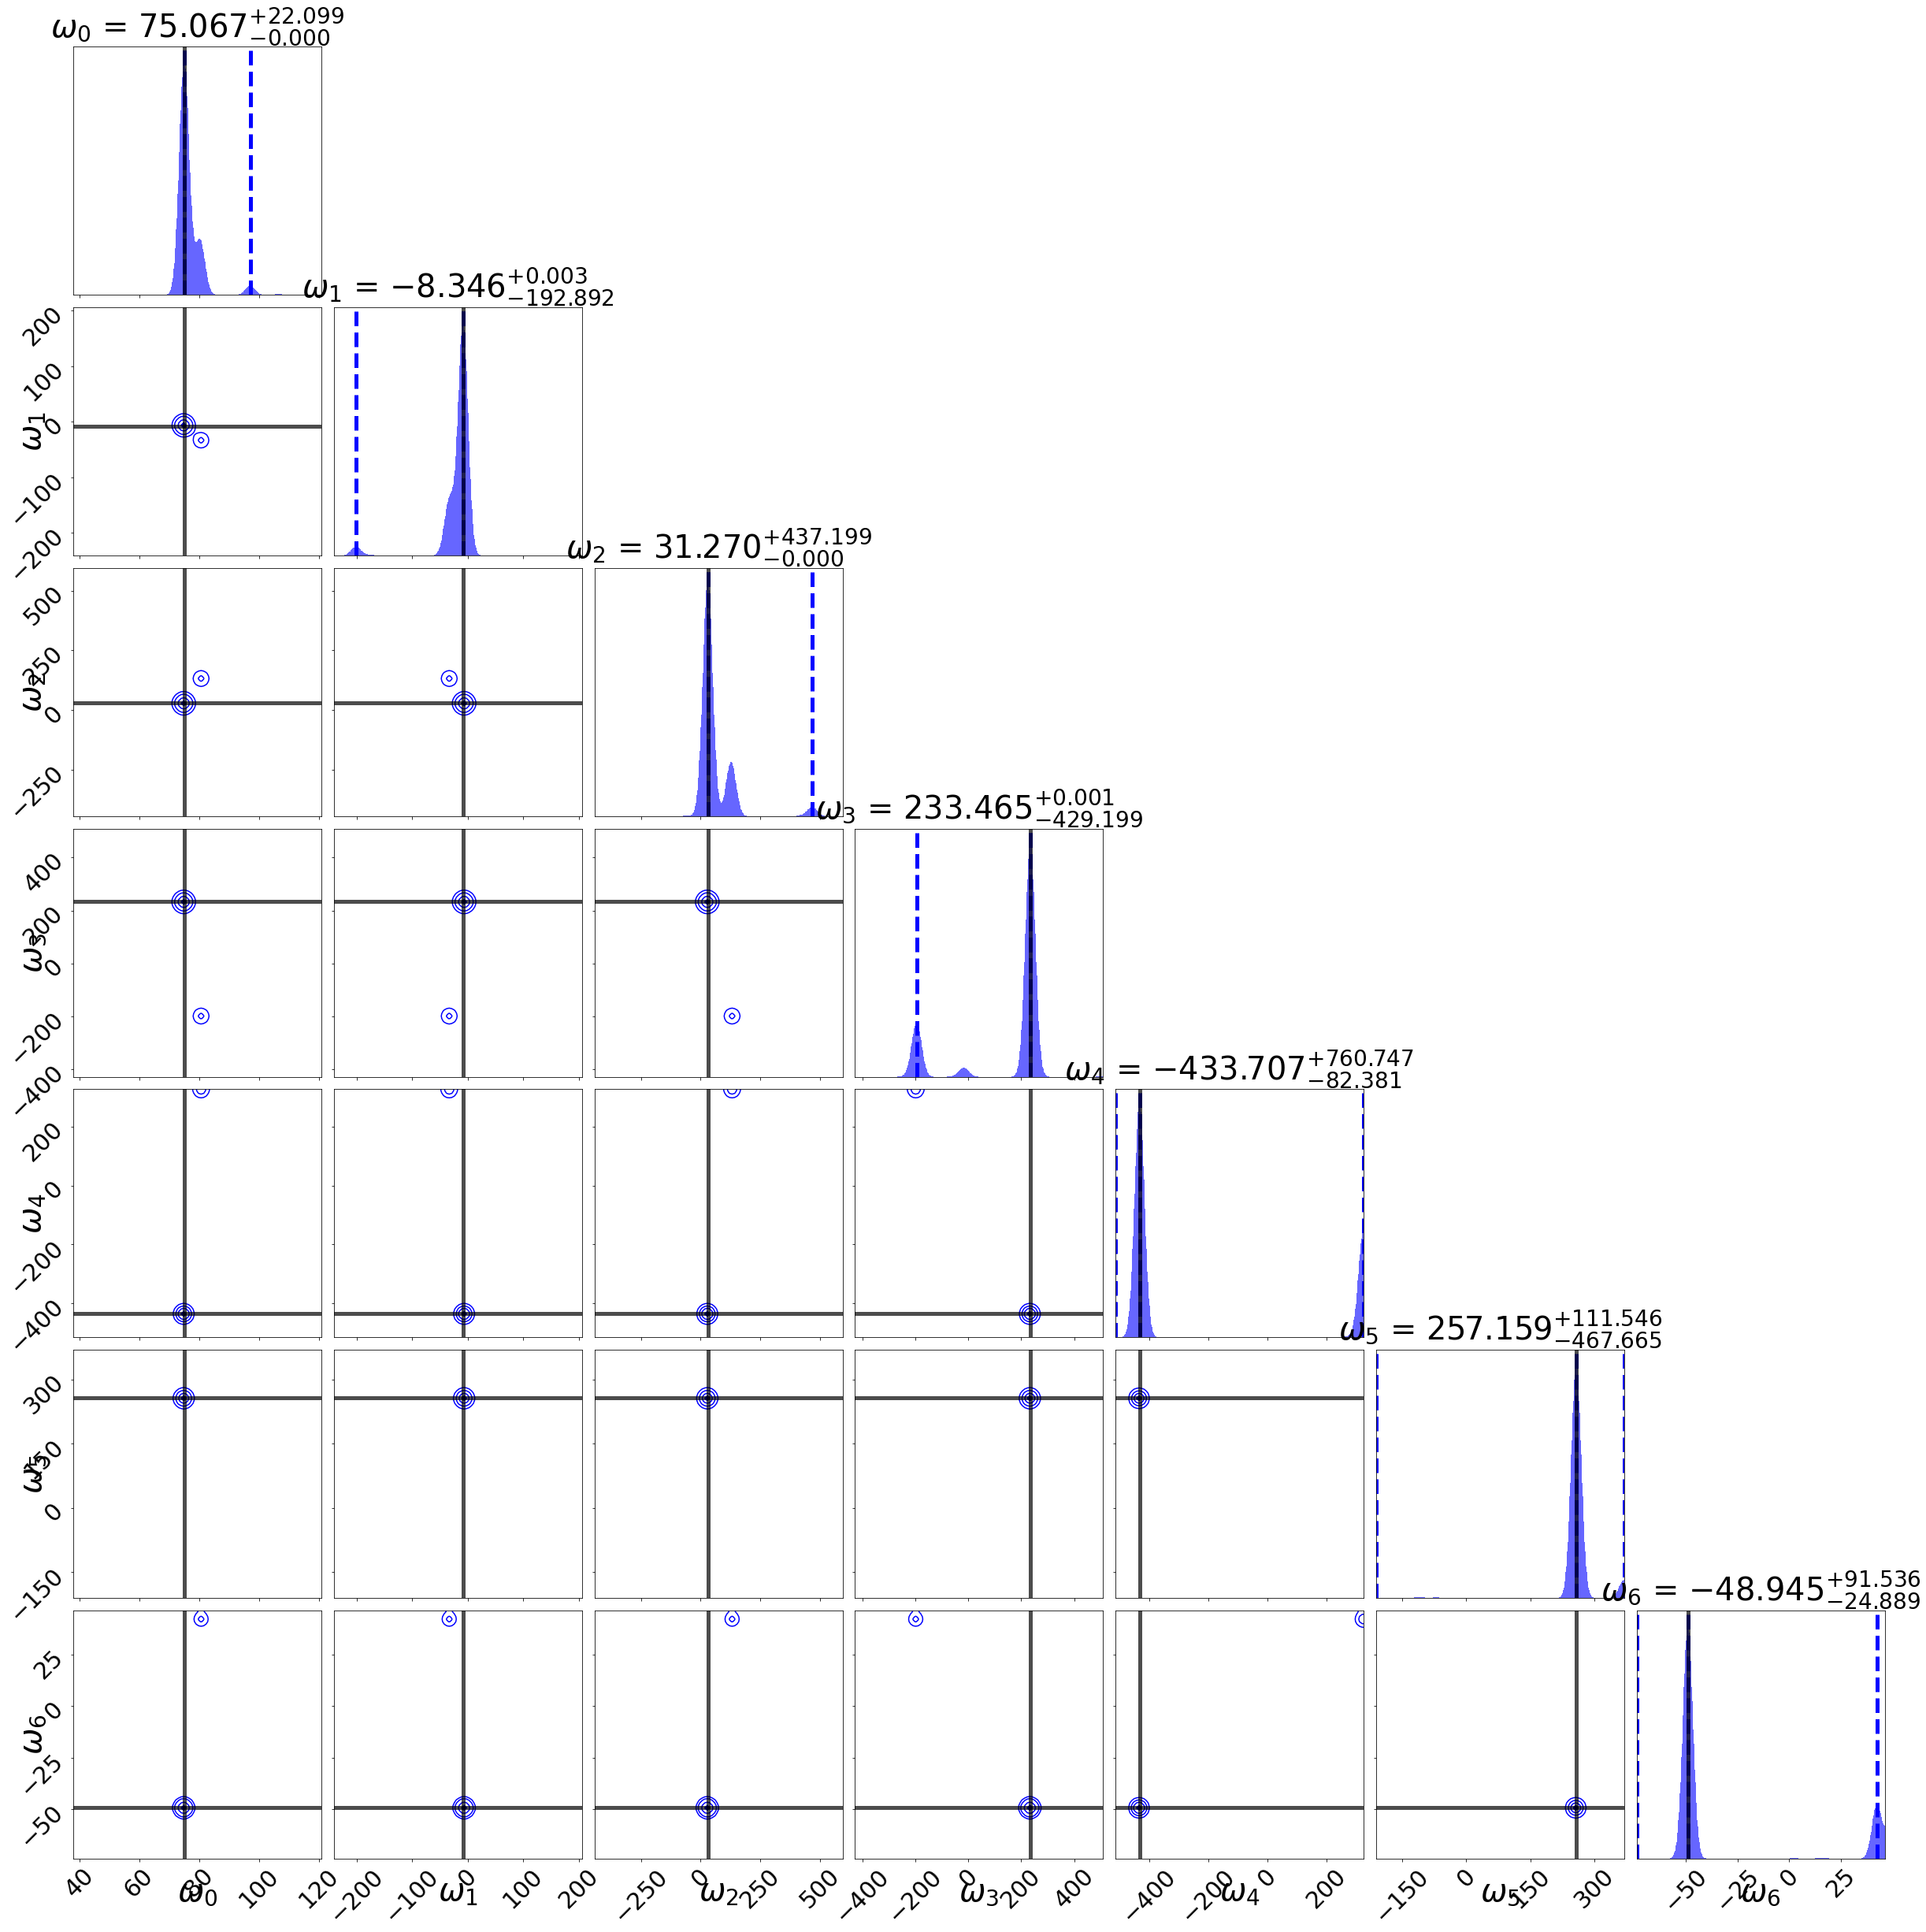

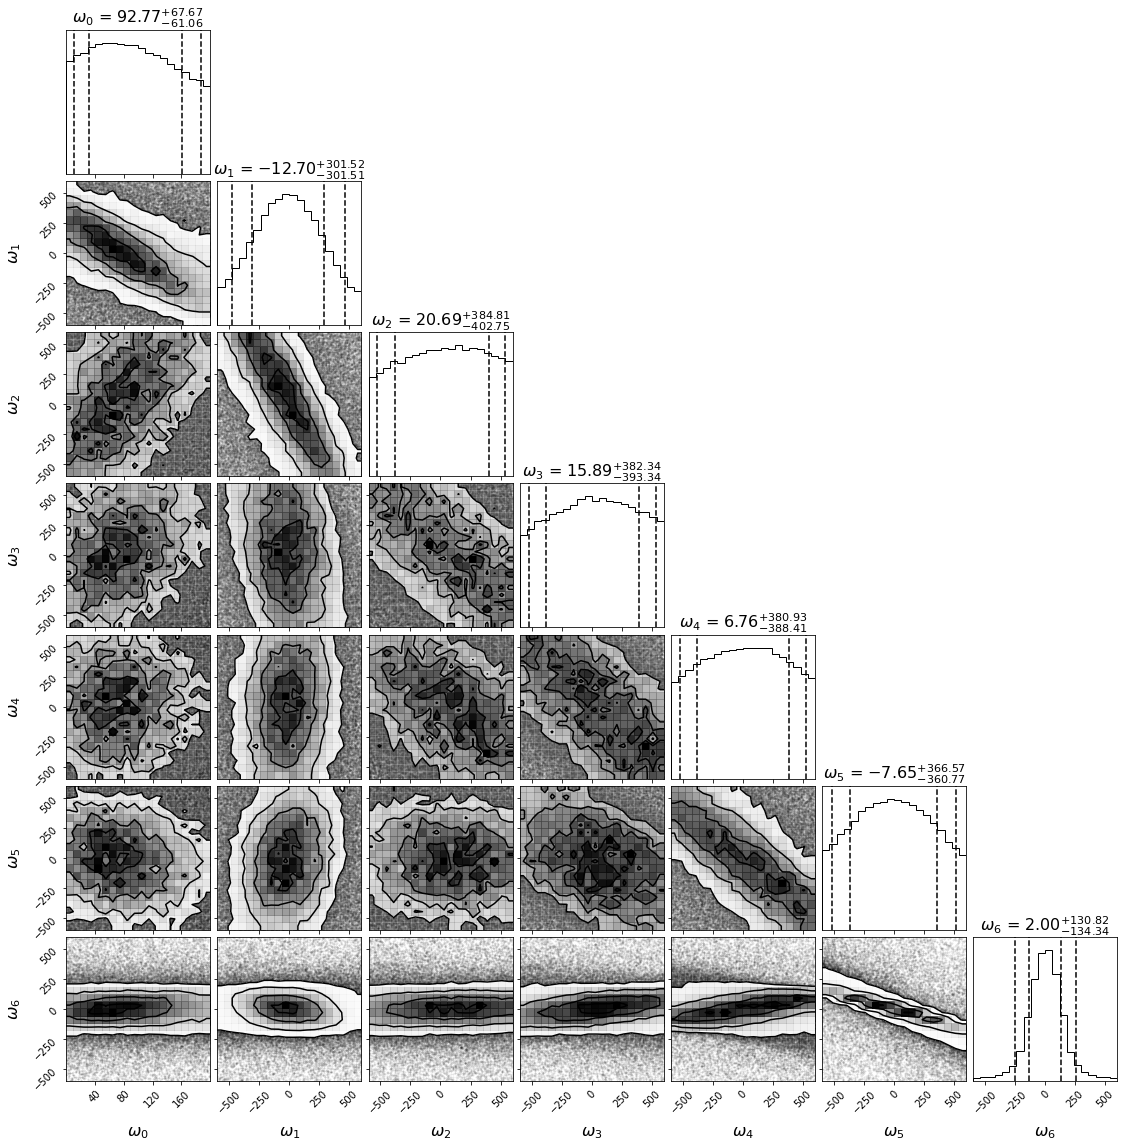

In [4]:
# Post process for ML model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 6.86667428e+01,  4.09152012e+01, -1.17542612e+01,  5.97263358e+01, -3.20020670e+01,  4.36821439e+00,  5.76780169e-02]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_ML_None_multi5_6D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True, labels = labels,
                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_Interacting, color='blue', truths=[75.06618883,   -8.34754801,   31.27017215,  233.46386409, -433.70950474,  257.15902278,  -48.94669883],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_Interacting['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_None")

In [5]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 61.90718678,  60.82930686,   4.13452832,  11.0615689,  -58.71712658, 47.11027426, -10.27919816]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
th_samples_Interacting = np.load('ijml2202_7D_ML_None_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()

x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_ML_none, th_samples_Interacting, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_ML_none, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

C:\Users\hwlee\physics_local\MachineLearning\y2022\ijml2202-GA approach for cosmological data fit(title changed)\codes\python\Bayesian_Dynesty_Restricted_LCDM_ga_20220518.py:1272: RuntimeWarning: invalid value encountered in sqrt
  v = H0*np.sqrt((1-OL0)*(1+z)**3 + OL0)


th_samples_new = (33759, 2)
th_samples_ignored = (73746, 2)
maxlogL = -28.76264331722261, maxIndex = [33758]
MaxL = [0.7579337039519254, 70.1368519197567]


vary_index = [1, 2]
Samples shape = (107505, 7)
th_maxL0 = [  75.06618883   -8.34754801   31.27017215  233.46386409 -433.70950474
  257.15902278  -48.94669883], maxLIndex = [107504], maxL = -28.76264331722261
Maximum Likelihood Parameters = [ 0.00000000e+00  7.50661888e+01 -8.34754801e+00  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  6.19071868e+01  6.08293069e+01  4.13452832e+00
  1.10615689e+01 -5.87171266e+01  4.71102743e+01 -1.02791982e+01], maxl = -28.76264331722261
Error value for maxL parameters = 15.787588077924031


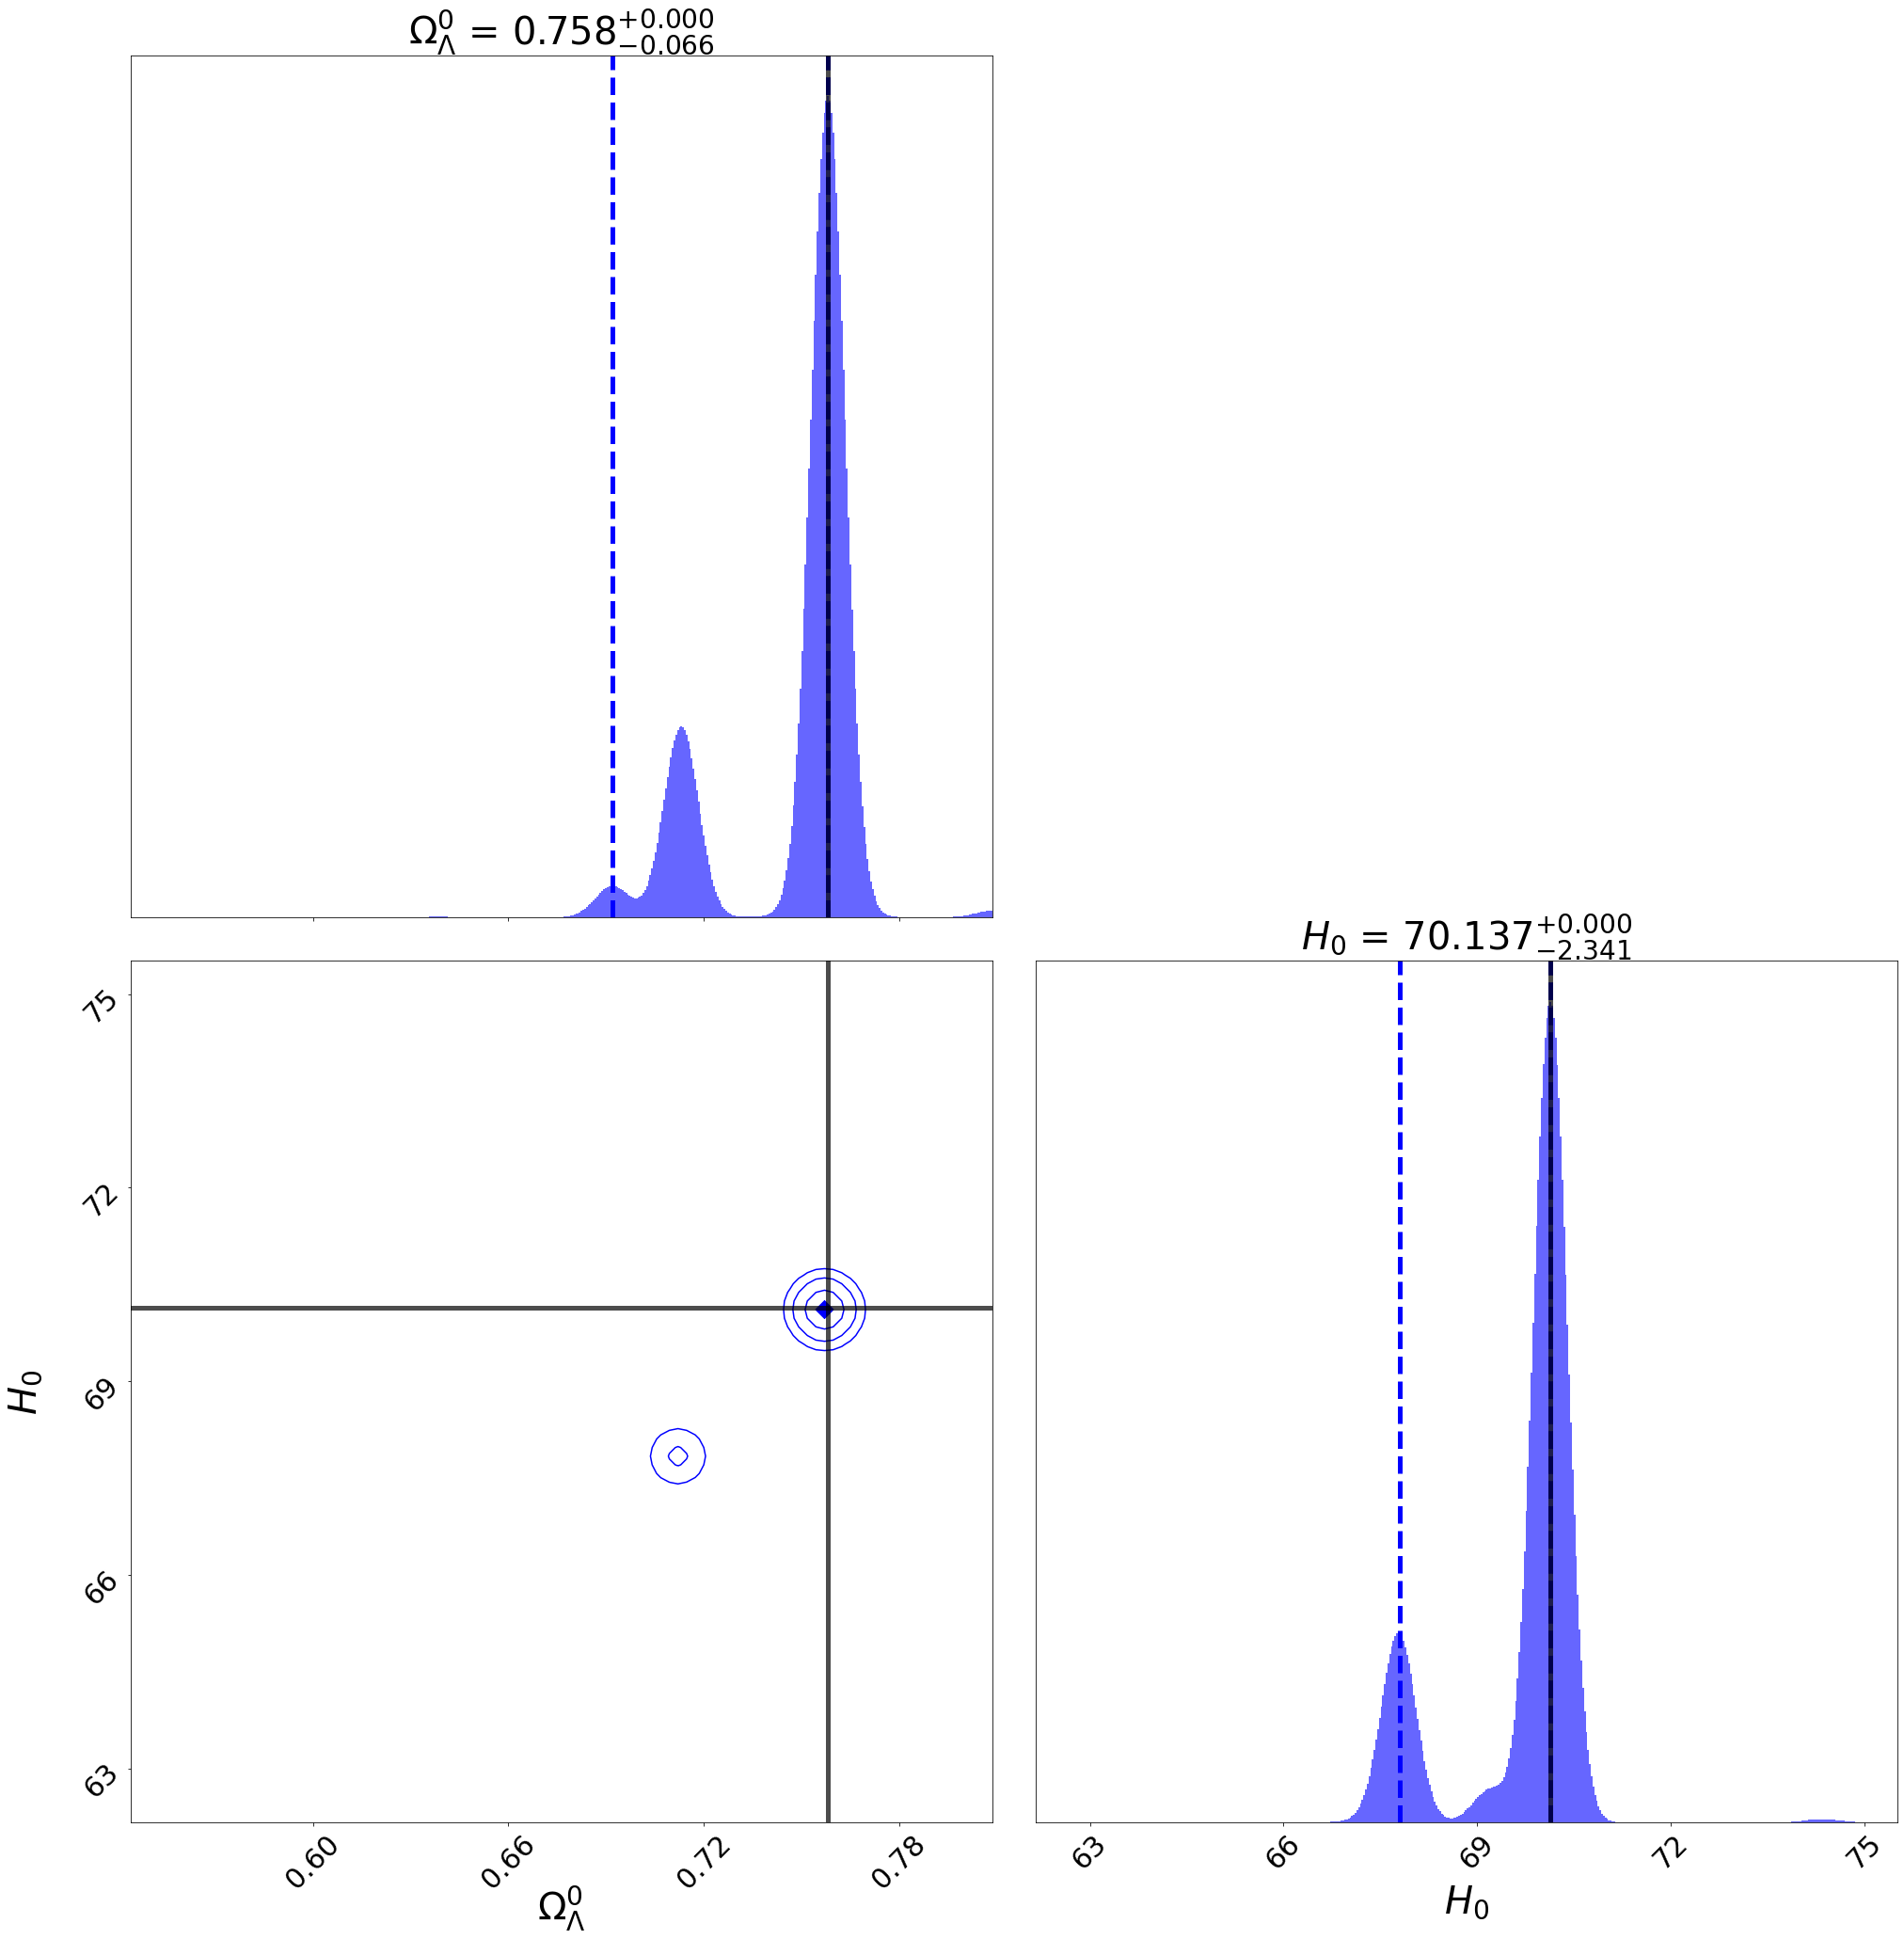

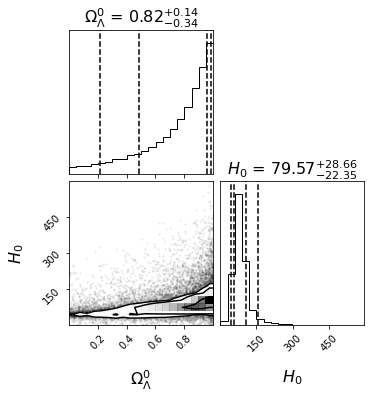

In [6]:
# Post process for ML model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 61.90718678,  60.82930686,   4.13452832,  11.0615689,  -58.71712658, 47.11027426, -10.27919816]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
ndim = varying_param_numbers(variants)
print("vary_index = {0}".format(vary_index))
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
#fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                             trace_cmap='viridis', connect=True, labels = labels,
#                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_new, color='blue', truths=[0.7579337039519254, 70.1368519197567],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_new['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_None")

Calculation for ML Ridge
------------------------------------

In [11]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 75.36834149,  1.39695876, 35.8138221,  26.24176585, -9.04444438, -0.87463066, -0.35087345]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)

ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
df = pd.DataFrame(th_samples_Interacting['samples'], columns=labels)
clevels = df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
#print("clevels = {0}".format(clevels))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_ML_Ridge_multi5_6D_test.npy', allow_pickle='TRUE').item()
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_Ridge")
maxP_Interacting, maxPIndex_Interacting, th_bestP_Interacting = findMaxP_restricted_GA(th_samples_Interacting, "ML_Ridge", 100)
avgP_Interacting, avgPIndex_Interacting, th_bestAvgP_Interacting = findAvgP_restricted_GA(th_samples_Interacting, "ML_Ridge", 100)

Samples shape = (107505, 7)
th_maxL0 = [ 52.78989736  86.44790654 -14.73966626  -9.08312241 -45.41211302
  41.83965968  -8.68383622], maxLIndex = [107504], maxL = -54.38107182029481
Maximum Likelihood Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  5.27898974e+01  8.64479065e+01 -1.47396663e+01
 -9.08312241e+00 -4.54121130e+01  4.18396597e+01 -8.68383622e+00], maxl = -54.38107182029481
Error value for maxL parameters = 119.39707552925077
Samples shape = (107505, 7)
Maximum Posterior Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  6.89983942e+01 -1.80039444e+01 -2.99992641e+01
 -1.80009313e+01  1.79972519e+01 -7.80046545e+01 -1.79300783e

vary_index = [13, 14, 15, 16, 17, 18, 19]
Samples shape = (107505, 7)
th_maxL0 = [ 52.78989736  86.44790654 -14.73966626  -9.08312241 -45.41211302
  41.83965968  -8.68383622], maxLIndex = [107504], maxL = -54.38107182029481
Maximum Likelihood Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  5.27898974e+01  8.64479065e+01 -1.47396663e+01
 -9.08312241e+00 -4.54121130e+01  4.18396597e+01 -8.68383622e+00], maxl = -54.38107182029481
Error value for maxL parameters = 119.39707552925077


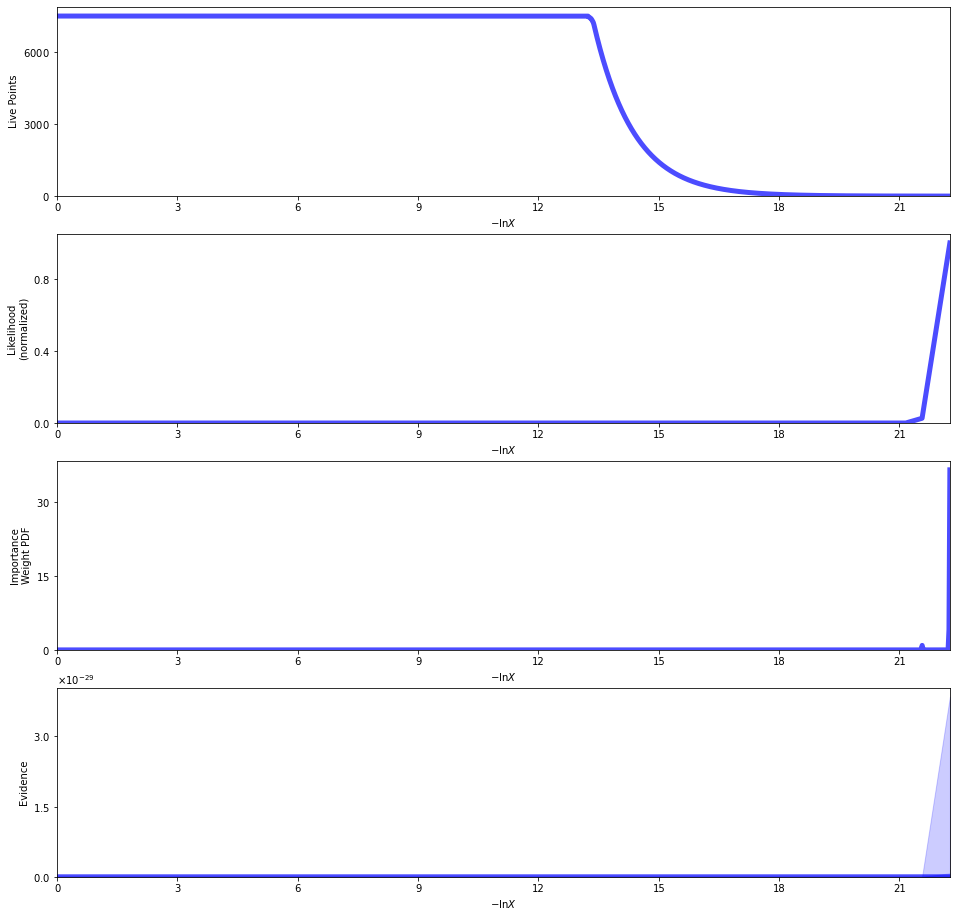

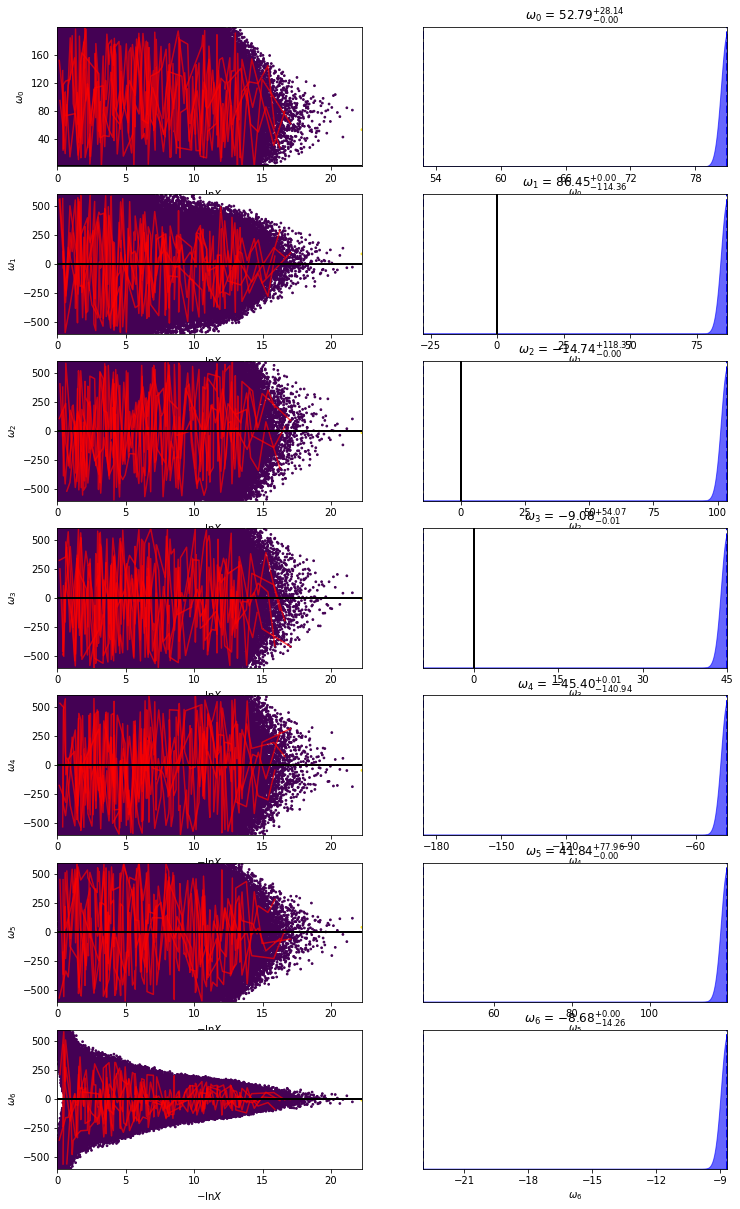

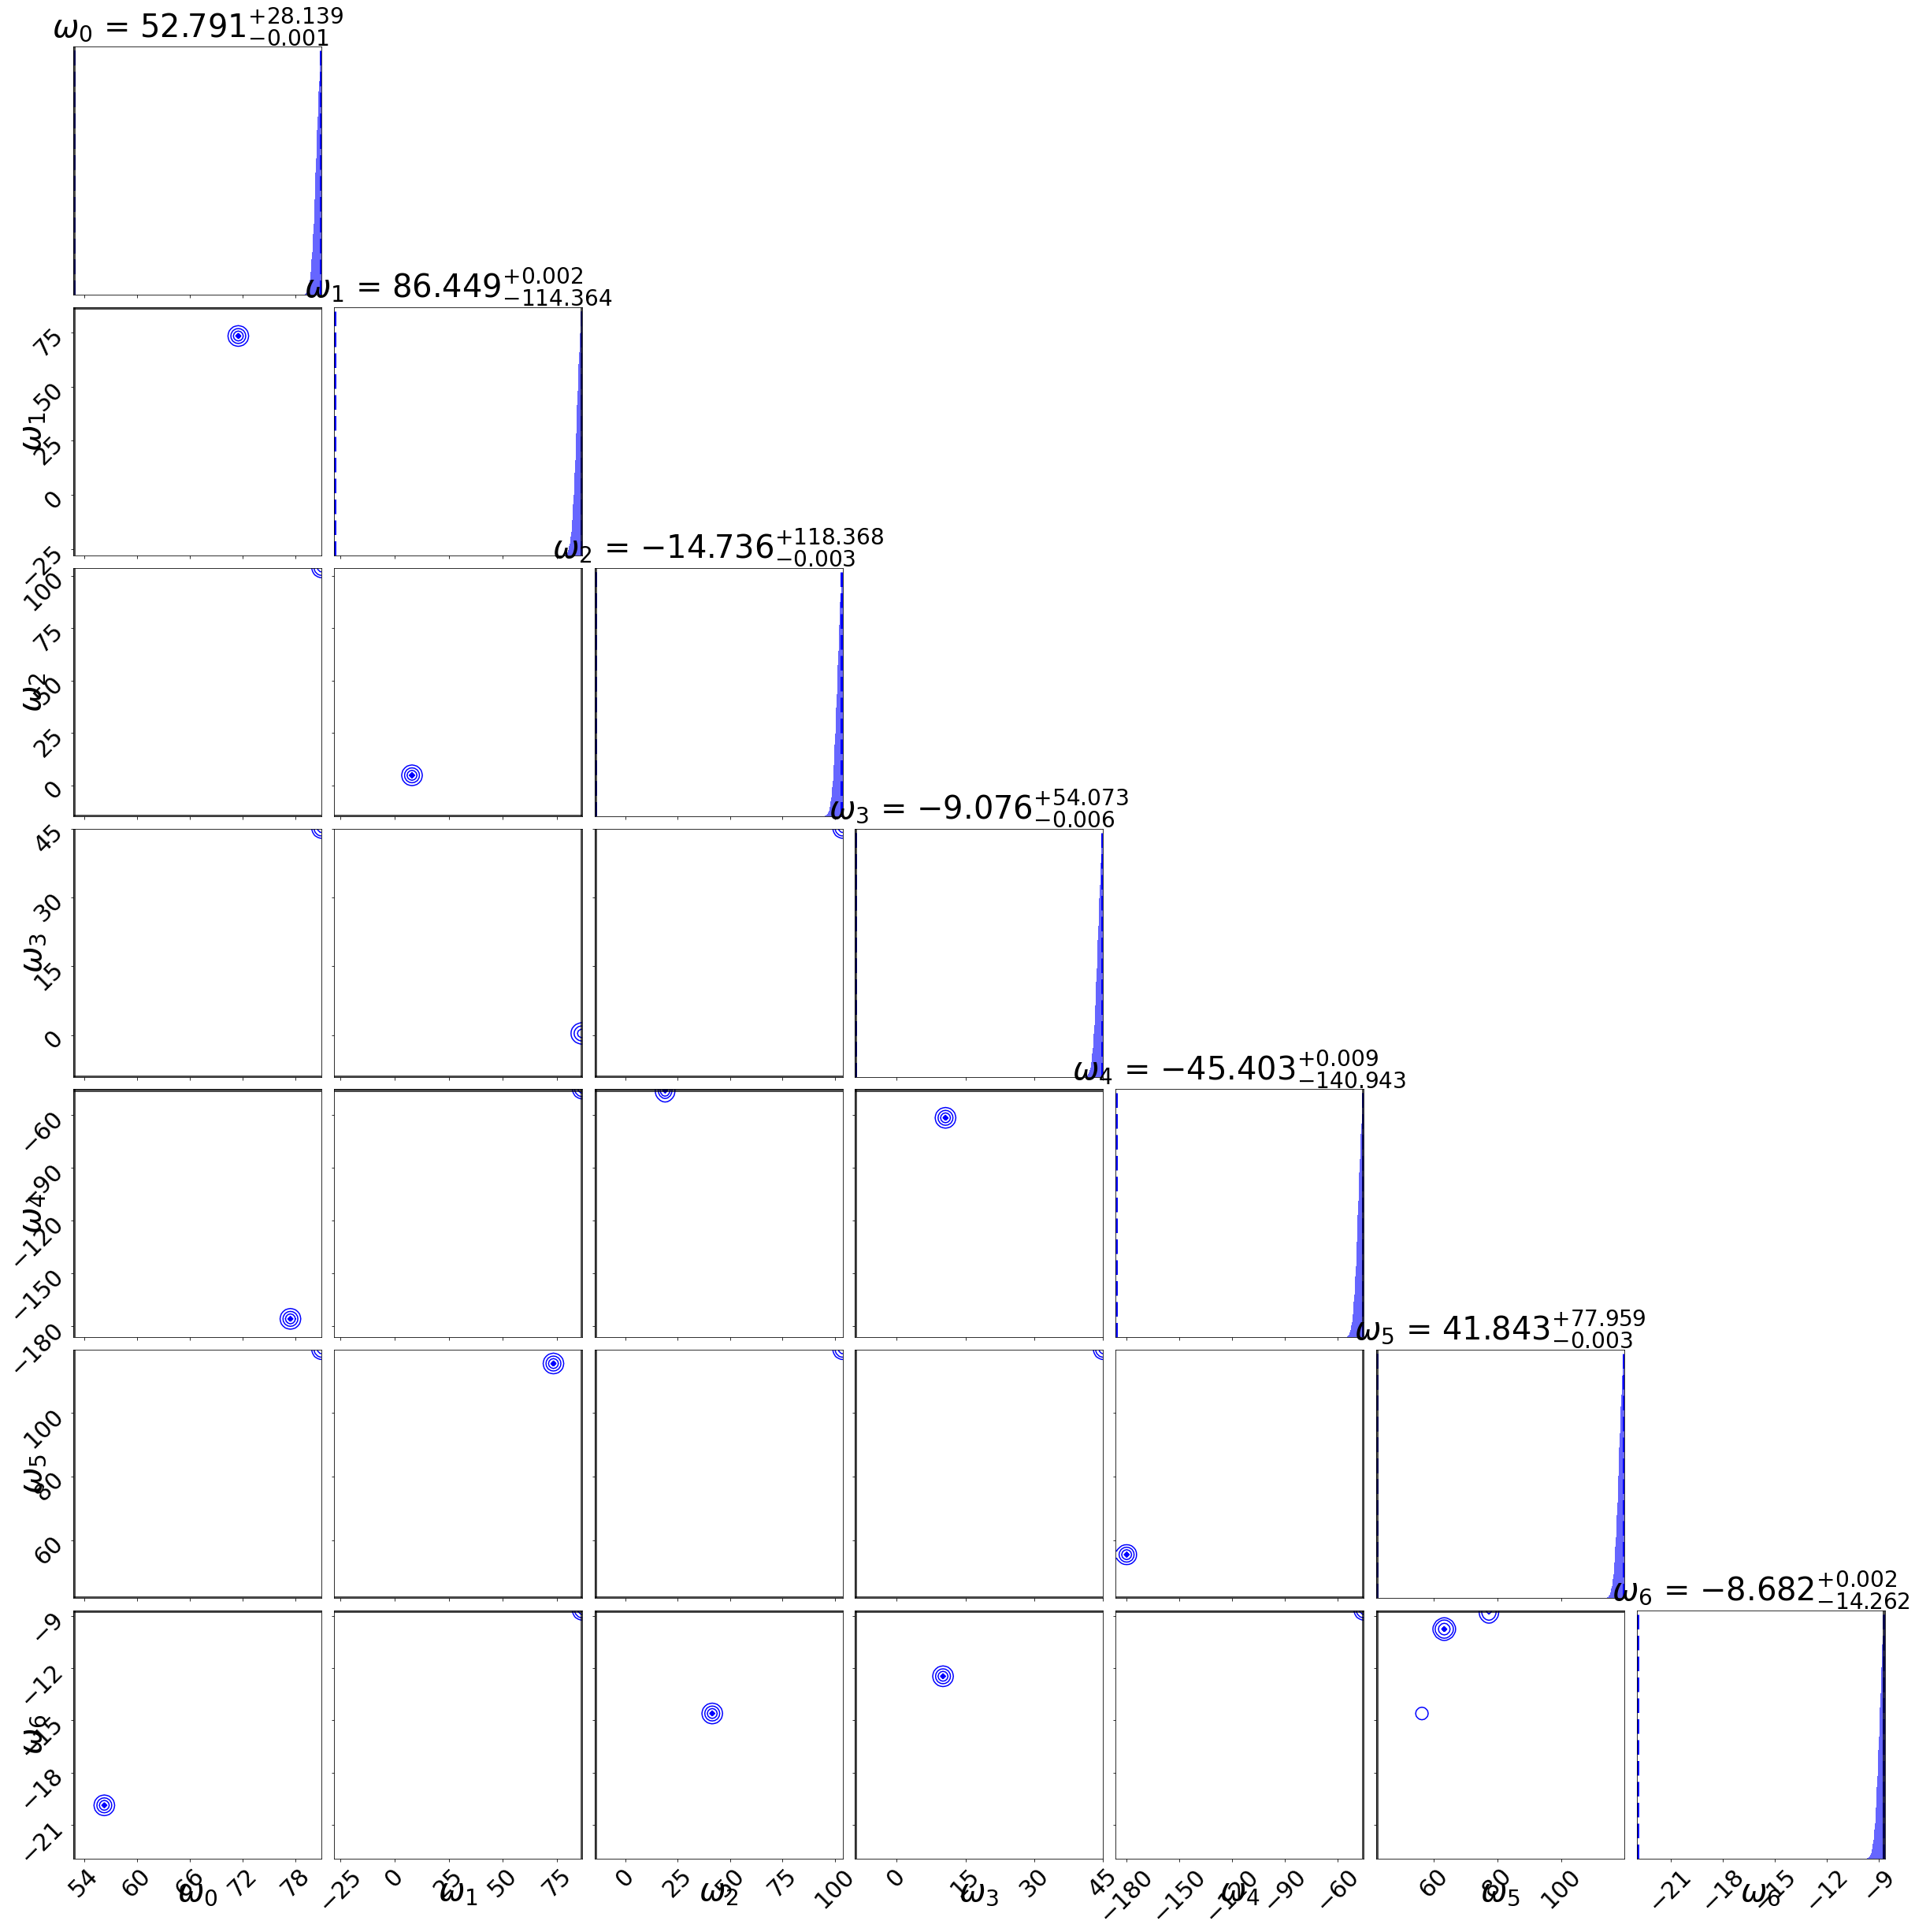

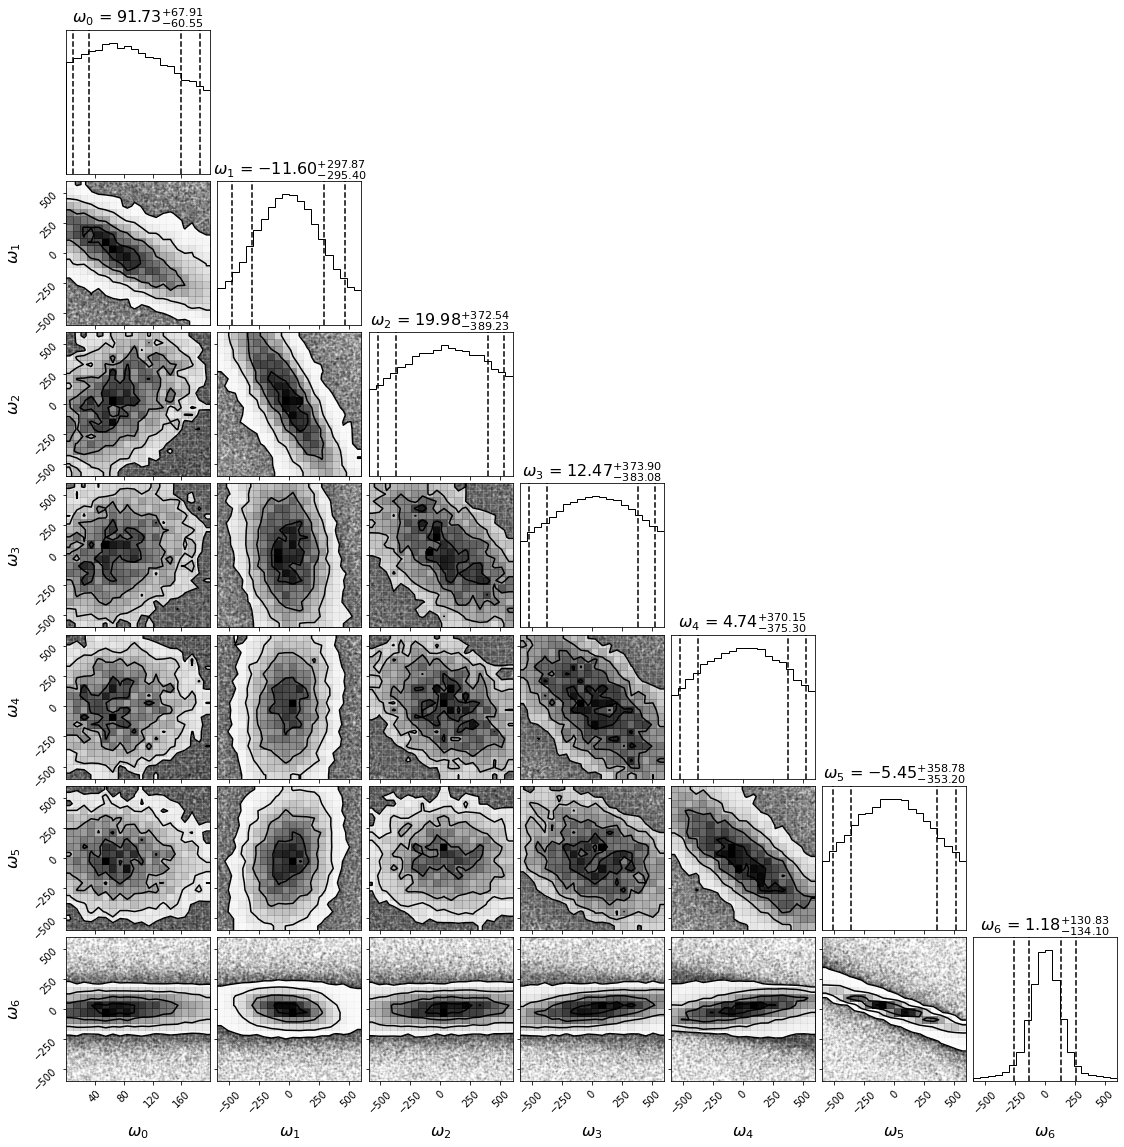

In [13]:
# Post process for ML model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 69.72282118,  40.22276554,  19.52274465, -65.32220161,  96.09164507, -46.39478089,   7.09652588]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True, labels = labels,
                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_Interacting, color='blue', truths=[52.78989736,  86.44790654, -14.73966626,  -9.08312241, -45.41211302,  41.83965968,  -8.68383622],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_Interacting['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_Ridge")

In [14]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 75.36834149,  1.39695876, 35.8138221,  26.24176585, -9.04444438, -0.87463066, -0.35087345]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
set_regularization(alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
th_samples_Interacting = np.load('ijml2202_7D_ML_Ridge_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()

x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_ML_ridge, th_samples_Interacting, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_ML_ridge, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

C:\Users\hwlee\physics_local\MachineLearning\y2022\ijml2202-GA approach for cosmological data fit(title changed)\codes\python\Bayesian_Dynesty_Restricted_LCDM_ga_20220518.py:1272: RuntimeWarning: invalid value encountered in sqrt
  v = H0*np.sqrt((1-OL0)*(1+z)**3 + OL0)


th_samples_new = (30551, 2)
th_samples_ignored = (76954, 2)
maxlogL = -54.38107182029481, maxIndex = [30550]
MaxL = [0.7899174053247346, 70.43208305050895]


vary_index = [1, 2]
Samples shape = (107505, 7)
th_maxL0 = [ 52.78989736  86.44790654 -14.73966626  -9.08312241 -45.41211302
  41.83965968  -8.68383622], maxLIndex = [107504], maxL = -54.38107182029481
Maximum Likelihood Parameters = [ 0.00000000e+00  5.27898974e+01  8.64479065e+01  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  6.19071868e+01  6.08293069e+01  4.13452832e+00
  1.10615689e+01 -5.87171266e+01  4.71102743e+01 -1.02791982e+01], maxl = -54.38107182029481
Error value for maxL parameters = 83.01207702050847


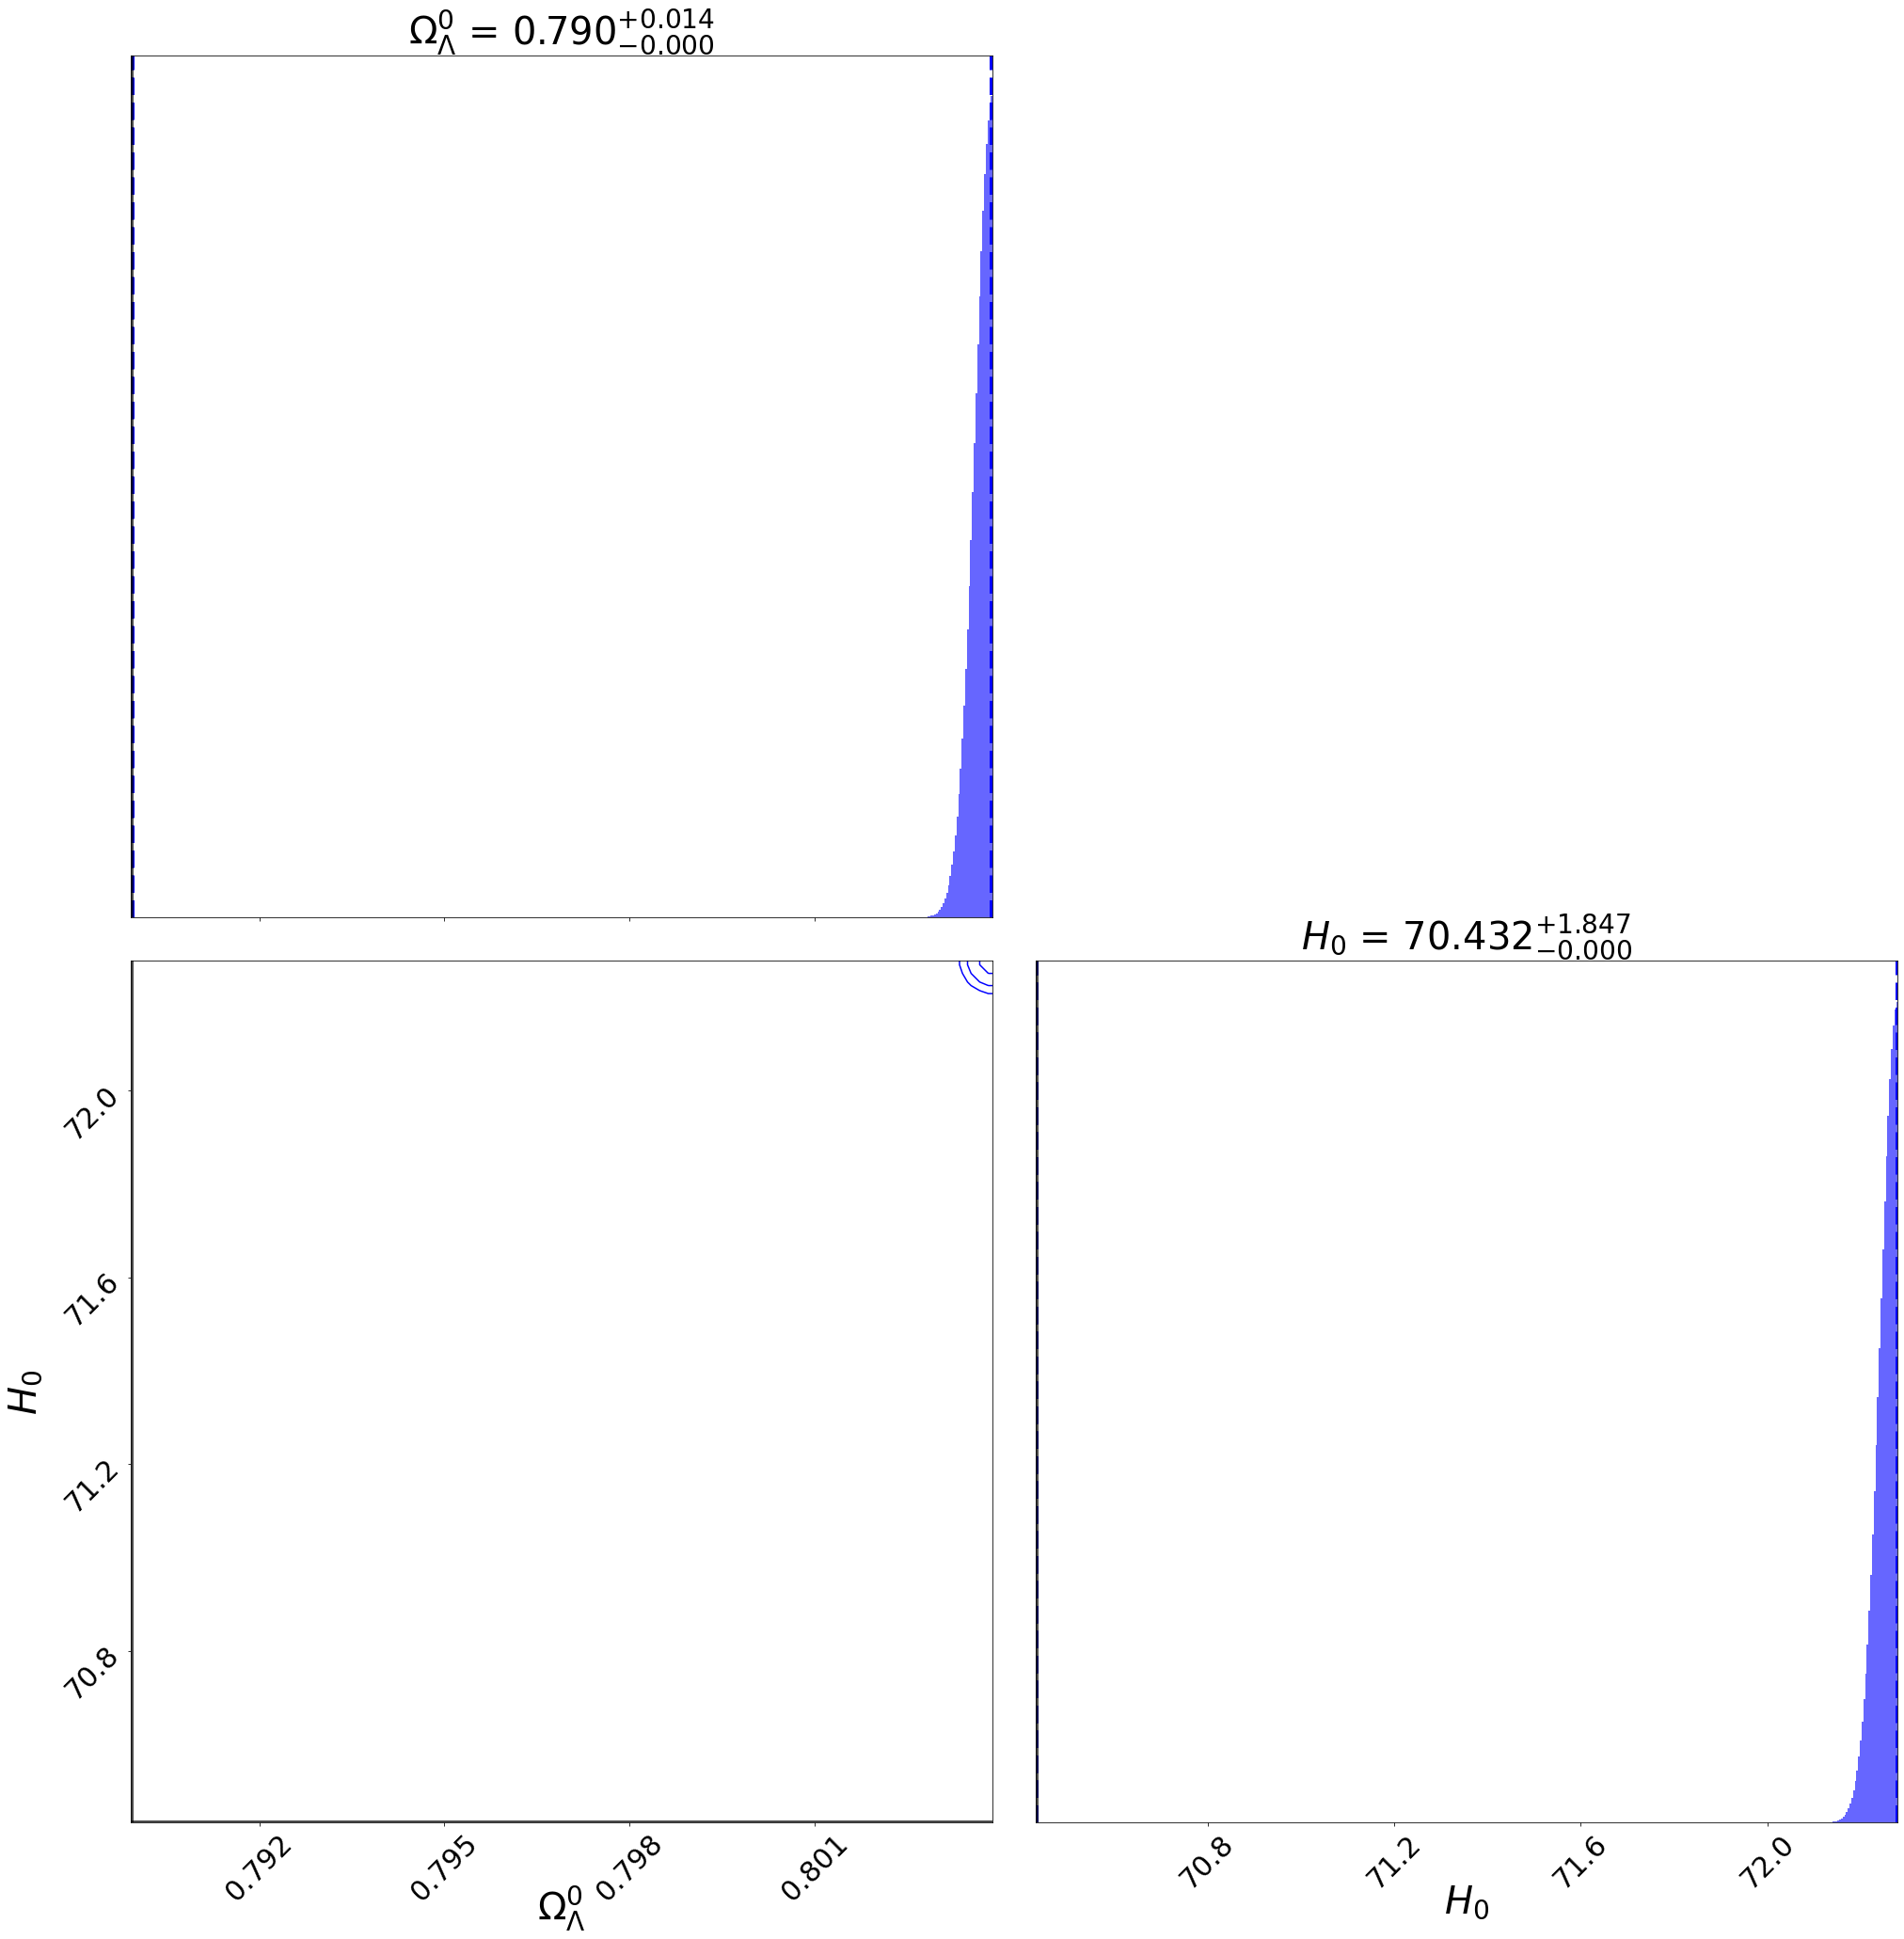

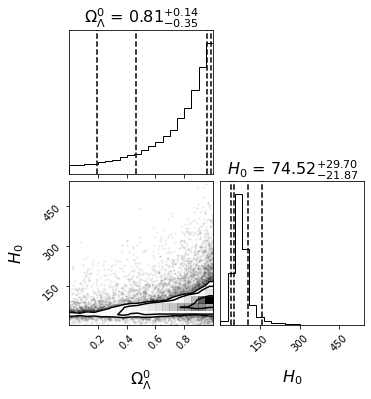

In [15]:
# Post process for ML model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 61.90718678,  60.82930686,   4.13452832,  11.0615689,  -58.71712658, 47.11027426, -10.27919816]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
set_regularization(alpha)
ndim = varying_param_numbers(variants)
print("vary_index = {0}".format(vary_index))
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
#fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                             trace_cmap='viridis', connect=True, labels = labels,
#                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_new, color='blue', truths=[0.7899174053247346, 70.43208305050895],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_new['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_Ridge")

Calculating for ML Lasso
-----------------------------------

In [17]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 89.28516007, -19.66132924,  47.80170411,   5.35932347,   0.36903947,   7.35491843,  -4.15906575]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)

ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
df = pd.DataFrame(th_samples_Interacting['samples'], columns=labels)
clevels = df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
df.describe(percentiles=[0.0228, 0.1587, 0.5, 0.8413, 0.9772])
#print("clevels = {0}".format(clevels))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_Lasso")
maxP_Interacting, maxPIndex_Interacting, th_bestP_Interacting = findMaxP_restricted_GA(th_samples_Interacting, "ML_Lasso", 100)
avgP_Interacting, avgPIndex_Interacting, th_bestAvgP_Interacting = findAvgP_restricted_GA(th_samples_Interacting, "ML_Lasso", 100)

Samples shape = (107505, 7)
th_maxL0 = [  97.49415242 -206.29157719  579.87374688 -518.57306205  251.06839157
  -78.14088643   12.46088149], maxLIndex = [107504], maxL = -20.481241660792783
Maximum Likelihood Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  9.74941524e+01 -2.06291577e+02  5.79873747e+02
 -5.18573062e+02  2.51068392e+02 -7.81408864e+01  1.24608815e+01], maxl = -20.481241660792783
Error value for maxL parameters = 28.328803801944325
Samples shape = (107505, 7)
Maximum Posterior Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  6.10025402e+01  4.19905016e+01  3.00031042e+01
  5.99255939e+00  5.39777747e+01  1.02013401e+02 -6.

vary_index = [13, 14, 15, 16, 17, 18, 19]
Samples shape = (107505, 7)
th_maxL0 = [  97.49415242 -206.29157719  579.87374688 -518.57306205  251.06839157
  -78.14088643   12.46088149], maxLIndex = [107504], maxL = -20.481241660792783
Maximum Likelihood Parameters = [ 0.00000000e+00  9.50000000e-01  1.00000000e+02  5.00000000e-02
  1.00000000e+00  1.00000000e+00  0.00000000e+00  7.31025000e+01
  1.91000000e+01  3.09900000e+01  4.88000000e+00  7.90000000e+01
  9.23000000e+01  9.74941524e+01 -2.06291577e+02  5.79873747e+02
 -5.18573062e+02  2.51068392e+02 -7.81408864e+01  1.24608815e+01], maxl = -20.481241660792783
Error value for maxL parameters = 28.328803801944325


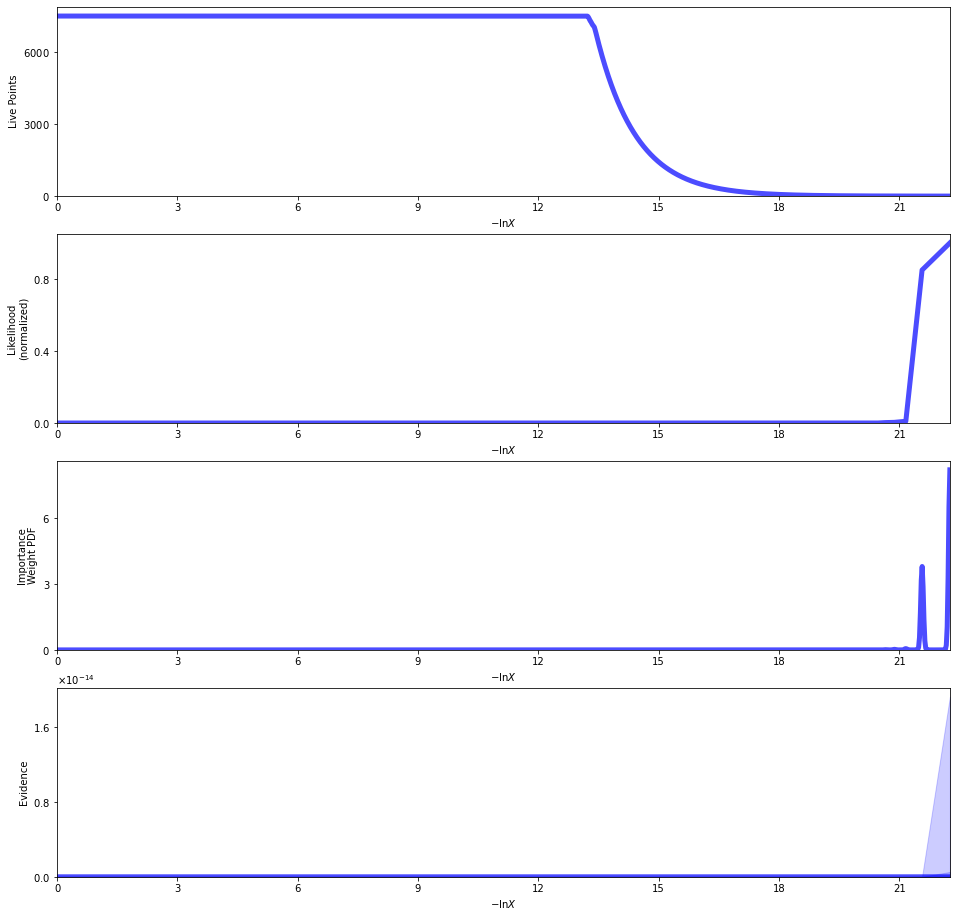

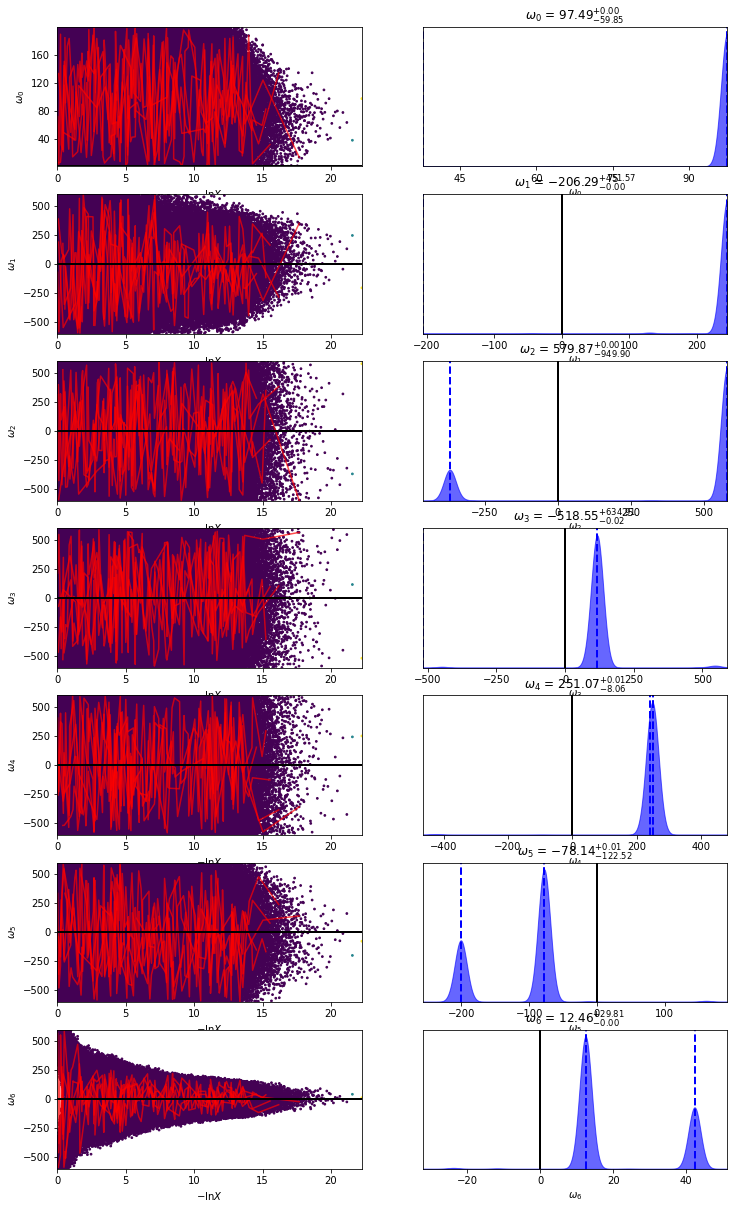

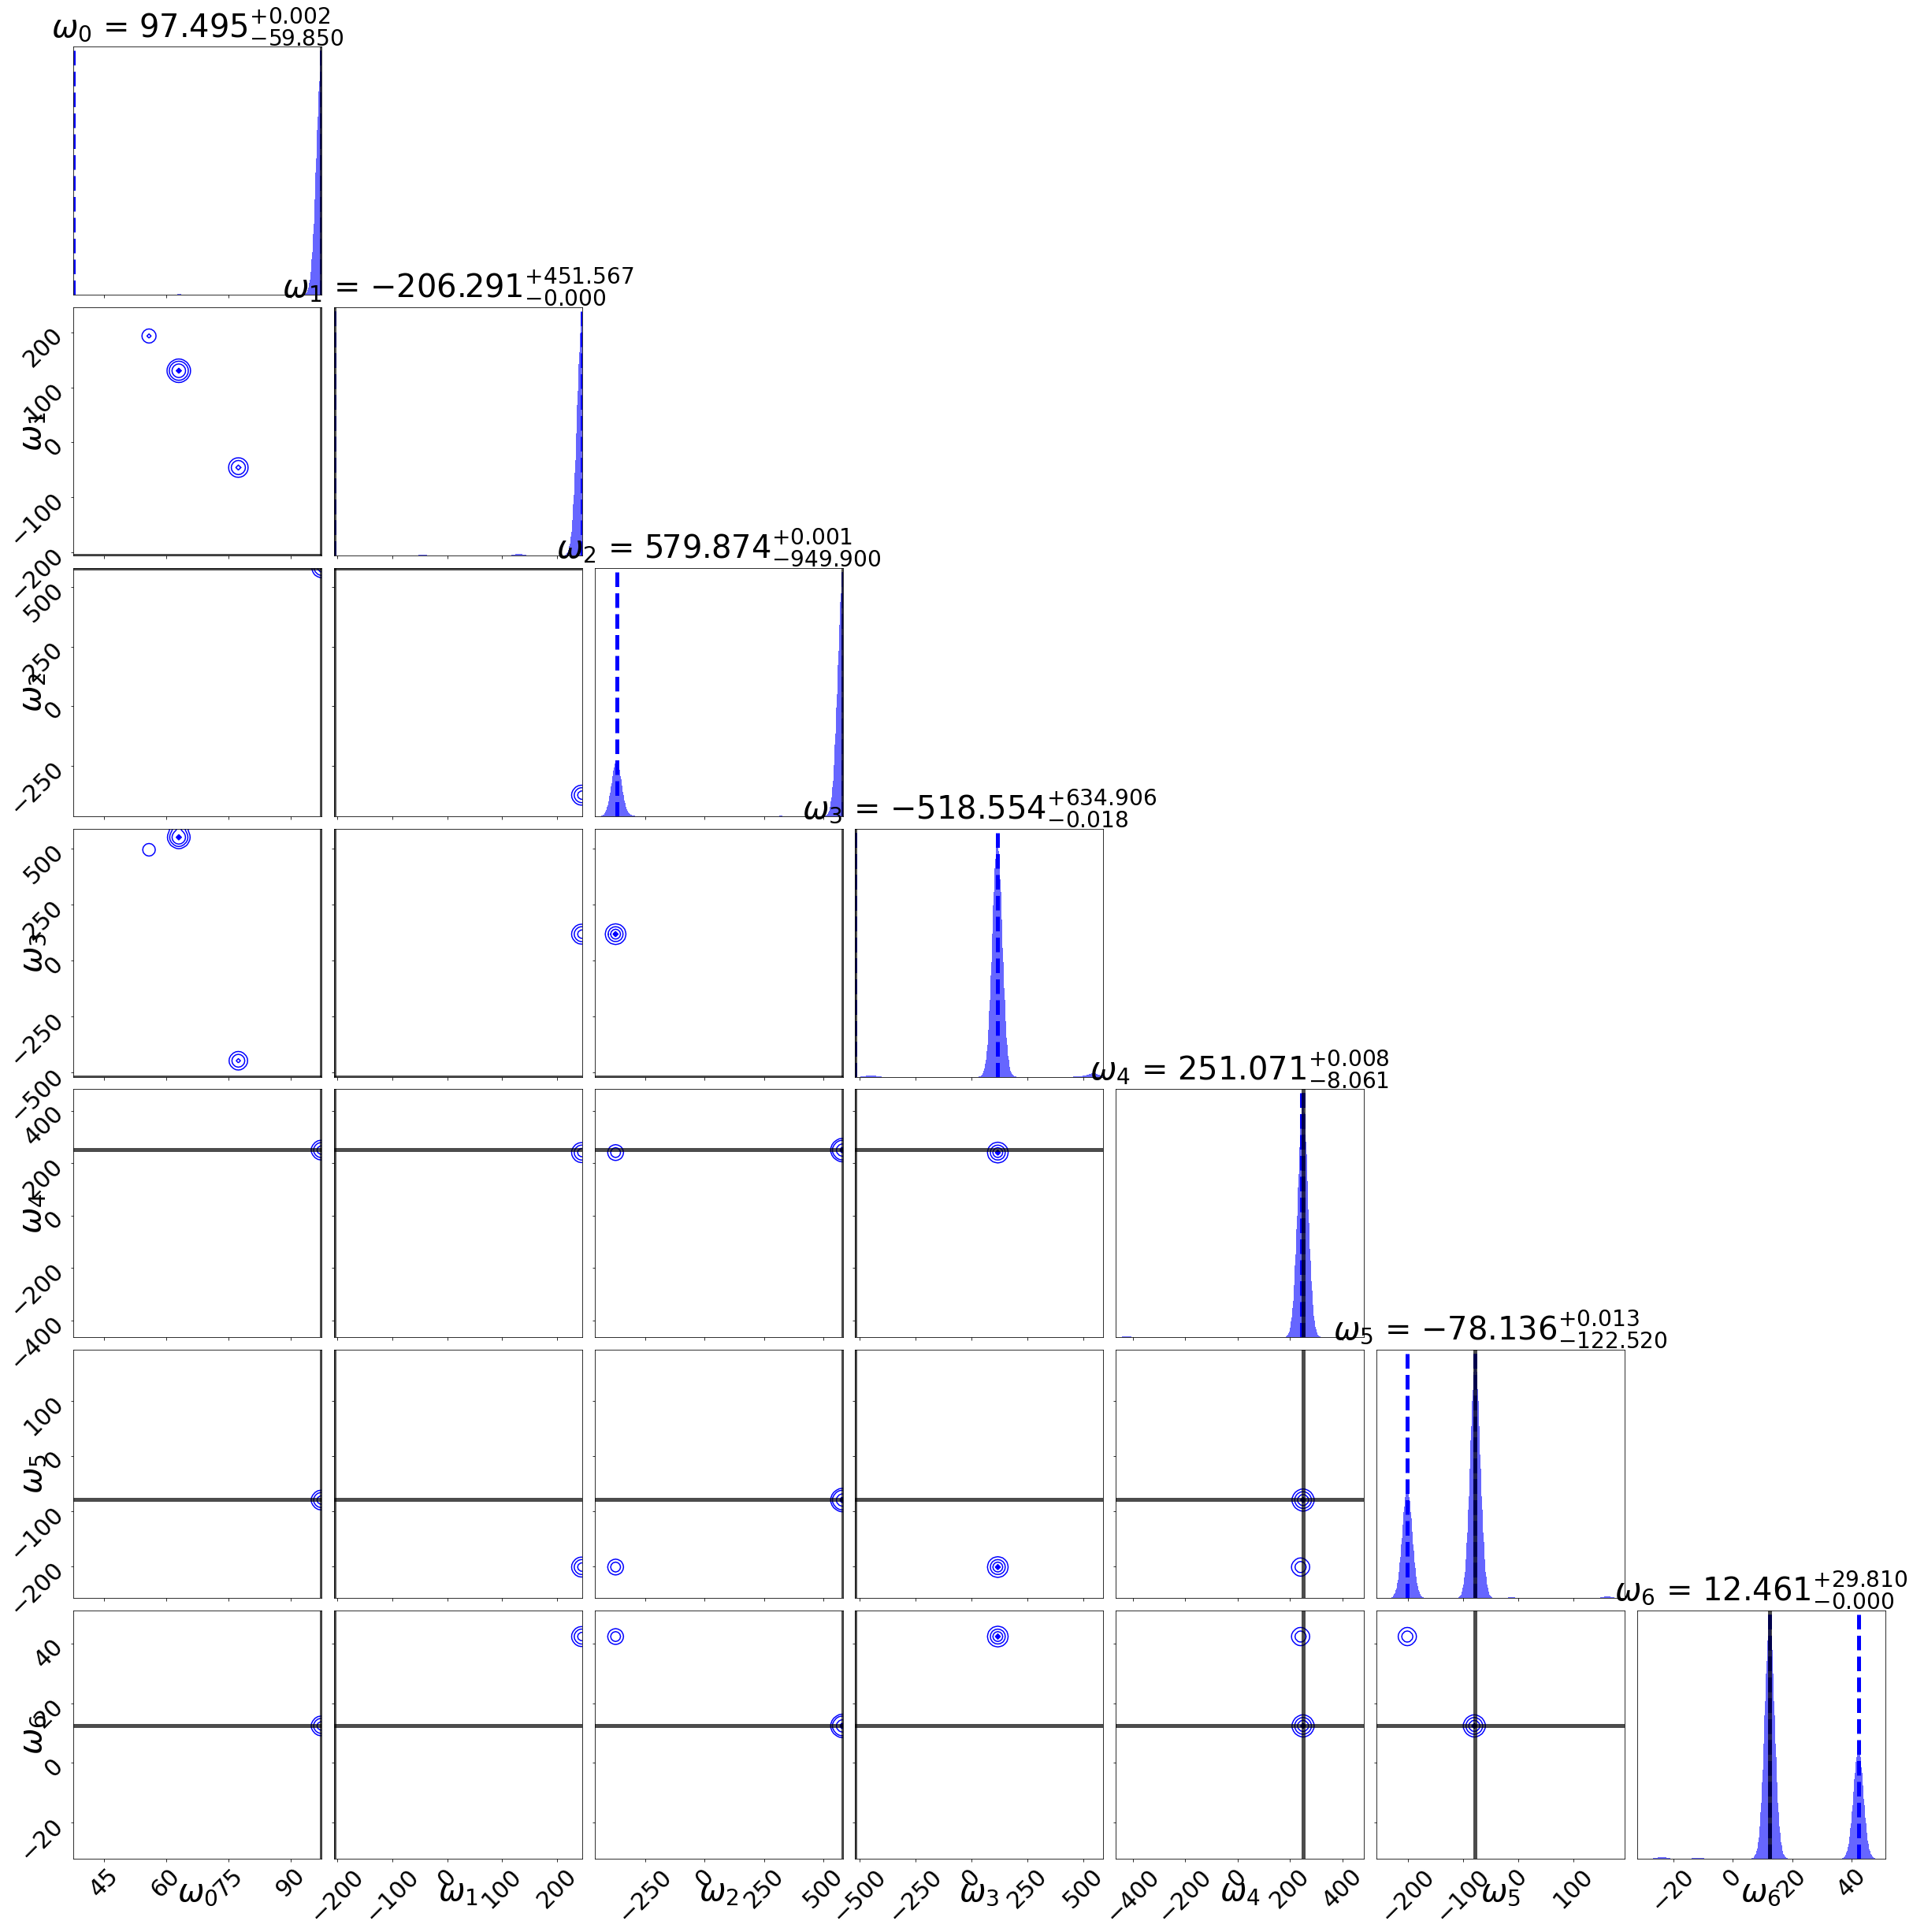

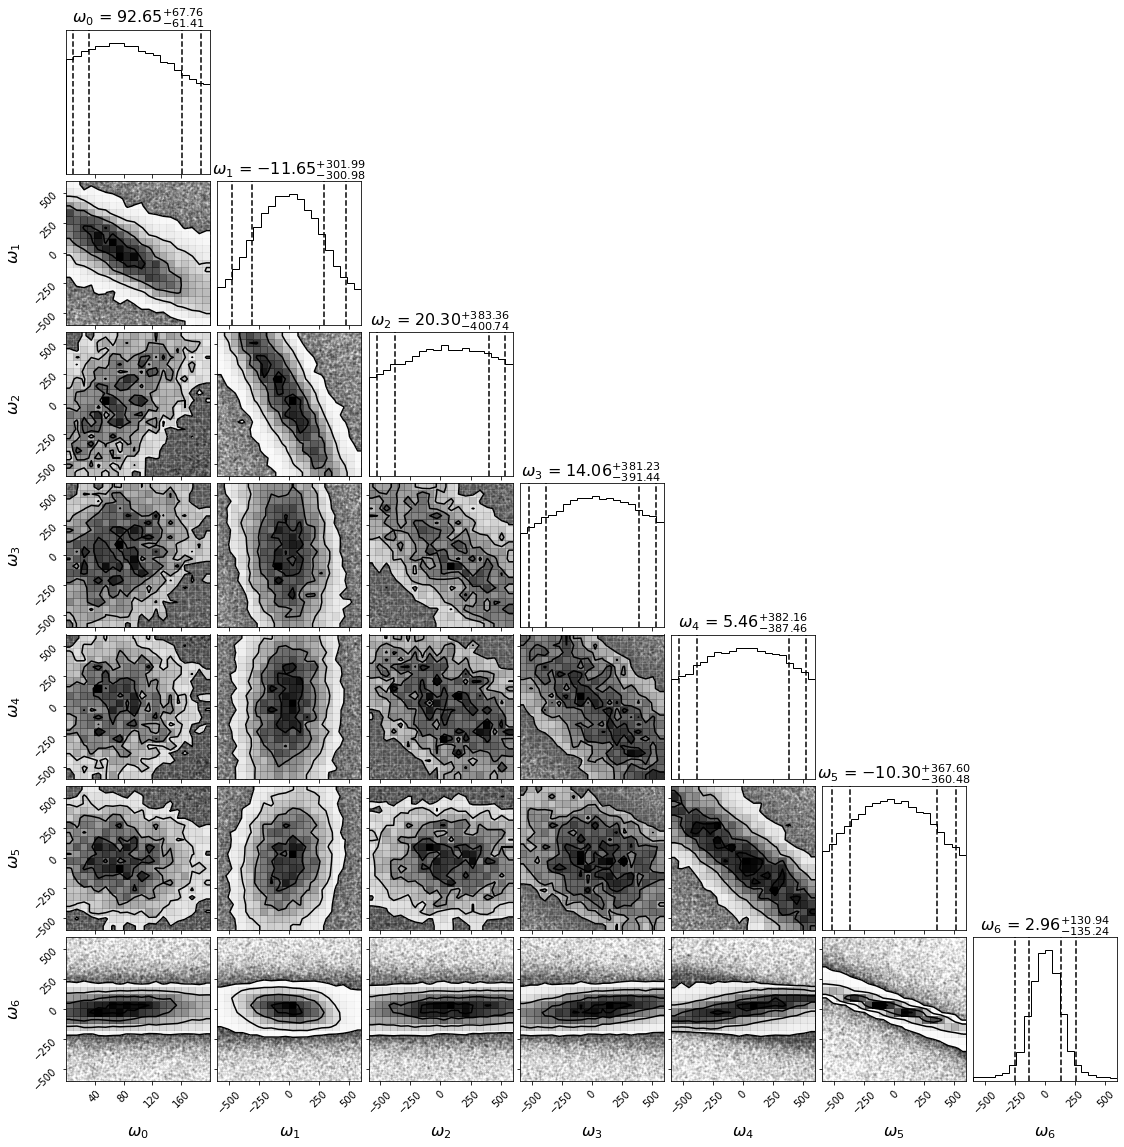

In [18]:
# Post process for ML model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 89.28516007, -19.66132924,  47.80170411,   5.35932347,   0.36903947,   7.35491843,  -4.15906575]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
print("vary_index = {0}".format(vary_index))
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True, labels = labels,
                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_Interacting, color='blue', truths=[97.49415242, -206.29157719,  579.87374688, -518.57306205,  251.06839157,  -78.14088643,   12.46088149],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_Interacting['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_Lasso")

In [2]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 89.28516007, -19.66132924,  47.80170411,   5.35932347,   0.36903947,   7.35491843,  -4.15906575]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
set_regularization(alpha)
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
th_samples_Interacting = np.load('ijml2202_7D_ML_Lasso_delz5.0_iter20000_USG_multi5.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijml2202_GA_Swampland_multi5_USG_run001.npy', allow_pickle='TRUE').item()

x0 = [70.0, 0.7]
th_samples_new, th_samples_ignored = find_H0_Omega_L0_scipy(H_ML_lasso, th_samples_Interacting, train_x, train_sigma, x0)
#th_samples_new, th_samples_ignored = find_H0_Omega_L0(H_ML_lasso, th_samples_Interacting, train_x)
print("th_samples_new = {0}".format(th_samples_new['samples'].shape))
print("th_samples_ignored = {0}".format(th_samples_ignored['samples'].shape))
maxlogL = np.max(th_samples_new['logl'])
maxIndex = np.where(th_samples_new['logl']==maxlogL)[0]
print("maxlogL = {0}, maxIndex = {1}".format(maxlogL, maxIndex))
print("MaxL = [{0}, {1}]".format(th_samples_new['samples'][maxIndex[0]][0],th_samples_new['samples'][maxIndex[0]][1]))

C:\Users\hwlee\physics_local\MachineLearning\y2022\ijml2202-GA approach for cosmological data fit(title changed)\codes\python\Bayesian_Dynesty_Restricted_LCDM_ga_20220518.py:1272: RuntimeWarning: invalid value encountered in sqrt
  v = H0*np.sqrt((1-OL0)*(1+z)**3 + OL0)


th_samples_new = (31284, 2)
th_samples_ignored = (76221, 2)
maxlogL = -20.481241660792783, maxIndex = [31283]
MaxL = [0.6054655092457764, 58.47751495869514]


vary_index = [1, 2]


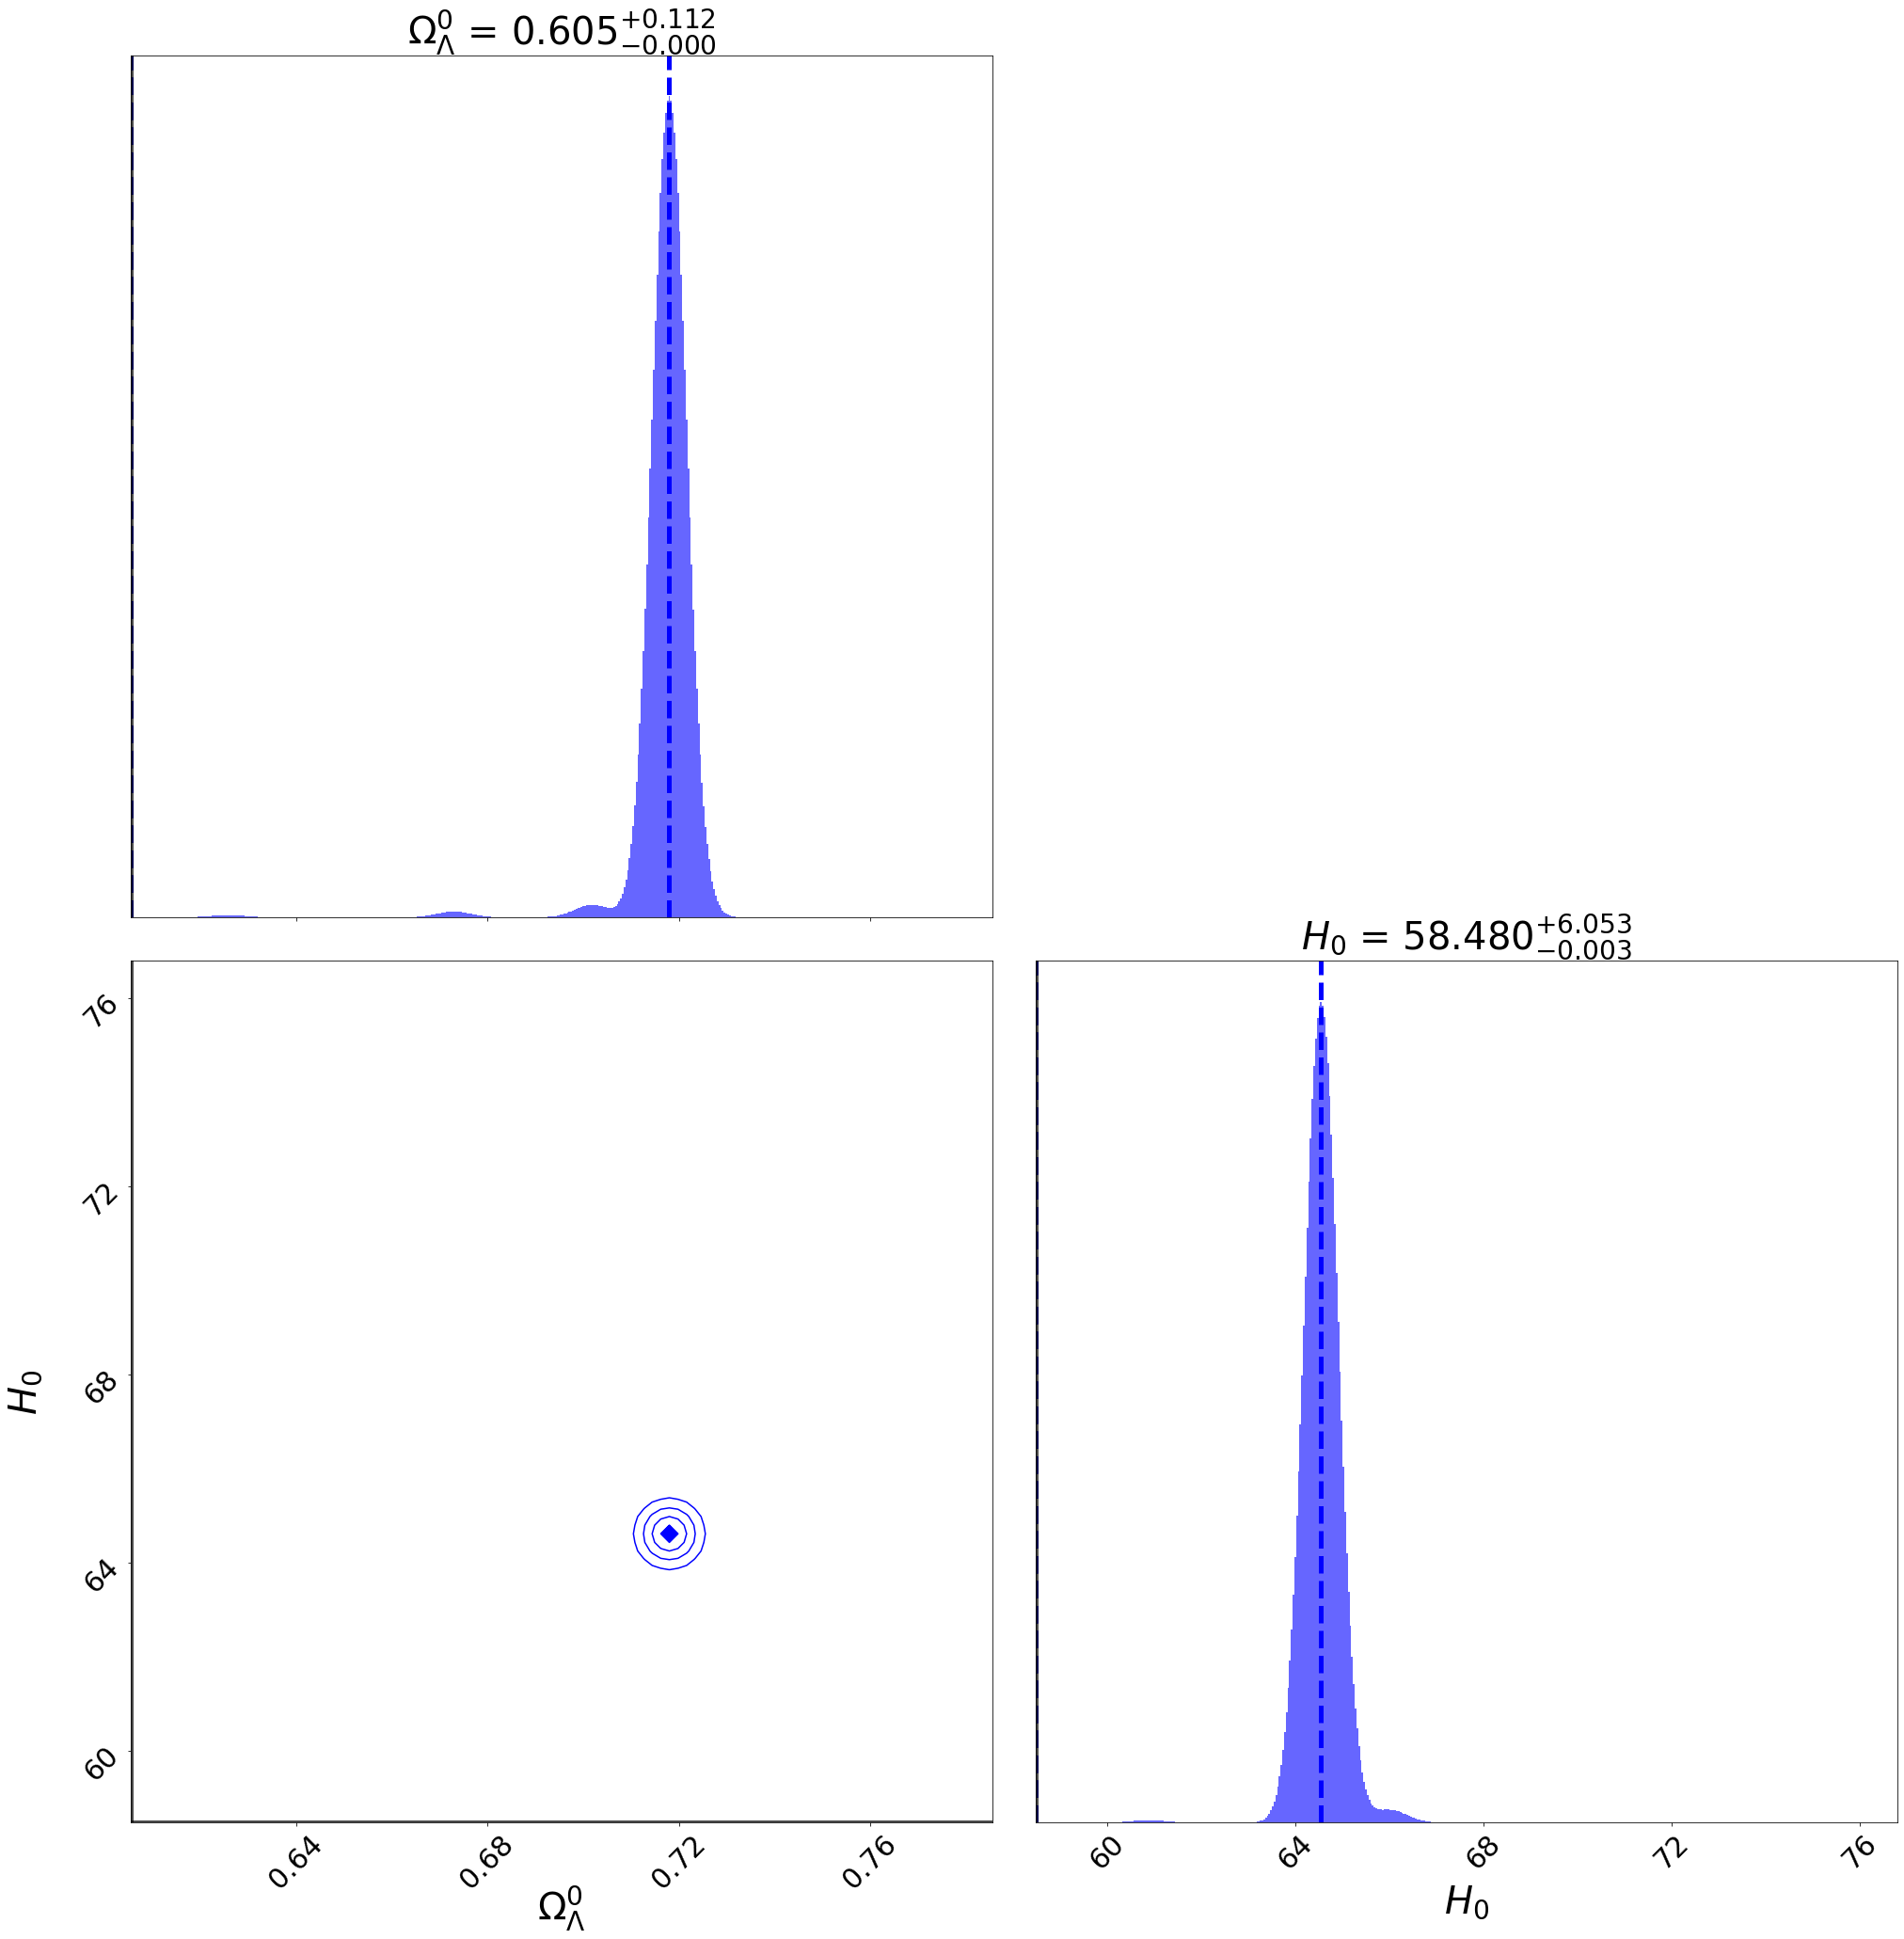

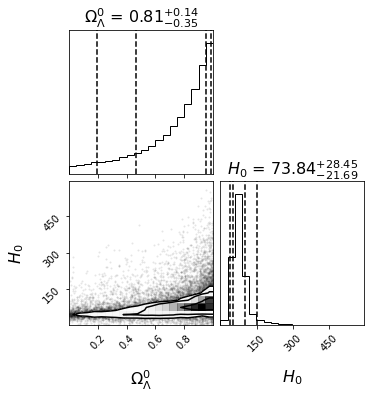

In [3]:
# Post process for ML model
from dynesty import plotting as dyplot
#from plotting import *
import corner
set_train_data(train_x, train_y, train_sigma)
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 89.28516007, -19.66132924,  47.80170411,   5.35932347,   0.36903947,   7.35491843,  -4.15906575]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.01
set_global_params(th_fixed, vary_index, variants, alpha)
set_regularization(alpha)
ndim = varying_param_numbers(variants)
print("vary_index = {0}".format(vary_index))
#np.save('ijc2102_dynesty_Interacting_multi5.npy', th_samples_Interacting)
#th_samples_Interacting = np.load('ijml2202_GA_Power_multi5_3D_test.npy', allow_pickle='TRUE').item()
#th_samples_Interacting = np.load('ijc2102_dynesty_Interacting_all.npy', allow_pickle='TRUE').item()
#print("th_samples = {0}".format(th_samples_Interacting))
ndim = varying_param_numbers(variants)
labels = []
for idx in range(ndim):
    labels.append(global_labels[vary_index[idx]])
ndim = varying_param_numbers(variants)
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
#fig, axes = runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                            trace_cmap='viridis', connect=True,
#                             connect_highlight=range(5))
#fig, axes = dyplot.runplot(th_samples_Interacting, lnz_truth=lnz_truth)  # summary (run) plot
#fig, axes = dyplot.traceplot(th_samples_Interacting, truths=np.zeros(ndim),
#                             truth_color='black', show_titles=True,
#                             trace_cmap='viridis', connect=True, labels = labels,
#                             connect_highlight=range(5))
# initialize figure
#labels0=[r"$\Omega_k^0$", r"$\Omega_\Lambda^0$", r"$H_0$", r"$b^2$", r"$c$", r"$n$"]
#ndim = varying_param_numbers(variants)
if ndim > 1: # no meaning for 1 parameter case
    fig, axes = plt.subplots(ndim, ndim, figsize=(35, 35))
    axes = axes.reshape((ndim, ndim))  # reshape axes
    labels = []
    for idx in range(ndim):
        labels.append(global_labels[vary_index[idx]])

    # add white space
    #[a.set_frame_on(False) for a in axes[:, 3]]
    #[a.set_xticks([]) for a in axes[:, 3]]
    #[a.set_yticks([]) for a in axes[:, 3]]

    # plot initial run (res1; left)
    #fg, ax = cornerplot(th_samples_Interacting, color='blue', truths=np.zeros(ndim),
    #                           truth_color='black', show_titles=True,
    #                           max_n_ticks=5, quantiles=[0.05, 0.16, 0.84, 0.95],
    #                           fig=(fig, axes[:, :ndim]))
    fg, ax = dyplot.cornerplot(th_samples_new, color='blue', truths=[0.6054655092457764, 58.47751495869514],
                               truth_color='black', truth_kwargs={'linewidth':5}, show_titles=True, labels = labels, title_fmt='.3f',
                               max_n_ticks=5, quantile_kwargs={'linewidth':5},
                               fig=(fig, axes[:, :ndim]))
    # draw labels and titles
    for idx in range(ndim):
        for idy in range(idx+1):
            if idx == idy : # if diagonal
                ax[idx,idy].set_title(ax[idx,idy].get_title(),fontsize=40)
                if idy == 0: # first column
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                elif idx == ndim-1: # last row
                    ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
            elif idy == 0: # first column
                if idx == ndim-1: # lower left corner
                    ax[idx,idy].tick_params(axis='both', which='major', labelsize=30)
                    ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                    ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
                else: # neither first nor last row
                    ax[idx,idy].tick_params(axis='y', which='major', labelsize=30)
                    ax[idx,idy].yaxis.set_label_coords(-0.1, 0.5)
                    ax[idx,idy].set_ylabel(ax[idx,idy].get_ylabel(),fontsize=40, loc='center')
            elif idx == ndim-1: # last row
                ax[idx,idy].tick_params(axis='x', which='major', labelsize=30)
                ax[idx,idy].xaxis.set_label_coords(0.5, -0.07)
                ax[idx,idy].set_xlabel(ax[idx,idy].get_xlabel(),fontsize=40, loc='center')
    ndim, nsamples = varying_param_numbers(variants), len(th_samples_Interacting['samples'])
    figure = corner.corner(th_samples_new['samples'], labels=labels, label_kwargs={"fontsize":16}, quantiles=[0.05, 0.16, 0.84, 0.95],
                           show_titles=True, title_kwargs={"fontsize": 16}, figsize=(35,35))
#maxL_Interacting, maxIndex_Interacting, th_best_Interacting = findMaxL_restricted_GA(th_samples_Interacting, "ML_Ridge")

Calculating AIC and BIC for models
--------------------------------------------------

In [2]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
beta = 0.001
set_global_params(th_fixed, vary_index, variants, beta)

chi2 = logLikeFunctions_restricted_GA['LCDM'](global_best_params['LCDM'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['LCDM'], global_best_params['LCDM'], global_param_numbers['LCDM'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['LCDM'], global_best_params['LCDM'], global_param_numbers['LCDM'], len(train_x))
print("LCDM chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['GA_Power'](global_best_params['GA_Power'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['GA_Power'], global_best_params['GA_Power'], global_param_numbers['GA_Power'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['GA_Power'], global_best_params['GA_Power'], global_param_numbers['GA_Power'], len(train_x))
print("GA Power chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['GA_Swampland'](global_best_params['GA_Swampland'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['GA_Swampland'], global_best_params['GA_Swampland'], global_param_numbers['GA_Swampland'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['GA_Swampland'], global_best_params['GA_Swampland'], global_param_numbers['GA_Swampland'], len(train_x))
print("GA Swampland chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['ML_LCDM'](global_best_params['ML_LCDM'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['ML_LCDM'], global_best_params['ML_LCDM'], global_param_numbers['ML_LCDM'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['ML_LCDM'], global_best_params['ML_LCDM'], global_param_numbers['ML_LCDM'], len(train_x))
print("ML LCDM chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['ML_LeastSquare'](global_best_params['ML_LeastSquare'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['ML_LeastSquare'], global_best_params['ML_LeastSquare'], global_param_numbers['ML_LeastSquare'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['ML_LeastSquare'], global_best_params['ML_LeastSquare'], global_param_numbers['ML_LeastSquare'], len(train_x))
print("ML Least Square chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['ML_None'](global_best_params['ML_None'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['ML_None'], global_best_params['ML_None'], global_param_numbers['ML_None'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['ML_None'], global_best_params['ML_None'], global_param_numbers['ML_None'], len(train_x))
print("ML None chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['ML_Ridge'](global_best_params['ML_Ridge'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['ML_Ridge'], global_best_params['ML_Ridge'], global_param_numbers['ML_Ridge'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['ML_Ridge'], global_best_params['ML_Ridge'], global_param_numbers['ML_Ridge'], len(train_x))
print("ML Ridge chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))

th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['ML_Lasso'](global_best_params['ML_Lasso'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['ML_Lasso'], global_best_params['ML_Lasso'], global_param_numbers['ML_Lasso'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['ML_Lasso'], global_best_params['ML_Lasso'], global_param_numbers['ML_Lasso'], len(train_x))
print("ML Lasso chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))


LCDM chi2 = -10.923199855091735, AIC = 25.84639971018347, BIC = 29.45972468972411
GA Power chi2 = -9.883682873125402, AIC = 27.767365746250803, BIC = 34.99401570533208
GA Swampland chi2 = -10.37106914797183, AIC = 24.74213829594366, BIC = 28.3554632754843
ML LCDM chi2 = -13.253412054003014, AIC = 30.50682410800603, BIC = 34.120149087546665
ML Least Square chi2 = -9.188856413963194, AIC = 32.37771282792639, BIC = 45.02435025631863
ML None chi2 = -9.929016516782037, AIC = 33.85803303356407, BIC = 46.50467046195631
ML Ridge chi2 = -14.178261445616242, AIC = 42.35652289123249, BIC = 55.003160319624726
ML Lasso chi2 = -10.034652538631956, AIC = 34.06930507726391, BIC = 46.71594250565615


In [6]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3]
variants = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vary_index = get_varying_index(variants)
beta = 0.001
set_global_params(th_fixed, vary_index, variants, beta)

chi2 = logLikeFunctions_restricted_GA['LCDM'](np.array([0.56738978, 63.46318396]))
aic = calculateAIC_single(logLikeFunctions_restricted_GA['LCDM'], np.array([0.56738978, 63.46318396]), global_param_numbers['LCDM'])
bic = calculateBIC_single(logLikeFunctions_restricted_GA['LCDM'], np.array([0.56738978, 63.46318396]), global_param_numbers['LCDM'], len(train_x))
print("LCDM_series chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))


chi2 = -37.51039399086723, LCDM AIC = 79.02078798173446, BIC = 82.6341129612751


In [7]:
x0 = [0.56738978, 63.46318396]
for idx in range(8):
    print("w[{0}] = {1}".format(idx, LCDM_coefficients[idx](x0[1], x0[0])))

w[0] = 63.46318396
w[1] = 41.18223296225411
w[2] = 27.820341815835107
w[3] = -4.325635302717404
w[4] = -3.290827462428077
w[5] = 4.0316961728520555
w[6] = -1.3210472799573765
w[7] = -1.134427927237142


In [3]:
th_fixed = [0.0, 0.95, 100.0, 0.05, 1, 1, 0, 8.55**2, 19.1, 30.99, 4.88, 79.0, 92.3, 0, 0, 0, 0, 0, 0, 0]
variants = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
vary_index = get_varying_index(variants)
alpha = 0.001
set_global_params(th_fixed, vary_index, variants, alpha)

chi2 = logLikeFunctions_restricted_GA['ML_LCDM'](global_best_params['ML_LCDM'])
aic = calculateAIC_single(logLikeFunctions_restricted_GA['ML_LCDM'], global_best_params['ML_LCDM'], 2)
bic = calculateBIC_single(logLikeFunctions_restricted_GA['ML_LCDM'], global_best_params['ML_LCDM'], 2, len(train_x))
print("ML LCDM chi2 = {0}, AIC = {1}, BIC = {2}".format(chi2, aic, bic))


ML LCDM chi2 = -13.253412054003014, AIC = 30.50682410800603, BIC = 34.120149087546665
